In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install split-folders[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import splitfolders
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

from matplotlib.image import imread
import matplotlib.cm as cm
from IPython.display import Image, display

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=8411bcc68d9dc206cd8b179a53c9bbf9c850beeb52cb50287550755d5cda414c
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import os
import lime
import lime.lime_image

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/model.h5')

# Check its architecture
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# Split dataset into class folders
import os
import shutil

# define the input directory containing the mixed images
input_dir = "/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/known_images"

# define the output directories for normal and sick images
normal_dir = "/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/Dataset/Normal"
sick_dir = "/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/Dataset/Infected"

# create the output directories if they don't already exist
os.makedirs(normal_dir, exist_ok=True)
os.makedirs(sick_dir, exist_ok=True)

# loop through all files in the input directory
for filename in os.listdir(input_dir):
    # check if the filename contains "normal"
    if "normal" in filename:
        # copy the file to the normal output directory
        shutil.copy(os.path.join(input_dir, filename), normal_dir)
    # check if the filename contains "sick"
    elif "sick" in filename:
        # copy the file to the sick output directory
        shutil.copy(os.path.join(input_dir, filename), sick_dir)
    else:
        # ignore files that don't contain "normal" or "sick"
        pass

In [ ]:
# Splitting dataset into train, val and test set
splitfolders.ratio("/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/Dataset",output='data',seed=77,ratio=(0.7,0.15,0.15))

Copying files: 715 files [00:02, 245.47 files/s]


In [ ]:
val_data_dir = 'data/val'
test_data_dir = 'data/test'

In [ ]:
target_size = (224,224)
input_shape = (224,224,3)
learning_rate = 0.0001
epochs = 50
batch_size = 32
dropout = 0.5

In [ ]:
# Creating image generator for test set
test_image_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
# Validation set
val_generator =  test_image_gen.flow_from_directory(val_data_dir,
                                              target_size=target_size,
                                              batch_size=batch_size,
                                              class_mode='binary',
                                              shuffle=True)

Found 106 images belonging to 2 classes.


In [ ]:
# Test set
test_generator = test_image_gen.flow_from_directory(test_data_dir,
                                               target_size=target_size,
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False)

Found 110 images belonging to 2 classes.


In [ ]:
# Evaluate the restored model
loss, acc = new_model.evaluate(val_generator, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(new_model.predict(val_generator).shape)

4/4 - 20s - loss: 0.1458 - accuracy: 0.9717 - 20s/epoch - 5s/step
Restored model, accuracy: 97.17%
4/4 [==============================] - 21s 4s/step
(106, 1)


**Dataset1 Unknow Images**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

In [ ]:
folder_path = 'unknown_images/unknown_images'
IMAGE_SIZE =(150, 150)

def load_data():
  directory ='/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images'
  output = []
  images = []

  for file in tqdm(os.listdir(directory), desc='lOADING UNKNOWN_IMAGES: '):
    img_path = os.path.join(directory, file)
    image =cv2.imread(img_path,0)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMAGE_SIZE)
    image = np.array(image)
    images.append(image)

  return images

In [ ]:
def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    array = preprocess_input(array)
    array = np.expand_dims(array, axis=0)
    return array

In [ ]:
validAug = ImageDataGenerator(preprocessing_function=preprocess_input) 

In [ ]:
unknown = load_data()

lOADING UNKNOWN_IMAGES: 100%|██████████| 50/50 [00:11<00:00,  4.31it/s]


In [ ]:
unknown_images = np.array(unknown)
unknown_images =validAug.flow(x =unknown_images , y = None, batch_size=32, shuffle = False )

In [ ]:
unknown_predictions = new_model.predict(unknown_images)
# Since we are using a sigmoid activation fxn for the output layer, we define the threshold to 0.5 when defining the binary classes
unknown_labels = unknown_predictions > 0.5
unknown_labels

2/2 [==============================] - 5s 1s/step


array([[ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True]])

In [ ]:
# convert True to 1 and False to 0
unknown_labels = unknown_labels.astype(int)
unknown_labels 

array([[1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1]])

In [ ]:
import numpy as np

In [ ]:
np.savetxt("/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_labels.csv", unknown_labels, delimiter=',')

**Dataset2 Images**

In [ ]:
IMAGE_SIZE =(150, 150)

def load_data():
  directory ='/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images'
  images = []
  output = []
  image_name = []

  for file in tqdm(os.listdir(directory), desc='LOADING DATASET2 IMAGES: '):
    img_path = os.path.join(directory, file)
    image_name.append(img_path.split("/")[-1])
    image = cv2.imread(img_path,0)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMAGE_SIZE)
    image = np.array(image)
    images.append(image)
  return images, image_name
     

In [ ]:
dataset2, dataset2_names = load_data()

LOADING DATASET2 IMAGES: 100%|██████████| 224/224 [00:03<00:00, 72.48it/s] 


In [ ]:
dataset2_images = np.array(dataset2)
dataset2_images.shape

(224, 150, 150, 3)

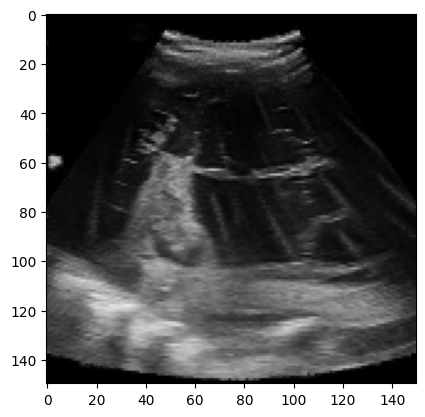

In [ ]:
plt.imshow(dataset2_images[4])

In [ ]:
dataset2_labels = pd.read_csv('/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/image_classes.csv')

In [ ]:
dataset2_labels.columns = ['patient', 'True_Diagnosis']

In [ ]:
dataset2_labels.sort_values(by=['patient'], inplace=True)
dataset2_labels.reset_index(drop=True, inplace=True)
dataset2_labels

patient  True_Diagnosis
0      sick_eff0               0
1      sick_eff1               0
2     sick_eff10               0
3    sick_eff100               0
4    sick_eff101               0
..           ...             ...
219   sick_eif95               1
220   sick_eif96               1
221   sick_eif97               1
222   sick_eif98               1
223   sick_eif99               1

[224 rows x 2 columns]

In [ ]:
dataset2_images =validAug.flow(
    x =dataset2_images , 
    y = None,
    batch_size=32,
    shuffle = False
        )
     

In [ ]:
dataset2_predictions = new_model.predict(dataset2_images)
dataset2_predicted_labels = dataset2_predictions > 0.5


7/7 [==============================] - 19s 3s/step


In [ ]:
dataset2_predicted_labels

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [

In [ ]:
# convert True to 1 and False to 0
dataset2_predicted_labels = dataset2_predicted_labels.astype(int)
dataset2_predicted_labels 

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
# Convert the array to a 1D array of 1s and 0s
dataset2_predicted_labels  = np.squeeze(dataset2_predicted_labels.astype(int))
dataset2_predicted_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [ ]:
dataset2_names

['sick_eff94.png',
 'sick_eff11.png',
 'sick_eff92.png',
 'sick_eif0.png',
 'sick_eff85.png',
 'sick_eif6.png',
 'sick_eif91.png',
 'sick_eif85.png',
 'sick_eif12.png',
 'sick_eif44.png',
 'sick_eif36.png',
 'sick_eff111.png',
 'sick_eif105.png',
 'sick_eff88.png',
 'sick_eif10.png',
 'sick_eif98.png',
 'sick_eif43.png',
 'sick_eff100.png',
 'sick_eff51.png',
 'sick_eif4.png',
 'sick_eif104.png',
 'sick_eif87.png',
 'sick_eif99.png',
 'sick_eif2.png',
 'sick_eif102.png',
 'sick_eif68.png',
 'sick_eif7.png',
 'sick_eff69.png',
 'sick_eff62.png',
 'sick_eff13.png',
 'sick_eff90.png',
 'sick_eff96.png',
 'sick_eif93.png',
 'sick_eff53.png',
 'sick_eff59.png',
 'sick_eif101.png',
 'sick_eif27.png',
 'sick_eff21.png',
 'sick_eif64.png',
 'sick_eif76.png',
 'sick_eif77.png',
 'sick_eif40.png',
 'sick_eff45.png',
 'sick_eif15.png',
 'sick_eif100.png',
 'sick_eif53.png',
 'sick_eff18.png',
 'sick_eif110.png',
 'sick_eif75.png',
 'sick_eff80.png',
 'sick_eff23.png',
 'sick_eff38.png',
 'sick_ef

In [ ]:
dataset2_csv = pd.DataFrame({'patient':dataset2_names, 'Predicted_Diagnosis':dataset2_predicted_labels})
dataset2_csv

patient  Predicted_Diagnosis
0     sick_eff94.png                    0
1     sick_eff11.png                    0
2     sick_eff92.png                    0
3      sick_eif0.png                    0
4     sick_eff85.png                    0
..               ...                  ...
219   sick_eff76.png                    0
220   sick_eif20.png                    0
221   sick_eff42.png                    0
222  sick_eff106.png                    0
223    sick_eff8.png                    0

[224 rows x 2 columns]

In [ ]:
dataset2_labels['Predicted_Diagnosis'] = dataset2_csv.Predicted_Diagnosis
dataset2_labels

patient  True_Diagnosis  Predicted_Diagnosis
0      sick_eff0               0                    0
1      sick_eff1               0                    0
2     sick_eff10               0                    0
3    sick_eff100               0                    0
4    sick_eff101               0                    0
..           ...             ...                  ...
219   sick_eif95               1                    0
220   sick_eif96               1                    0
221   sick_eif97               1                    0
222   sick_eif98               1                    0
223   sick_eif99               1                    0

[224 rows x 3 columns]

In [ ]:
dataset2_labels.to_csv('/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/my_images_classes_and_labels.csv')

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score

In [ ]:
print(classification_report(dataset2_labels['True_Diagnosis'], dataset2_labels['Predicted_Diagnosis']))

              precision    recall  f1-score   support

           0       0.52      0.97      0.67       112
           1       0.77      0.09      0.16       112

    accuracy                           0.53       224
   macro avg       0.64      0.53      0.42       224
weighted avg       0.64      0.53      0.42       224



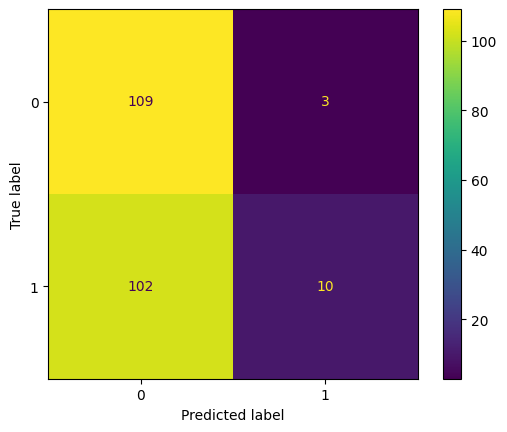

In [ ]:
cm = confusion_matrix(dataset2_labels['True_Diagnosis'], dataset2_labels['Predicted_Diagnosis'])
cm_plot_labels = ['sick','normal']
ConfusionMatrixDisplay(cm).plot()

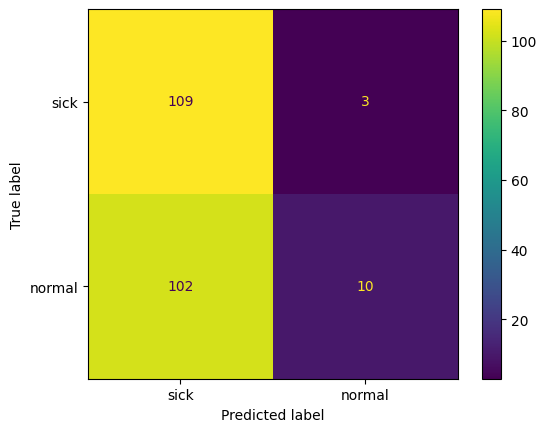

In [ ]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cm_plot_labels)
disp.plot()

In [ ]:
dataset2_labels

patient  True_Diagnosis  Predicted_Diagnosis
0      sick_eff0               0                    0
1      sick_eff1               0                    0
2     sick_eff10               0                    0
3    sick_eff100               0                    0
4    sick_eff101               0                    0
..           ...             ...                  ...
219   sick_eif95               1                    0
220   sick_eif96               1                    0
221   sick_eif97               1                    0
222   sick_eif98               1                    0
223   sick_eif99               1                    0

[224 rows x 3 columns]

In [ ]:
# Set the directory where the images are stored
img_dir = '/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images'

In [ ]:
cr = classification_report(dataset2_labels['True_Diagnosis'], dataset2_labels['Predicted_Diagnosis'], output_dict=True)
dataset2_report = pd.DataFrame(cr).T

In [ ]:
dataset2_report.to_csv('/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/dataset2_predictions.csv')
     

In [ ]:
np.savetxt("/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/image_labes.csv", dataset2_predicted_labels, delimiter=',')

**Explainability Using GradCAM**

In [ ]:
new_path = "/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images"

In [ ]:
img_path = new_path + '/35.png'
input = get_img_array(img_path, (224,224))

In [ ]:
input

array([[[[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ]],

        [[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ]],

        [[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ]],

        ...,

        [[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-103.939, -116.779, -123.68 ],
         [-103.939, -1

In [ ]:
# Predictions on test set
pred = new_model.predict(input)
predictions = pred > 0.5

1/1 [==============================] - 0s 247ms/step


In [ ]:
predictions

array([[ True]])

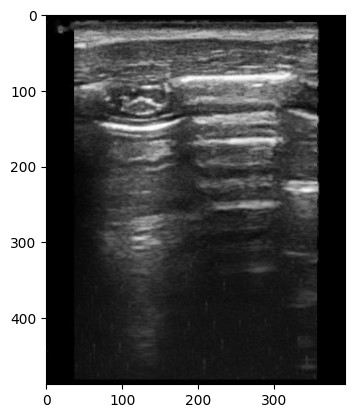

In [ ]:
im = plt.imread(img_path)
plt.imshow(im,cmap='gray')

In [ ]:
# Model Explainability
def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    array = preprocess_input(array)
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, pred_index=None):

      grad_model = tf.keras.models.Model(
                                  [model.get_layer('input_1').input], 
                                  [model.get_layer("conv5_block3_out").output,
                                  model.output]
                                        )
      print(grad_model.outputs)
      with tf.GradientTape() as tape:
          last_conv_layer_output, preds = grad_model(img_array)
          print("preds:",preds[0])
          if pred_index is None:
              pred_index = tf.argmax(preds[0])
          print("pred_index:",pred_index)
          class_channel = preds[:, pred_index]
          print("class_channel:",class_channel)


      grads = tape.gradient(class_channel, last_conv_layer_output)


      pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

      last_conv_layer_output = last_conv_layer_output[0]
      heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
      heatmap = tf.squeeze(heatmap)

    #For visualization purpose,we will also normalize the heatmap between 0 & 1
      heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
      return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=5):
    # Load the original image
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Save the heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap * alpha)
    jet_heatmap.save('heatmap.jpg')

    # Display Grad CAM
    display(Image(cam_path))


[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9880391], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9880391], shape=(1,), dtype=float32)


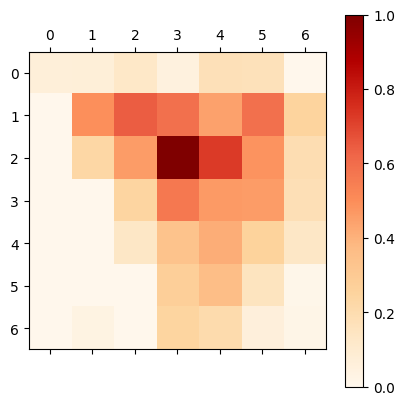

In [ ]:
# Generate class activation heatmap
heatmap = make_gradcam_heatmap(input, new_model)

# Display heatmap
plt.matshow(heatmap,cmap='OrRd')
plt.colorbar()
plt.show()

**Unknow Images**

In [ ]:
folder_path = "/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images"
image_size = (224, 224)

In [ ]:
# Collect input images
input_images = []
predictions = []

In [ ]:
for filename in os.listdir(folder_path):
    if filename.endswith(".png"):
        img_path = os.path.join(folder_path, filename)
        input = get_img_array(img_path, image_size)
        input_images.append((img_path, input))

        # Predictions on the current image
        pred = new_model.predict(input)
        prediction = pred > 0.5
        predictions.append(prediction)

1/1 [==============================] - 0s 197ms/step


[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9986075], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9986075], shape=(1,), dtype=float32)


<ipython-input-63-b2c35ca37b83>:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


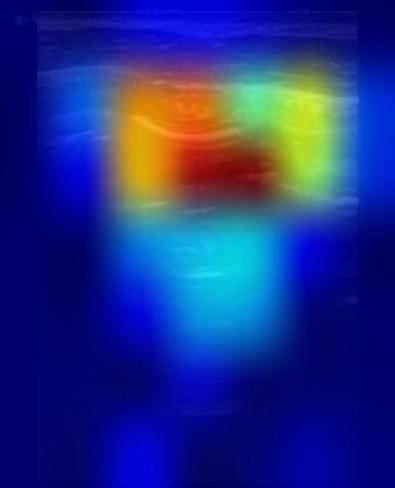

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/1.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.99906206], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.99906206], shape=(1,), dtype=float32)


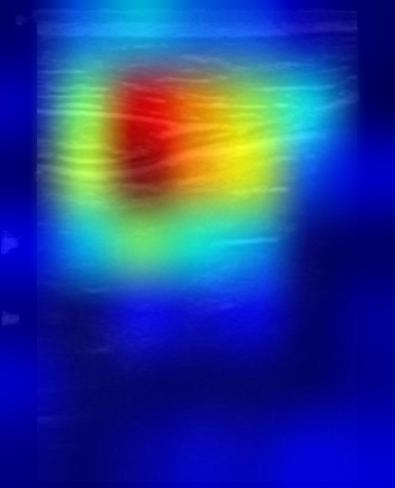

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/49.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.99999315], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.99999315], shape=(1,), dtype=float32)


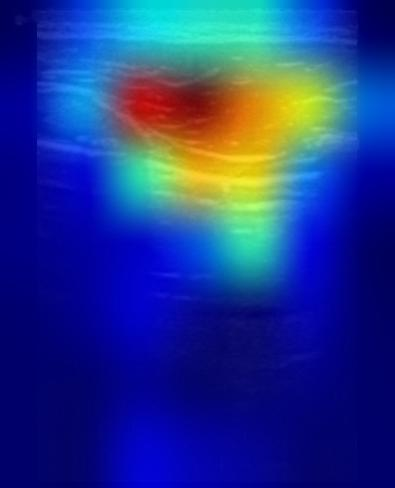

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/11.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.98081785], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.98081785], shape=(1,), dtype=float32)


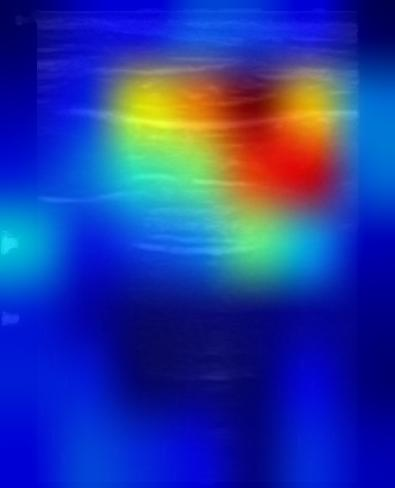

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/9.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([9.749439e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([9.749439e-06], shape=(1,), dtype=float32)


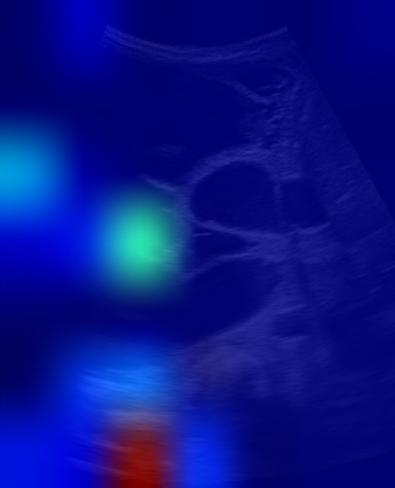

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/28.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([9.1205275e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([9.1205275e-06], shape=(1,), dtype=float32)


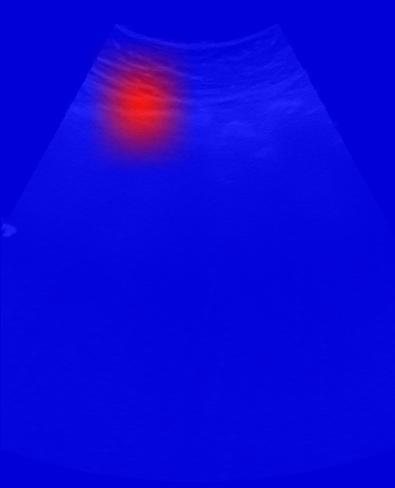

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/50.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.95924085], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.95924085], shape=(1,), dtype=float32)


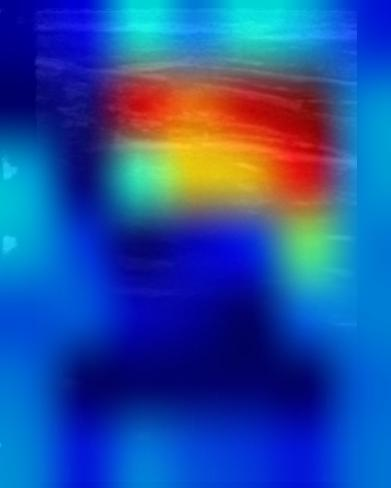

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/19.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.34986138], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.34986138], shape=(1,), dtype=float32)


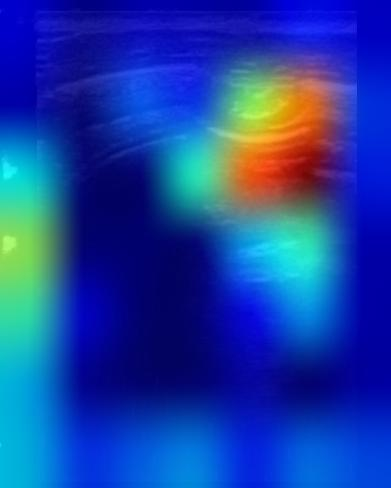

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/27.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.152883], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.152883], shape=(1,), dtype=float32)


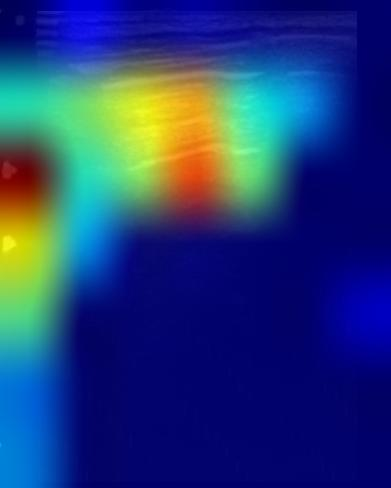

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/42.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00020096], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00020096], shape=(1,), dtype=float32)


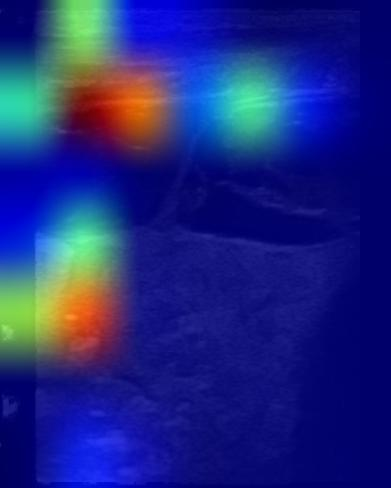

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/10.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.99930996], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.99930996], shape=(1,), dtype=float32)


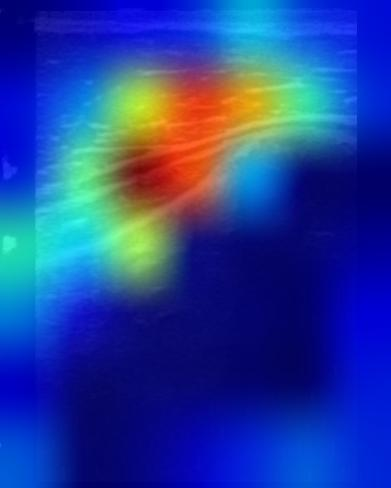

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/7.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([7.4336554e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([7.4336554e-06], shape=(1,), dtype=float32)


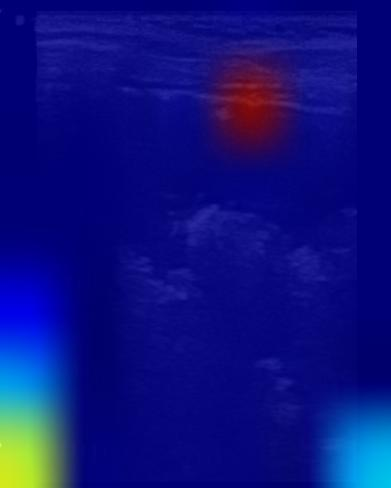

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/8.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9880391], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9880391], shape=(1,), dtype=float32)


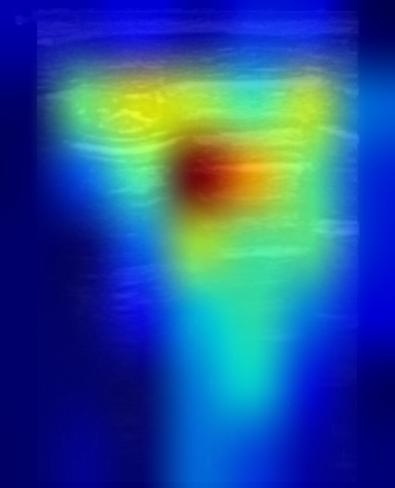

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/35.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([4.1342325e-08], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([4.1342325e-08], shape=(1,), dtype=float32)


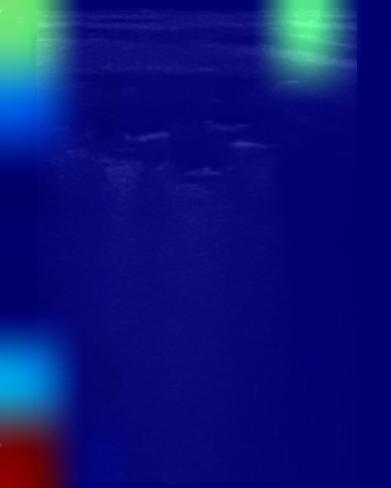

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/32.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.99823153], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.99823153], shape=(1,), dtype=float32)


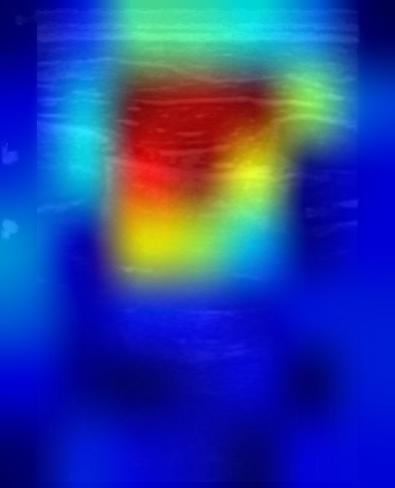

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/39.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.01069959], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.01069959], shape=(1,), dtype=float32)


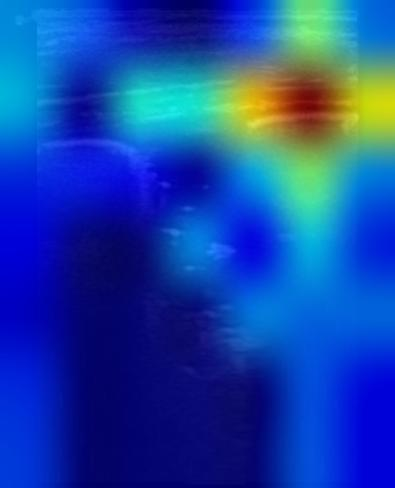

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/34.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([4.743167e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([4.743167e-05], shape=(1,), dtype=float32)


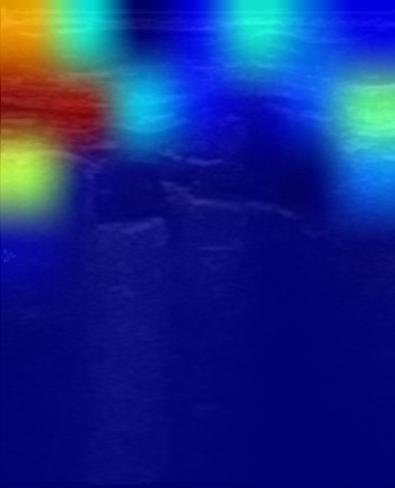

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/46.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([5.842325e-08], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([5.842325e-08], shape=(1,), dtype=float32)


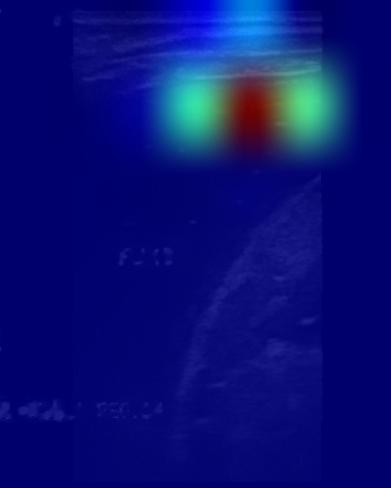

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/4.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([5.3772844e-09], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([5.3772844e-09], shape=(1,), dtype=float32)


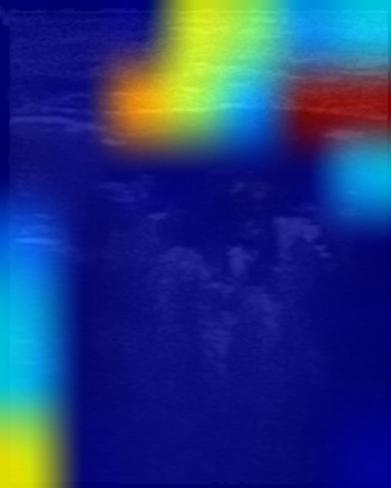

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/30.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([3.2663131e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([3.2663131e-06], shape=(1,), dtype=float32)


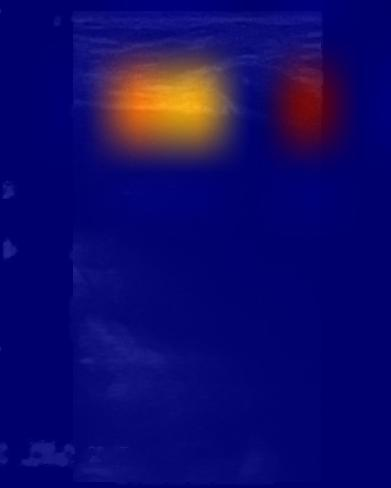

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/16.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.27692214], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.27692214], shape=(1,), dtype=float32)


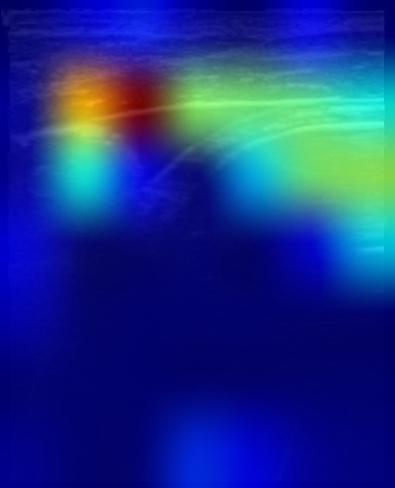

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/38.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00015188], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00015188], shape=(1,), dtype=float32)


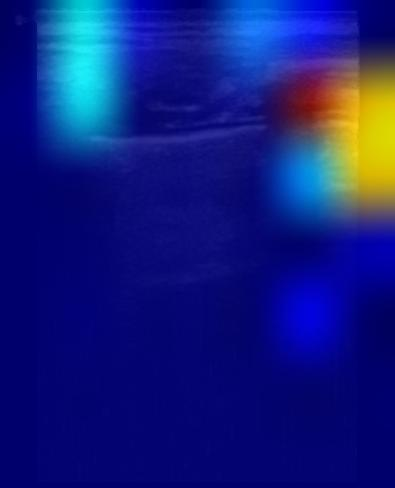

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/2.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9999545], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9999545], shape=(1,), dtype=float32)


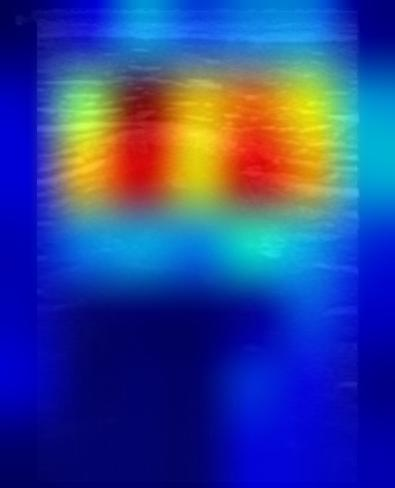

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/3.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9956763], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9956763], shape=(1,), dtype=float32)


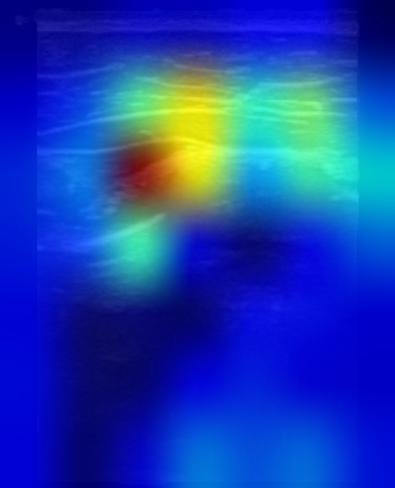

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/37.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.99896115], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.99896115], shape=(1,), dtype=float32)


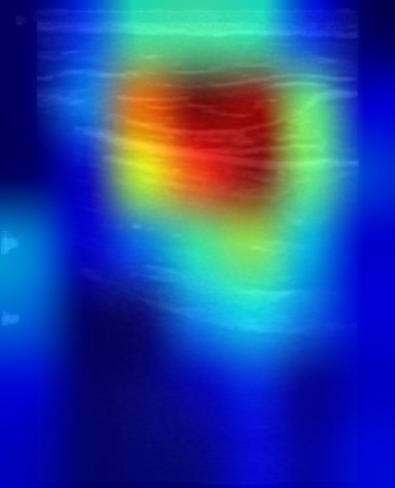

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/29.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.8514897], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.8514897], shape=(1,), dtype=float32)


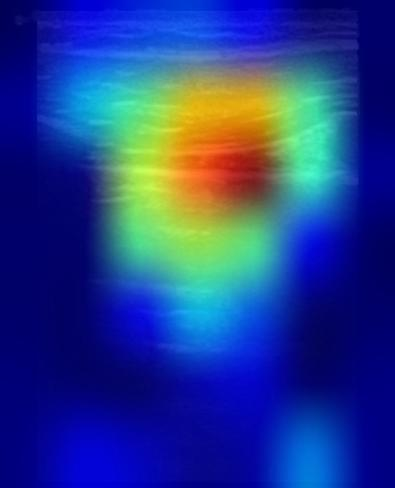

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/13.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.0002263], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.0002263], shape=(1,), dtype=float32)


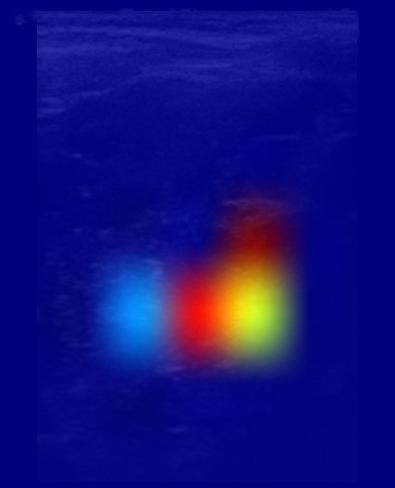

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/26.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.980137], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.980137], shape=(1,), dtype=float32)


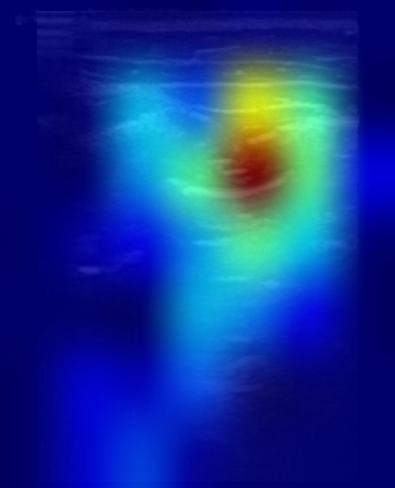

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/17.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00435121], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00435121], shape=(1,), dtype=float32)


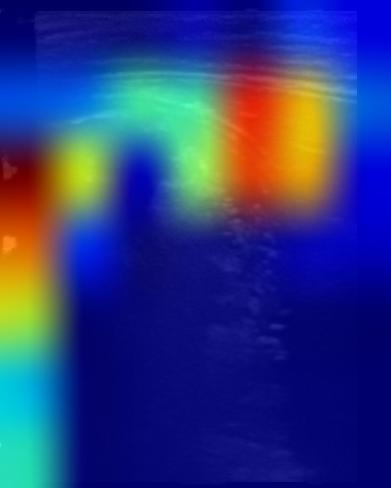

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/44.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([7.7558216e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([7.7558216e-05], shape=(1,), dtype=float32)


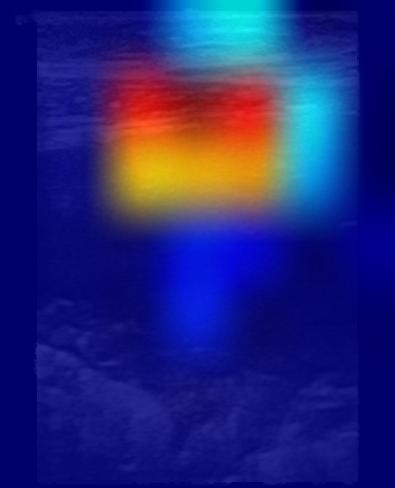

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/48.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00923326], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00923326], shape=(1,), dtype=float32)


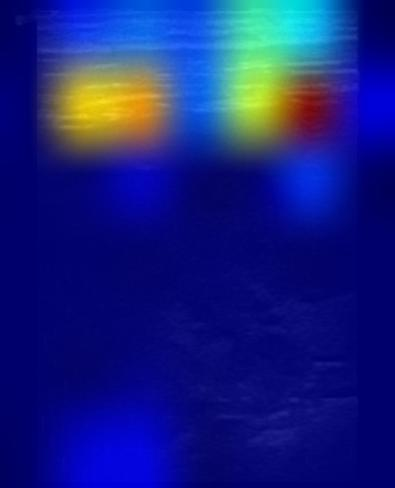

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/40.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.5387881e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.5387881e-05], shape=(1,), dtype=float32)


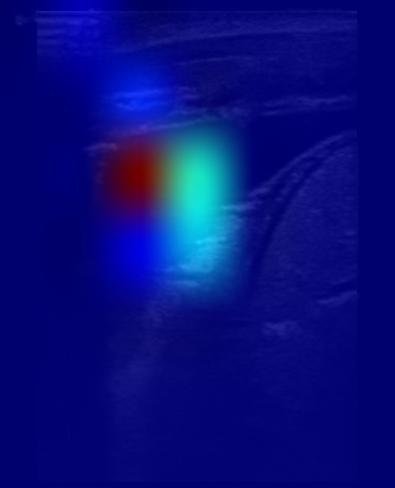

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/6.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.99795943], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.99795943], shape=(1,), dtype=float32)


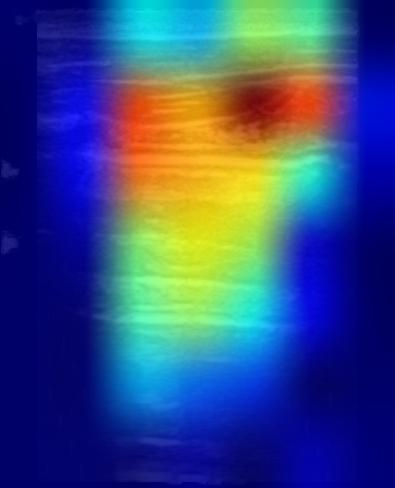

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/31.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.0054294], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.0054294], shape=(1,), dtype=float32)


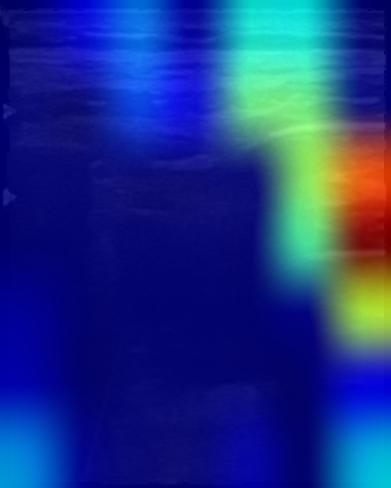

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/14.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.03199144], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.03199144], shape=(1,), dtype=float32)


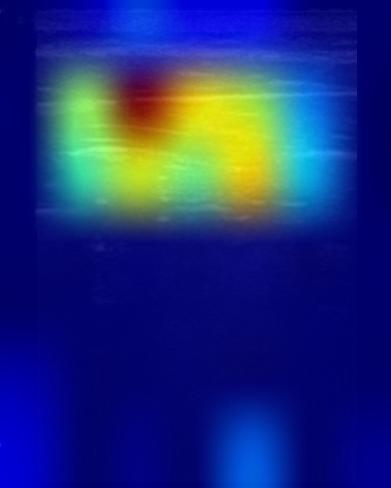

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/36.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9699697], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9699697], shape=(1,), dtype=float32)


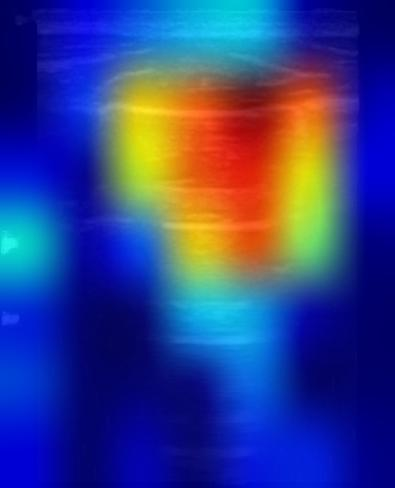

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/45.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([5.300149e-07], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([5.300149e-07], shape=(1,), dtype=float32)


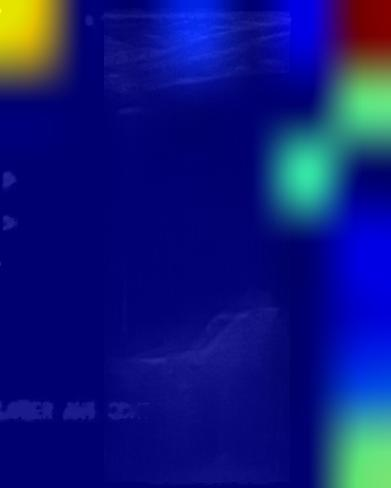

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/22.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9980327], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9980327], shape=(1,), dtype=float32)


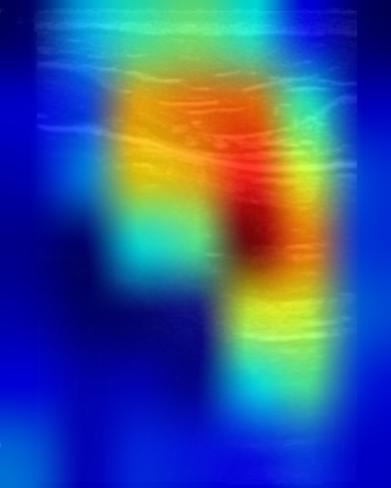

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/23.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.99996805], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.99996805], shape=(1,), dtype=float32)


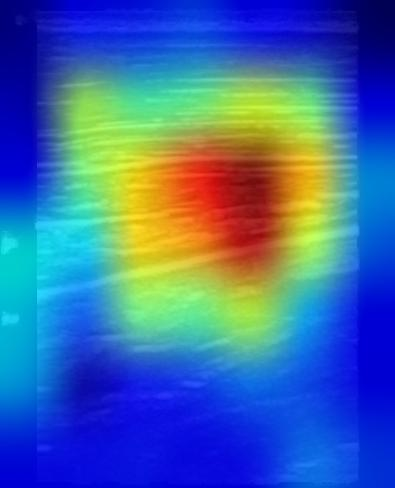

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/5.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.3062346e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.3062346e-05], shape=(1,), dtype=float32)


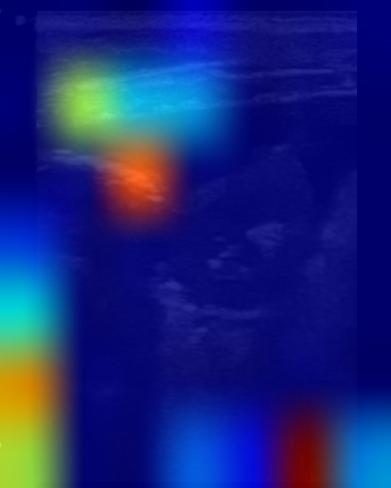

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/18.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9995072], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9995072], shape=(1,), dtype=float32)


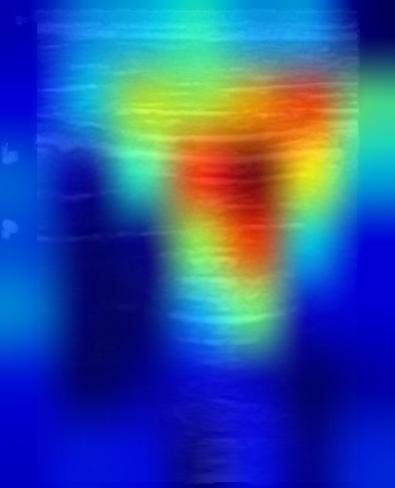

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/21.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00019455], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00019455], shape=(1,), dtype=float32)


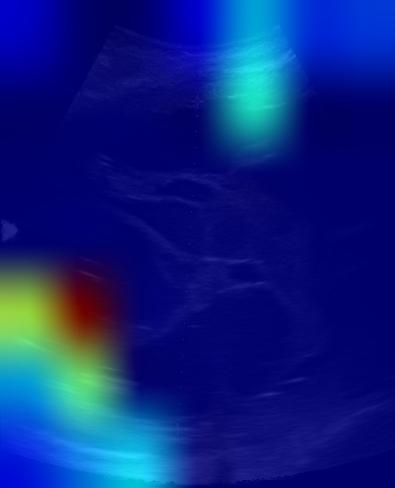

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/20.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00312263], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00312263], shape=(1,), dtype=float32)


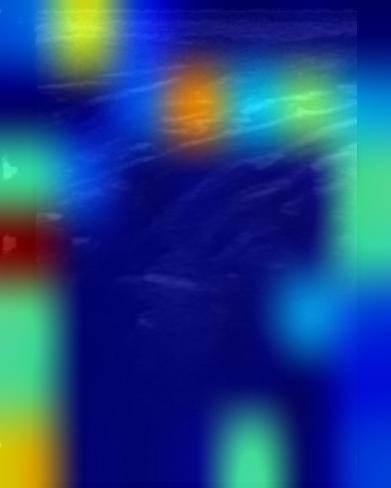

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/24.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.99999607], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.99999607], shape=(1,), dtype=float32)


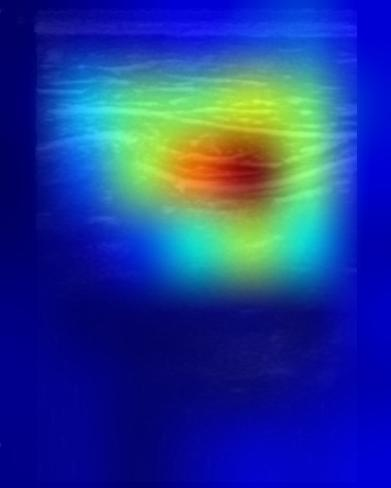

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/15.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9999779], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9999779], shape=(1,), dtype=float32)


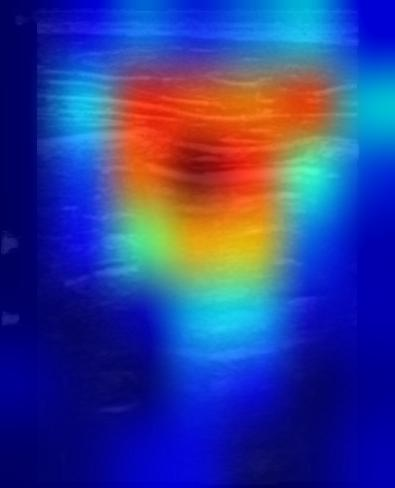

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/41.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9644271], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9644271], shape=(1,), dtype=float32)


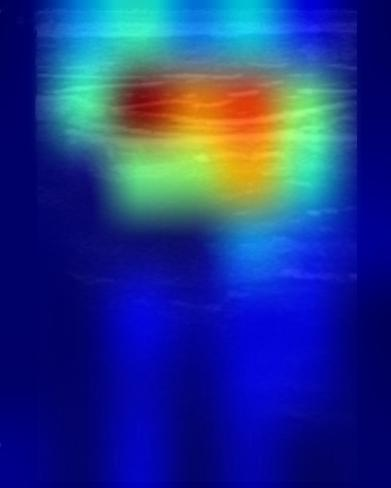

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/47.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.99885243], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.99885243], shape=(1,), dtype=float32)


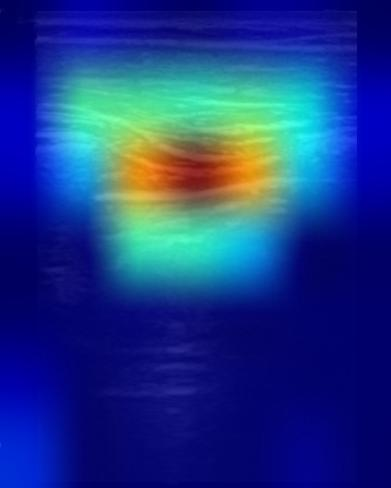

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/43.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9998816], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9998816], shape=(1,), dtype=float32)


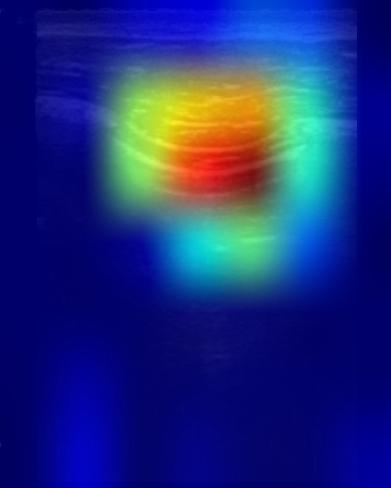

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/33.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([5.012407e-10], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([5.012407e-10], shape=(1,), dtype=float32)


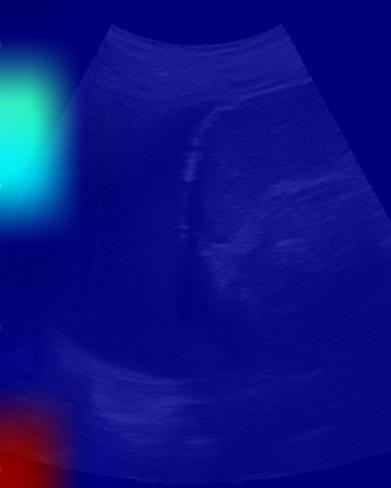

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/12.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9990882], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9990882], shape=(1,), dtype=float32)


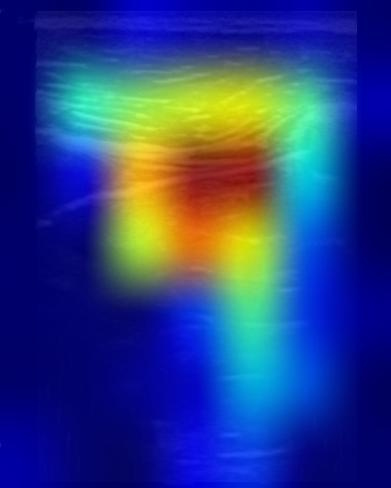

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/25.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9986075], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9986075], shape=(1,), dtype=float32)


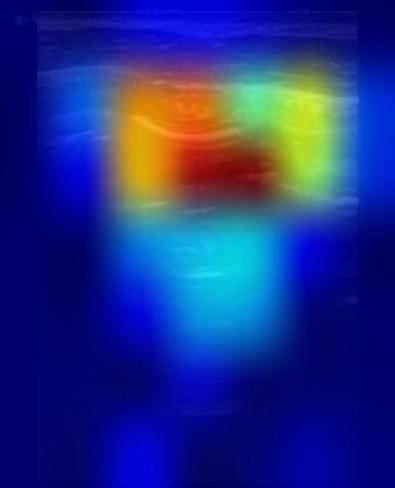

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/1.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.99906206], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.99906206], shape=(1,), dtype=float32)


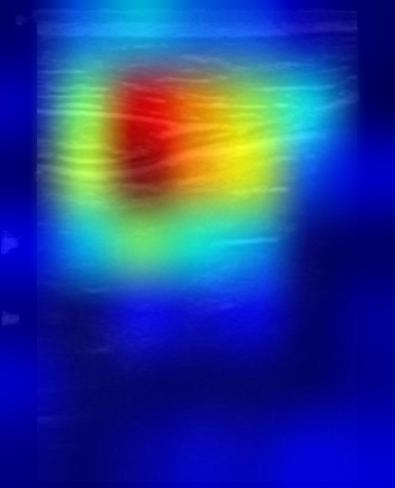

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/49.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.99999315], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.99999315], shape=(1,), dtype=float32)


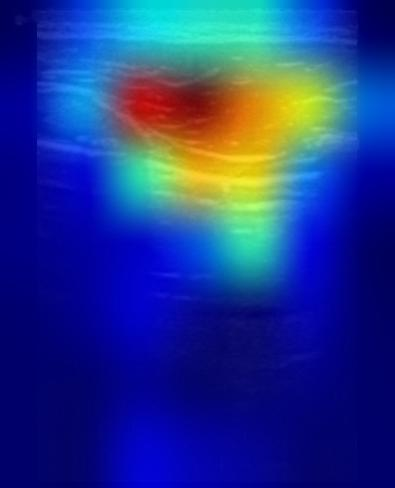

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/11.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.98081785], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.98081785], shape=(1,), dtype=float32)


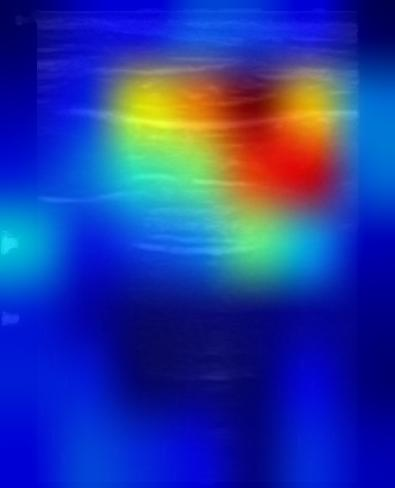

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/9.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([9.749439e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([9.749439e-06], shape=(1,), dtype=float32)


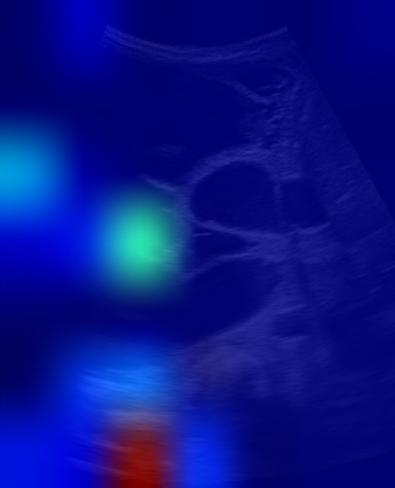

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/28.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([9.1205275e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([9.1205275e-06], shape=(1,), dtype=float32)


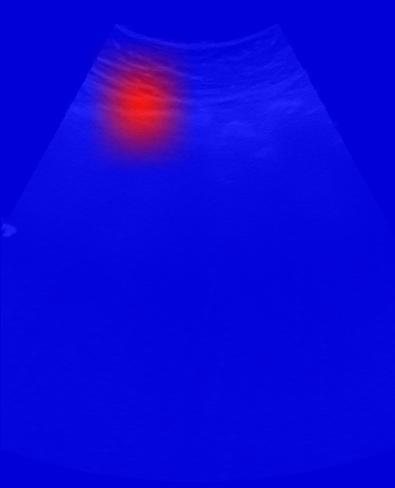

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/50.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.95924085], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.95924085], shape=(1,), dtype=float32)


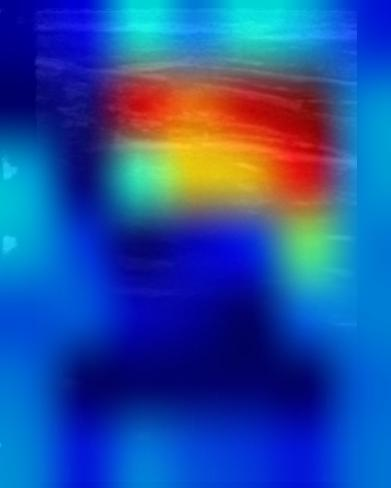

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/19.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.34986138], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.34986138], shape=(1,), dtype=float32)


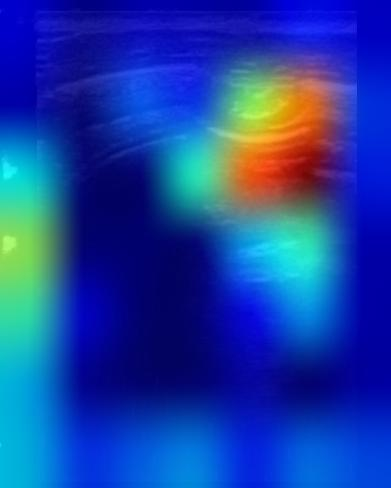

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/27.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.152883], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.152883], shape=(1,), dtype=float32)


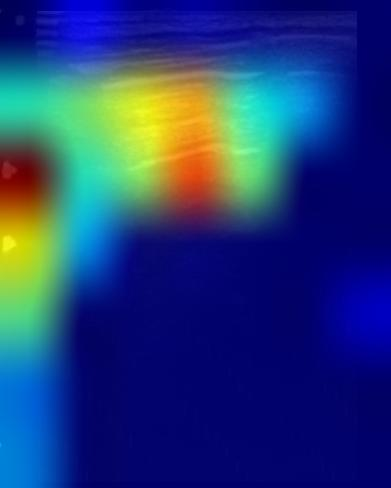

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/42.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00020096], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00020096], shape=(1,), dtype=float32)


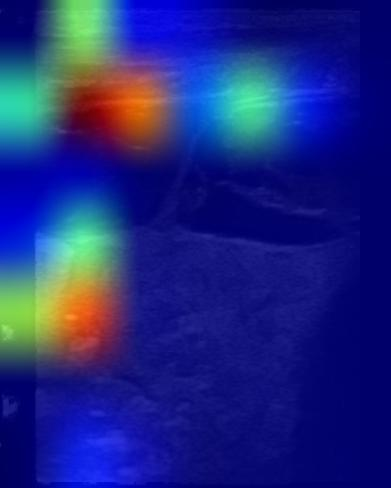

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/10.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.99930996], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.99930996], shape=(1,), dtype=float32)


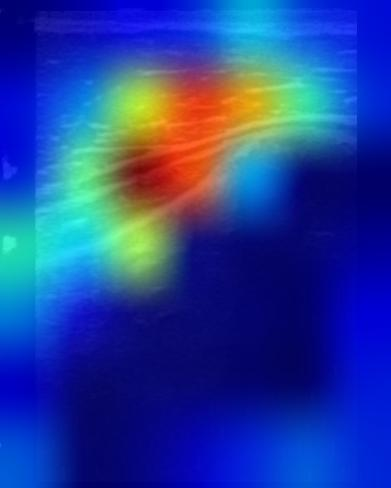

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/7.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([7.4336554e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([7.4336554e-06], shape=(1,), dtype=float32)


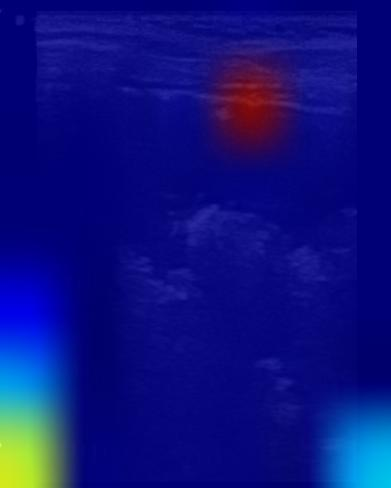

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/8.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9880391], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9880391], shape=(1,), dtype=float32)


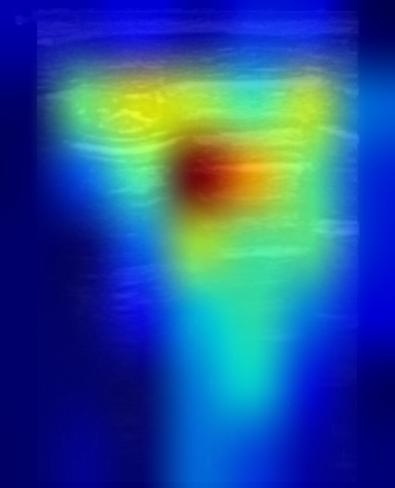

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/35.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([4.1342325e-08], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([4.1342325e-08], shape=(1,), dtype=float32)


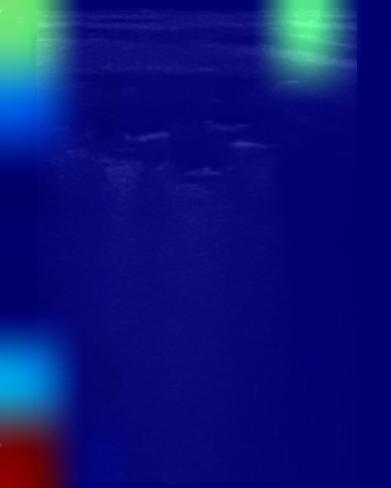

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/32.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.99823153], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.99823153], shape=(1,), dtype=float32)


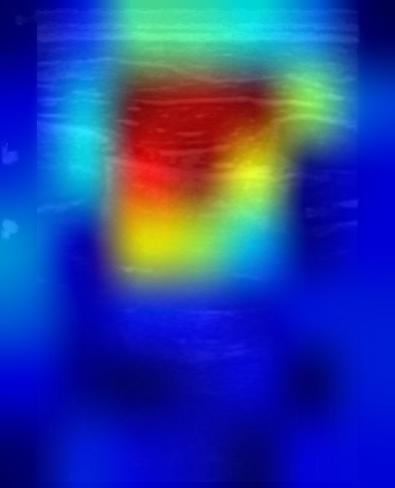

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/39.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.01069959], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.01069959], shape=(1,), dtype=float32)


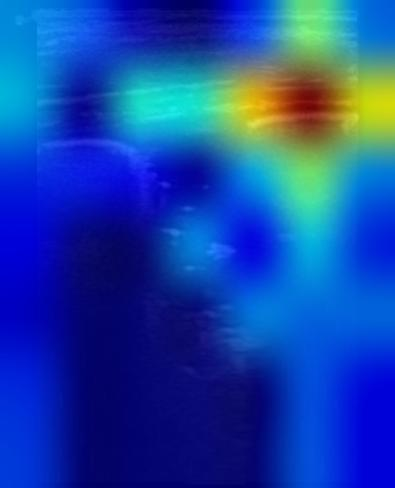

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/34.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([4.743167e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([4.743167e-05], shape=(1,), dtype=float32)


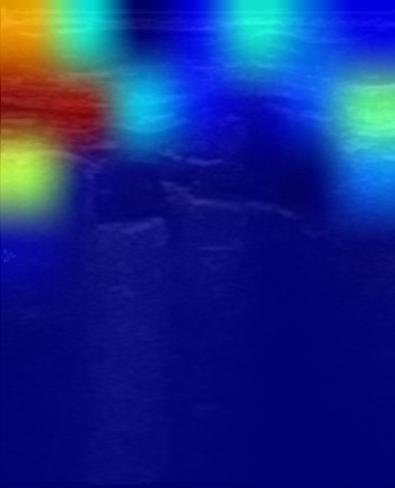

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/46.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([5.842325e-08], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([5.842325e-08], shape=(1,), dtype=float32)


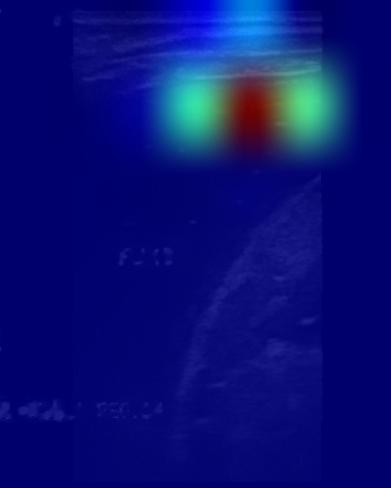

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/4.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([5.3772844e-09], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([5.3772844e-09], shape=(1,), dtype=float32)


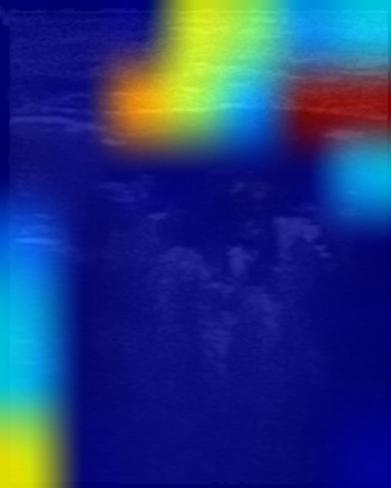

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/30.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([3.2663131e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([3.2663131e-06], shape=(1,), dtype=float32)


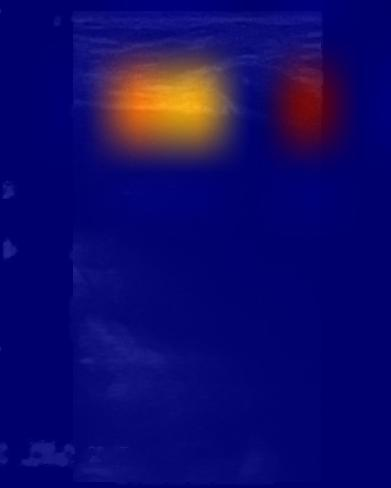

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/16.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.27692214], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.27692214], shape=(1,), dtype=float32)


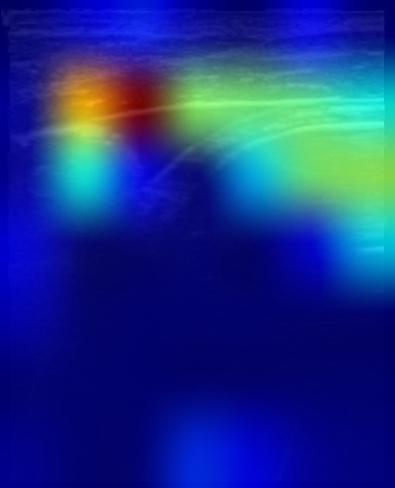

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/38.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00015188], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00015188], shape=(1,), dtype=float32)


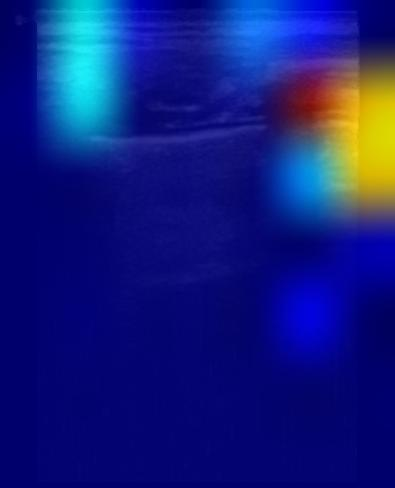

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/2.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9999545], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9999545], shape=(1,), dtype=float32)


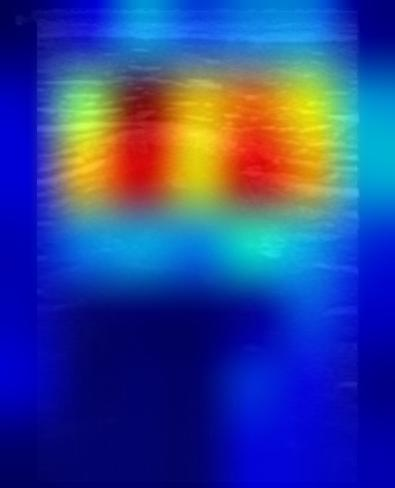

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/3.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9956763], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9956763], shape=(1,), dtype=float32)


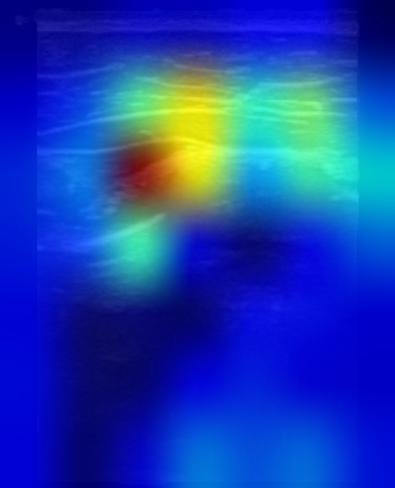

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/37.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.99896115], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.99896115], shape=(1,), dtype=float32)


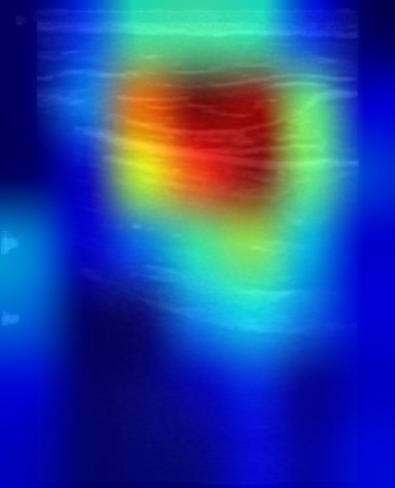

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/29.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.8514897], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.8514897], shape=(1,), dtype=float32)


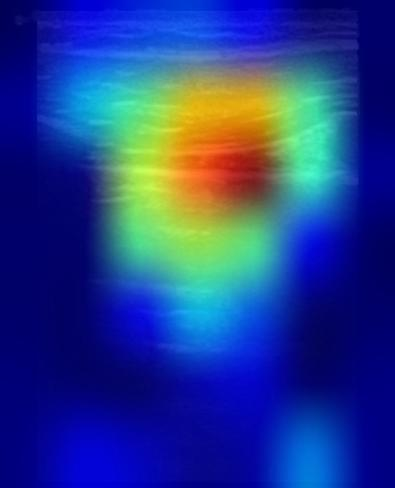

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/13.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.0002263], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.0002263], shape=(1,), dtype=float32)


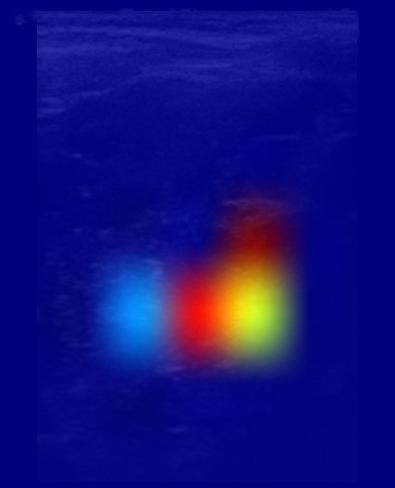

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/26.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.980137], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.980137], shape=(1,), dtype=float32)


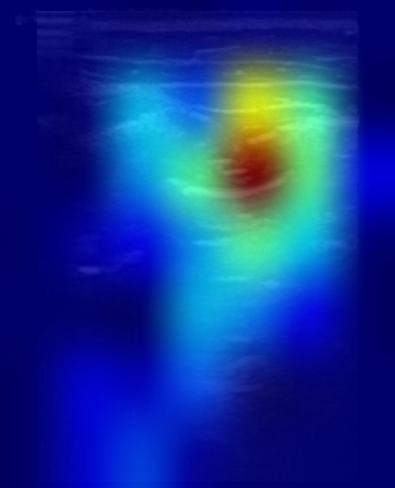

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/17.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00435121], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00435121], shape=(1,), dtype=float32)


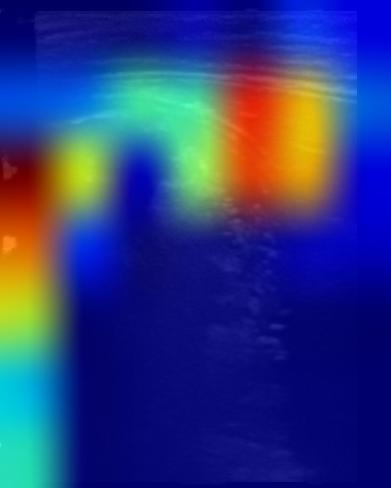

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/44.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([7.7558216e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([7.7558216e-05], shape=(1,), dtype=float32)


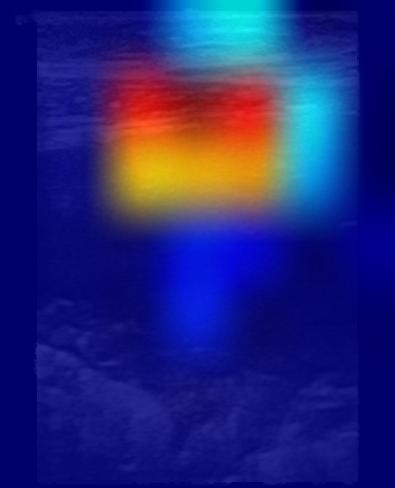

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/48.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00923326], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00923326], shape=(1,), dtype=float32)


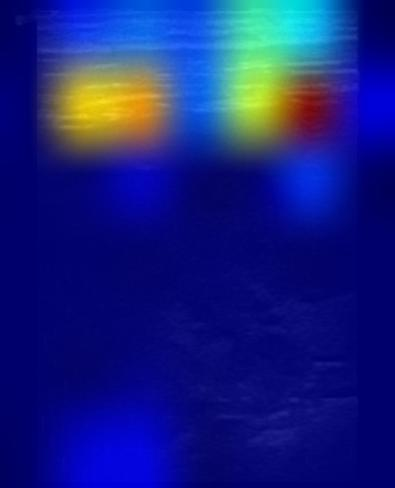

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/40.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.5387881e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.5387881e-05], shape=(1,), dtype=float32)


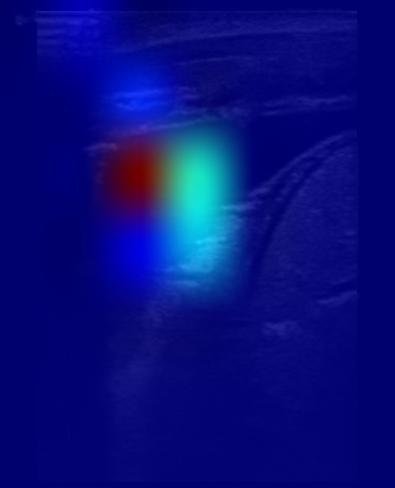

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/6.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.99795943], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.99795943], shape=(1,), dtype=float32)


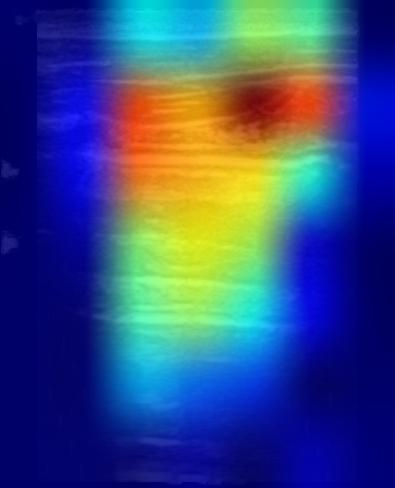

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/31.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.0054294], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.0054294], shape=(1,), dtype=float32)


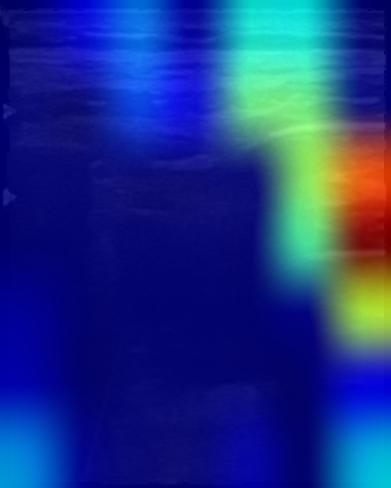

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/14.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.03199144], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.03199144], shape=(1,), dtype=float32)


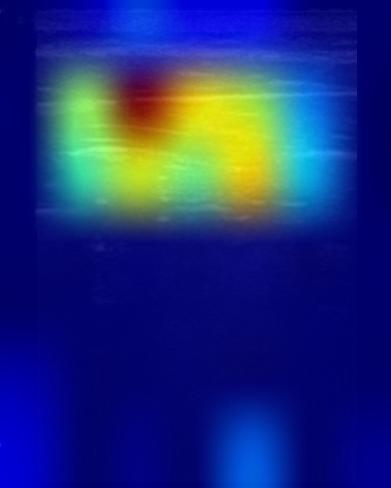

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/36.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9699697], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9699697], shape=(1,), dtype=float32)


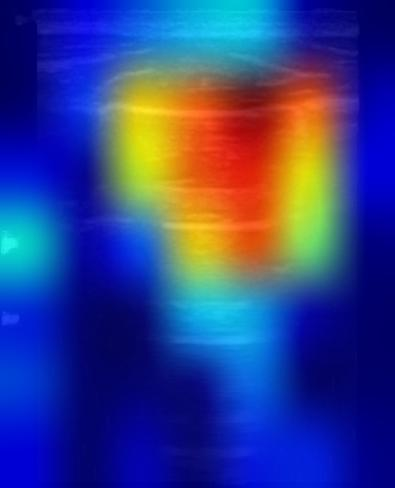

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/45.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([5.300149e-07], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([5.300149e-07], shape=(1,), dtype=float32)


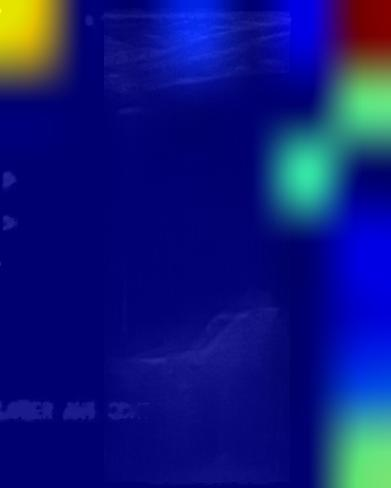

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/22.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9980327], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9980327], shape=(1,), dtype=float32)


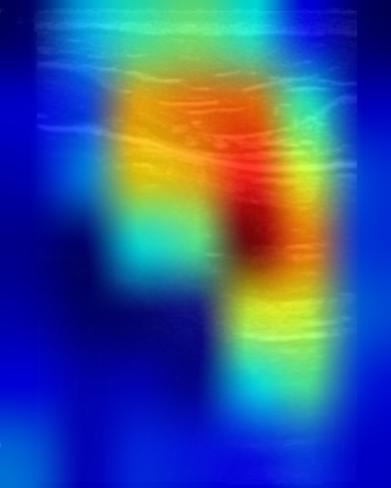

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/23.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.99996805], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.99996805], shape=(1,), dtype=float32)


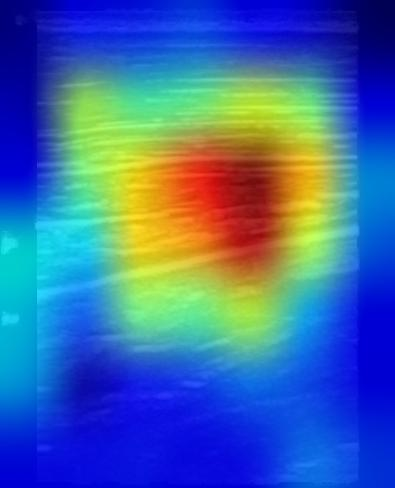

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/5.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.3062346e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.3062346e-05], shape=(1,), dtype=float32)


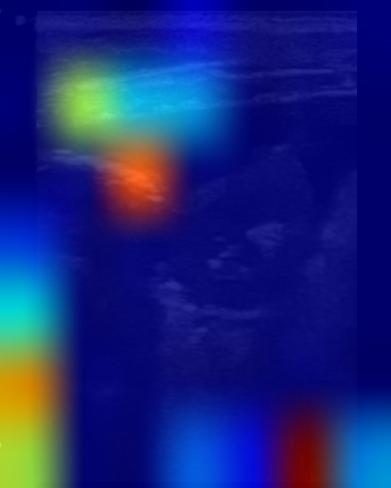

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/18.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9995072], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9995072], shape=(1,), dtype=float32)


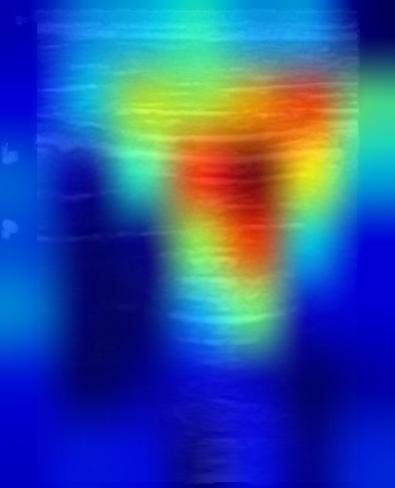

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/21.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00019455], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00019455], shape=(1,), dtype=float32)


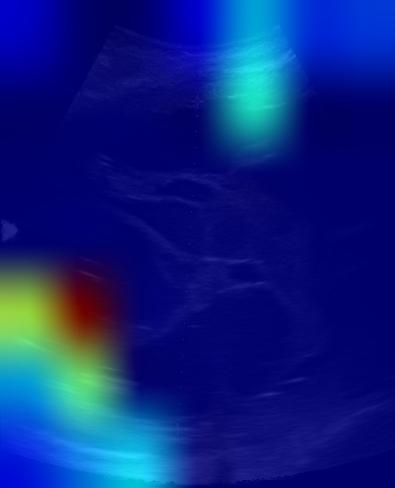

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/20.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00312263], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00312263], shape=(1,), dtype=float32)


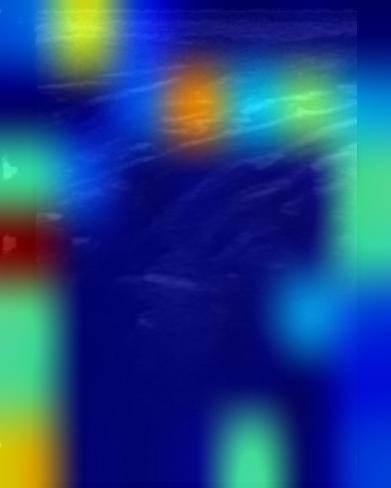

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/24.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.99999607], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.99999607], shape=(1,), dtype=float32)


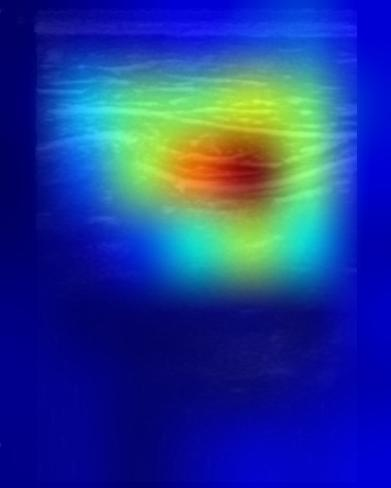

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/15.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9999779], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9999779], shape=(1,), dtype=float32)


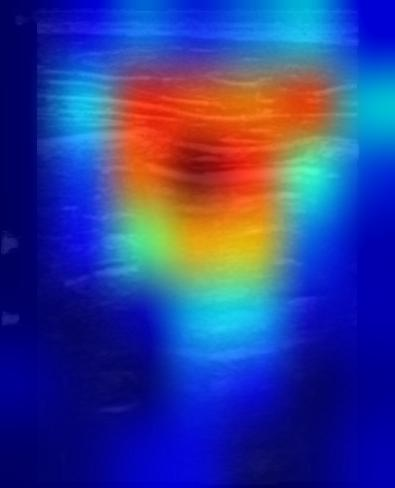

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/41.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9644271], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9644271], shape=(1,), dtype=float32)


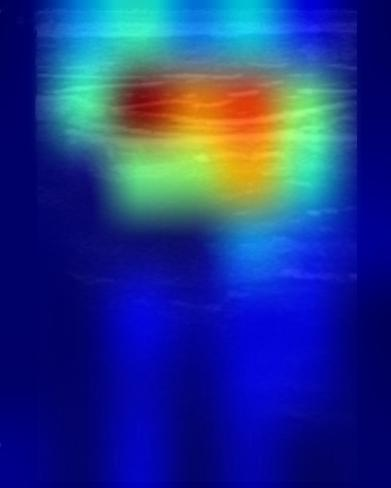

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/47.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.99885243], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.99885243], shape=(1,), dtype=float32)


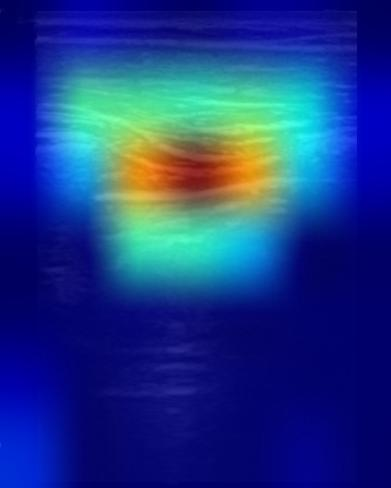

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/43.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9998816], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9998816], shape=(1,), dtype=float32)


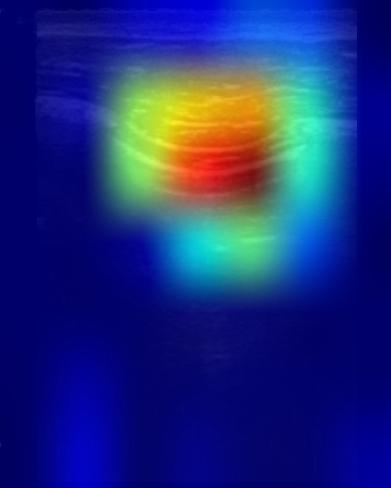

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/33.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([5.012407e-10], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([5.012407e-10], shape=(1,), dtype=float32)


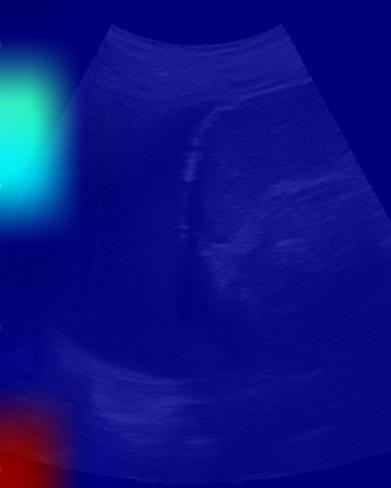

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/12.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9990882], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9990882], shape=(1,), dtype=float32)


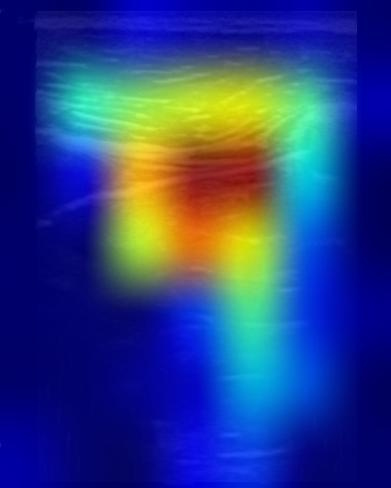

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/25.png
Prediction: Normal/ Not Sick
------------------


In [ ]:
# Generate heatmaps and save them
for (img_path, input), prediction in zip(input_images, predictions):
    heatmap = make_gradcam_heatmap(input, new_model)
    save_and_display_gradcam(img_path, heatmap)

    # Determine if the image is true or false
    is_true = prediction[0][0]
    if is_true:
        label = "Normal/ Not Sick"
    else:
        label = "Infected/ Sick"

    print(f"Image: {img_path}")
    print(f"Prediction: {label}")
    print("------------------")

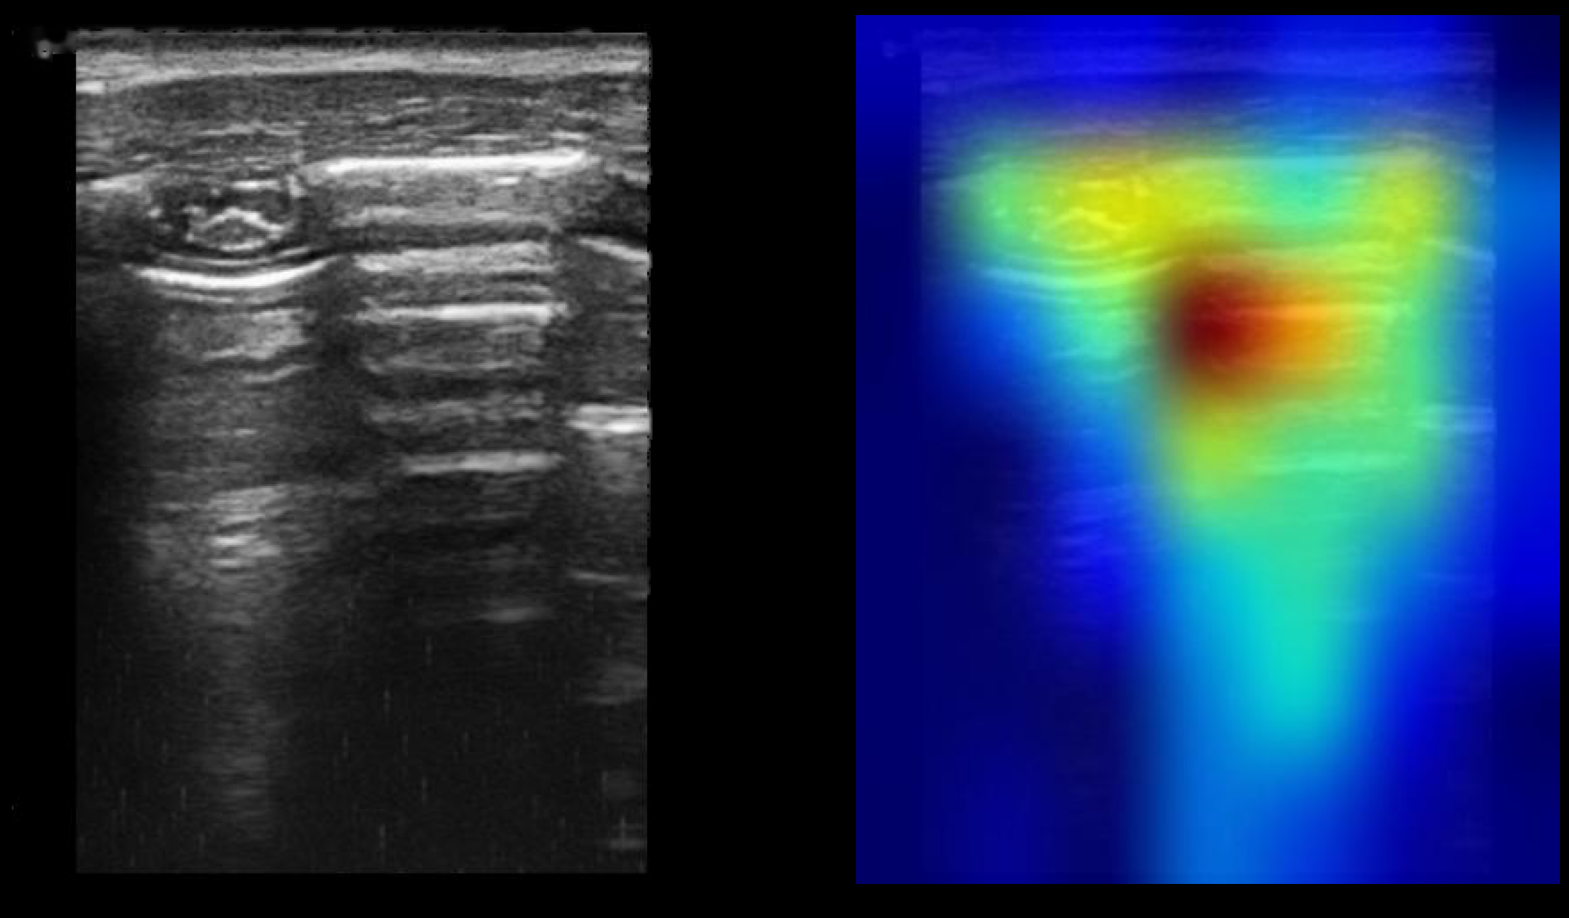

In [ ]:
plt.figure(figsize=(20,20),facecolor='black')

plt.subplot(1,2,1)
img = plt.imread(img_path)
plt.imshow(img,cmap='gray')
plt.grid(False)
plt.axis('off')

plt.subplot(1,2,2)
im = plt.imread("cam.jpg")
plt.imshow(im)
plt.grid(False)
plt.axis('on')

plt.show()

**Dataset 2**

1/1 [==============================] - 0s 215ms/step
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.257873e-10], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.257873e-10], shape=(1,), dtype=float32)


<ipython-input-63-b2c35ca37b83>:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


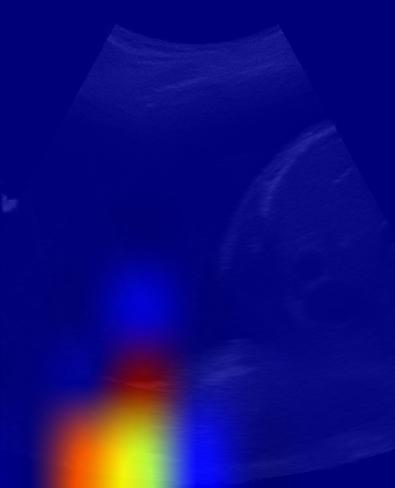

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff94.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([6.6624665e-08], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([6.6624665e-08], shape=(1,), dtype=float32)


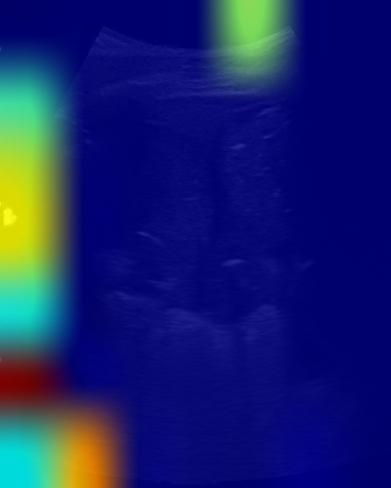

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff11.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00021828], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00021828], shape=(1,), dtype=float32)


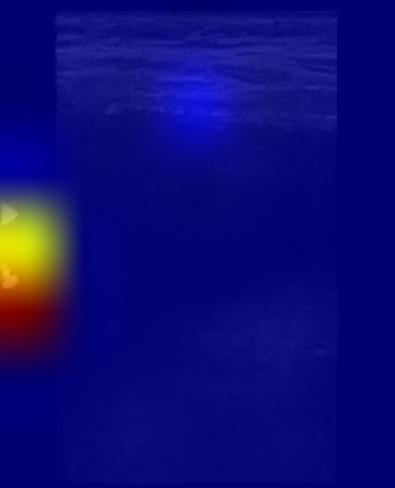

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff92.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.625379e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.625379e-06], shape=(1,), dtype=float32)


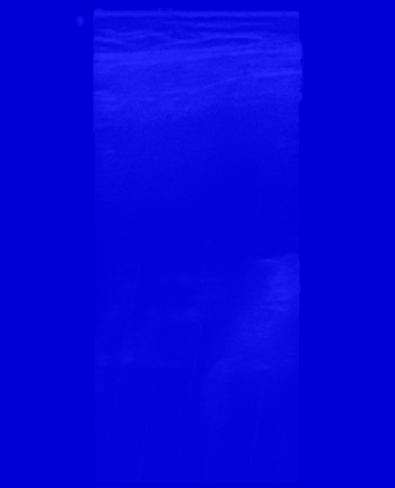

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif0.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.9838714e-07], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.9838714e-07], shape=(1,), dtype=float32)


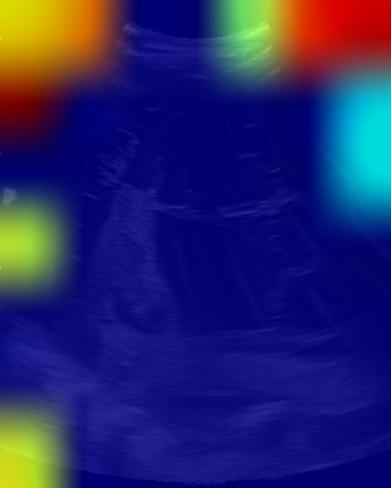

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff85.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.625379e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.625379e-06], shape=(1,), dtype=float32)


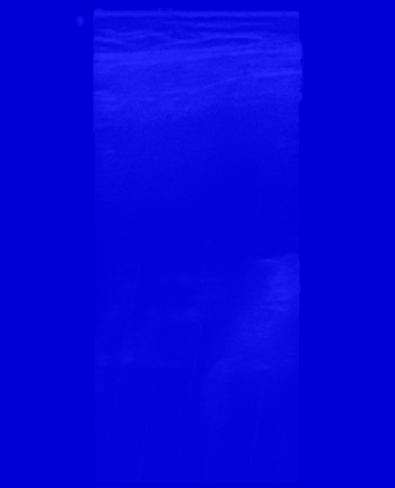

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif6.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.34605765], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.34605765], shape=(1,), dtype=float32)


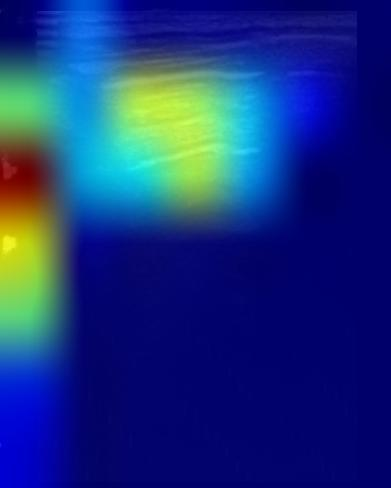

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif91.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([3.042778e-07], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([3.042778e-07], shape=(1,), dtype=float32)


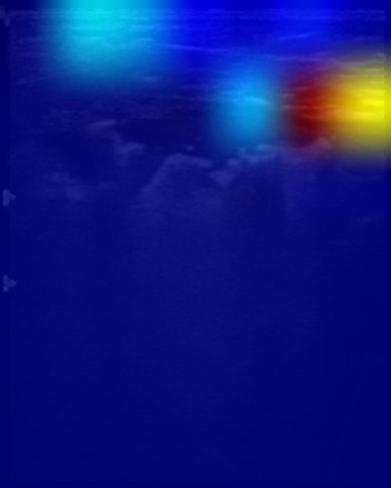

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif85.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([5.7336885e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([5.7336885e-05], shape=(1,), dtype=float32)


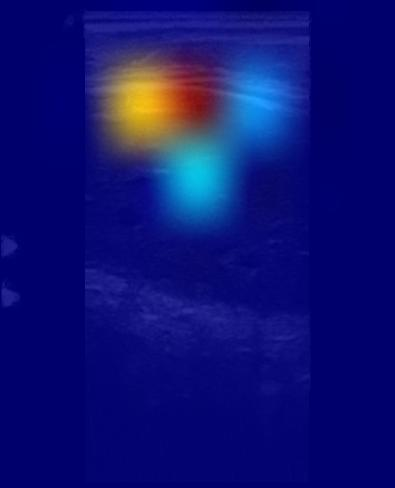

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif12.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([9.1205275e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([9.1205275e-06], shape=(1,), dtype=float32)


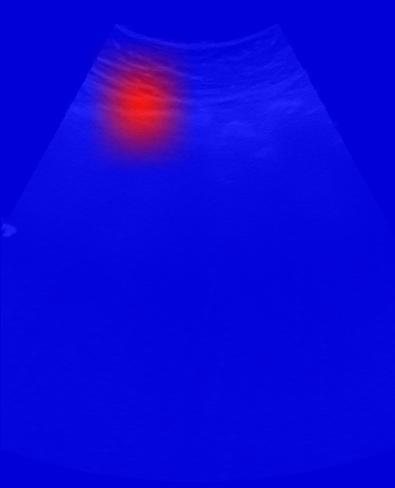

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif44.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.1624254e-08], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.1624254e-08], shape=(1,), dtype=float32)


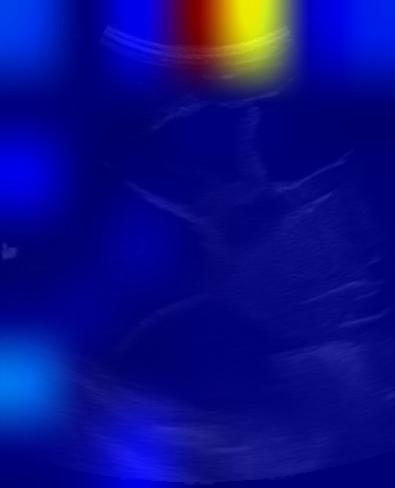

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif36.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([4.7934725e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([4.7934725e-05], shape=(1,), dtype=float32)


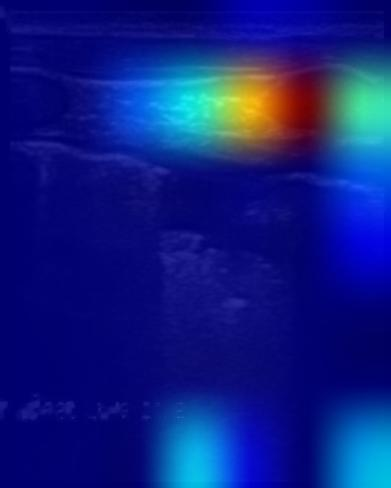

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff111.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00045054], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00045054], shape=(1,), dtype=float32)


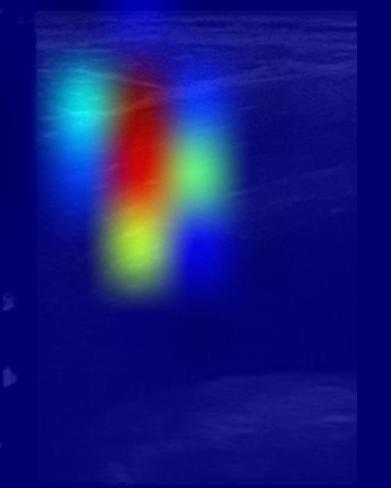

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif105.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([8.155186e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([8.155186e-06], shape=(1,), dtype=float32)


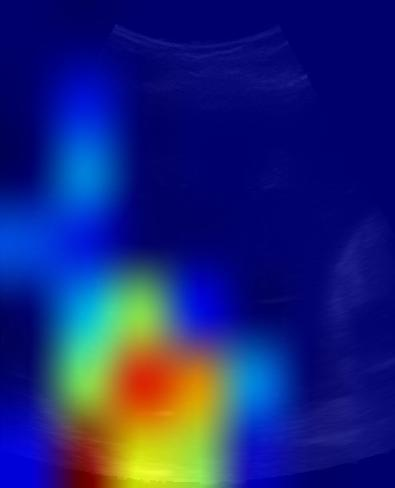

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff88.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.1265163e-07], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.1265163e-07], shape=(1,), dtype=float32)


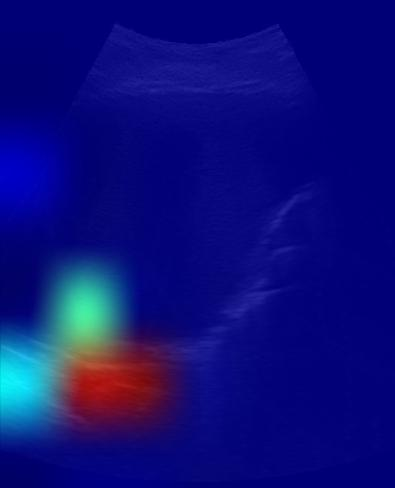

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif10.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.0001466], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.0001466], shape=(1,), dtype=float32)


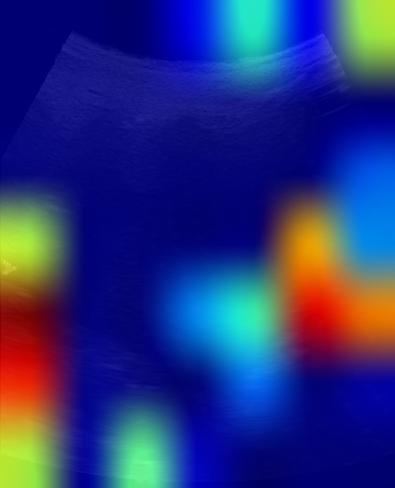

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif98.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.7962904e-08], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.7962904e-08], shape=(1,), dtype=float32)


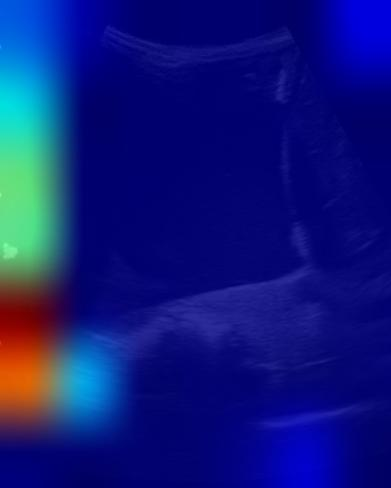

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif43.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.790922e-07], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.790922e-07], shape=(1,), dtype=float32)


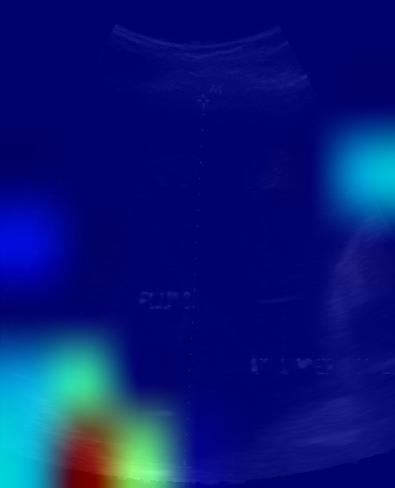

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff100.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9447653], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9447653], shape=(1,), dtype=float32)


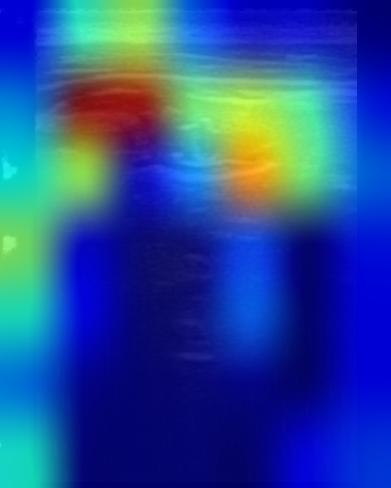

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff51.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.5772064e-09], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.5772064e-09], shape=(1,), dtype=float32)


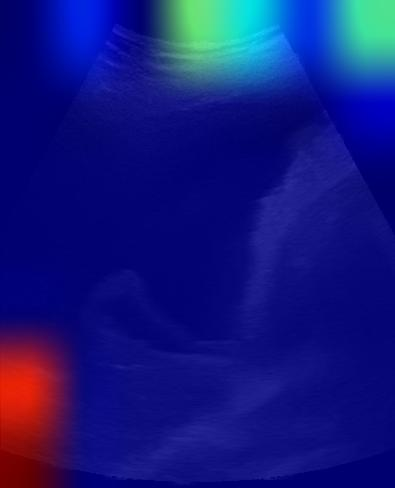

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif4.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([8.9253933e-07], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([8.9253933e-07], shape=(1,), dtype=float32)


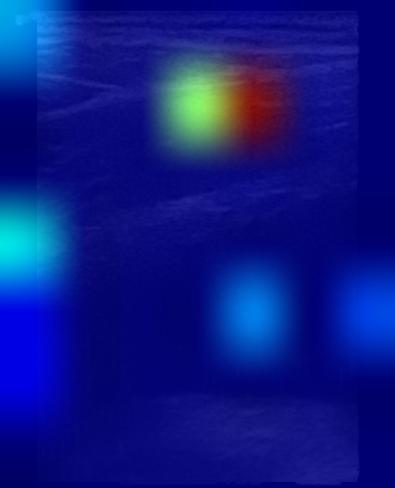

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif104.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([3.966103e-09], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([3.966103e-09], shape=(1,), dtype=float32)


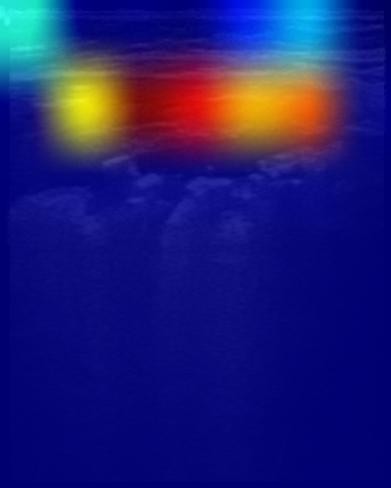

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif87.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.5566733e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.5566733e-05], shape=(1,), dtype=float32)


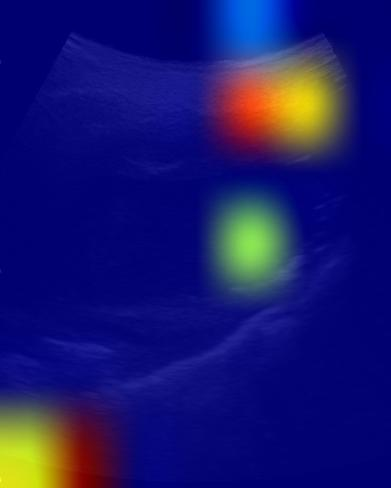

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif99.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.1786337e-12], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.1786337e-12], shape=(1,), dtype=float32)


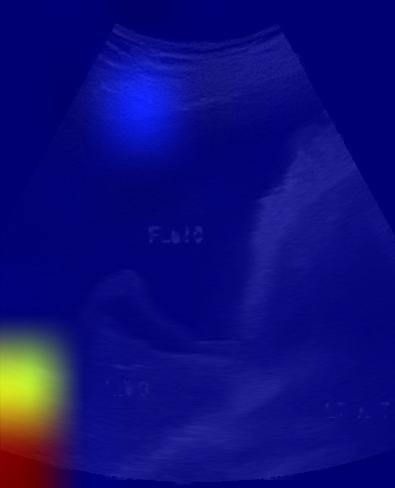

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif2.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([4.4974502e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([4.4974502e-05], shape=(1,), dtype=float32)


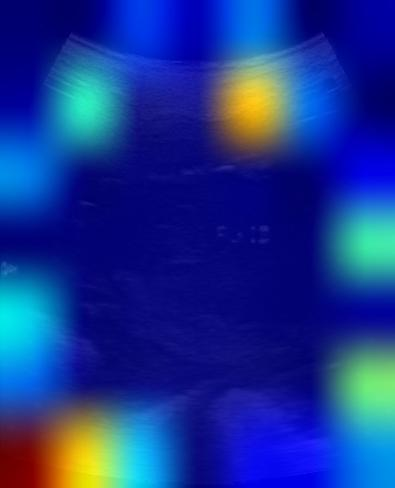

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif102.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([8.0886906e-07], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([8.0886906e-07], shape=(1,), dtype=float32)


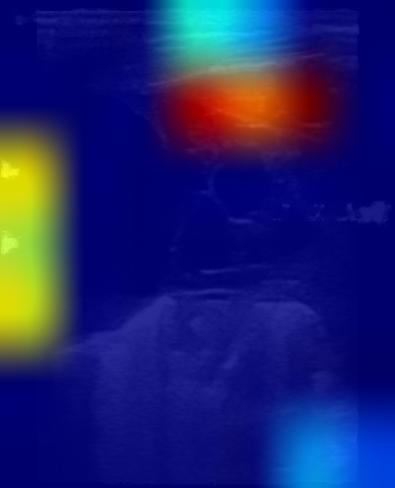

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif68.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.1139975e-08], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.1139975e-08], shape=(1,), dtype=float32)


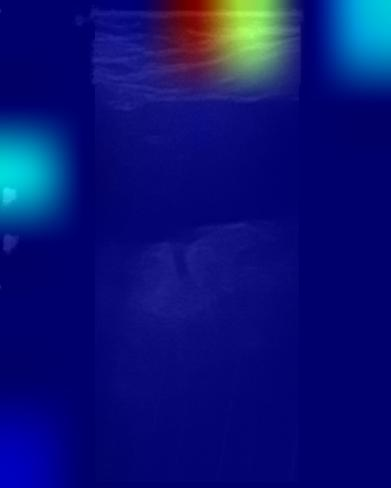

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif7.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.6720185e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.6720185e-05], shape=(1,), dtype=float32)


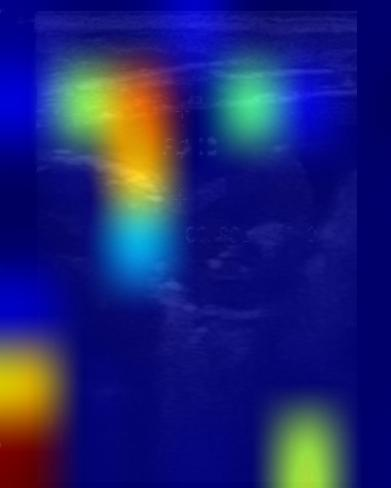

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff69.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([5.328073e-07], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([5.328073e-07], shape=(1,), dtype=float32)


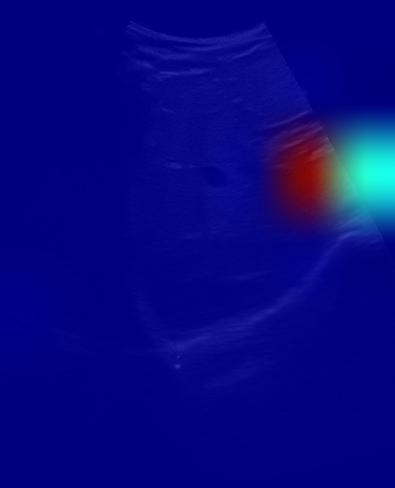

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff62.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([4.243938e-08], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([4.243938e-08], shape=(1,), dtype=float32)


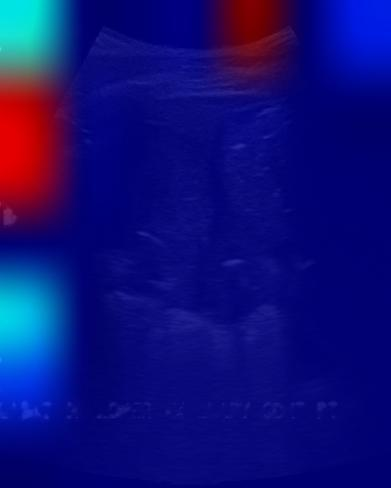

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff13.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.04561e-08], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.04561e-08], shape=(1,), dtype=float32)


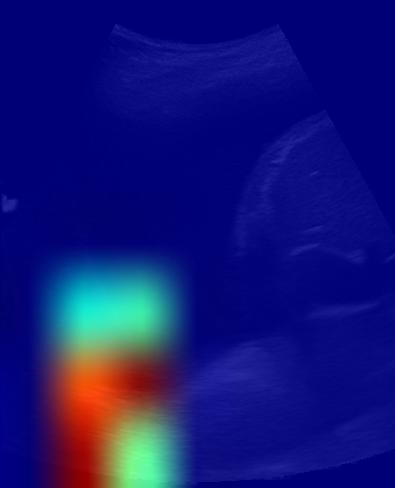

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff90.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([6.3607818e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([6.3607818e-06], shape=(1,), dtype=float32)


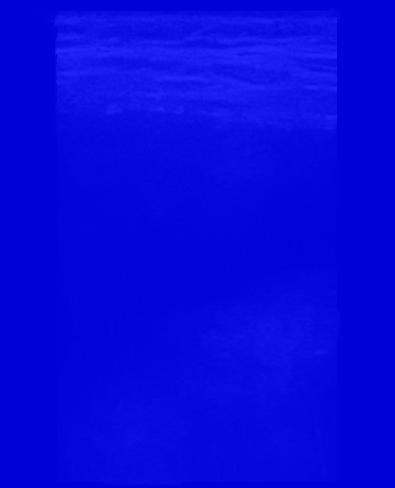

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff96.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([3.455615e-10], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([3.455615e-10], shape=(1,), dtype=float32)


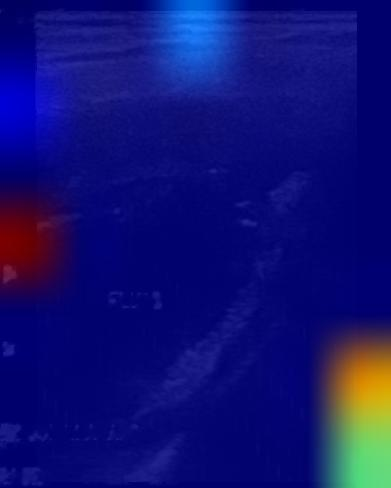

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif93.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9893216], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9893216], shape=(1,), dtype=float32)


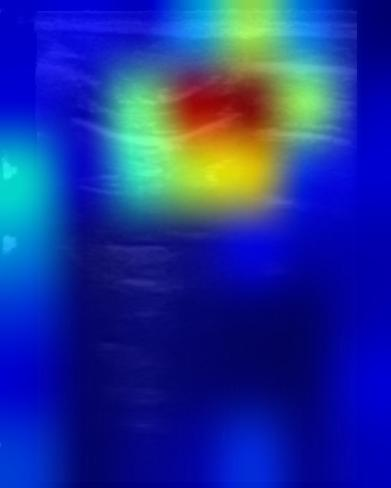

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff53.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.7735348], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.7735348], shape=(1,), dtype=float32)


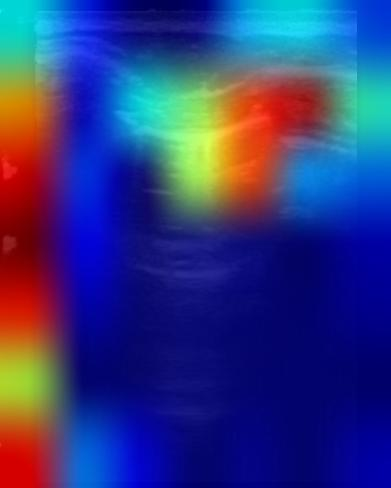

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff59.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.2925146e-08], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.2925146e-08], shape=(1,), dtype=float32)


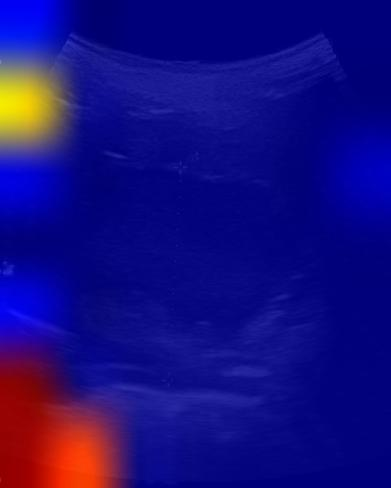

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif101.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.1631946e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.1631946e-05], shape=(1,), dtype=float32)


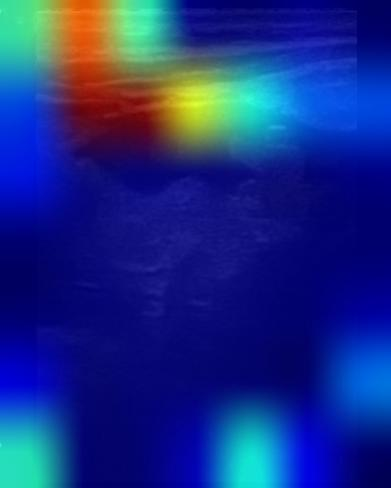

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif27.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.6175527e-07], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.6175527e-07], shape=(1,), dtype=float32)


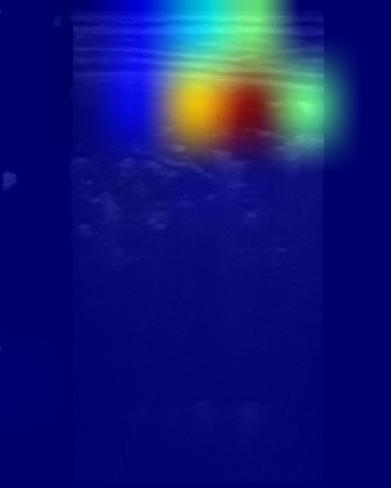

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff21.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00010905], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00010905], shape=(1,), dtype=float32)


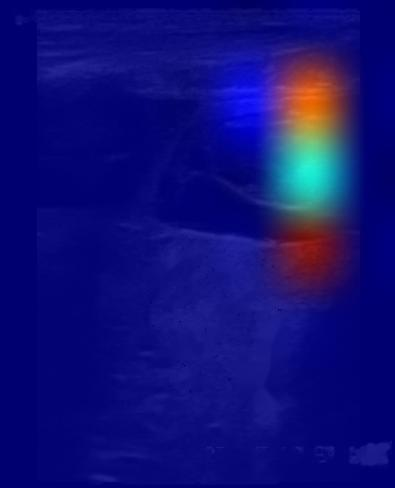

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif64.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00019455], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00019455], shape=(1,), dtype=float32)


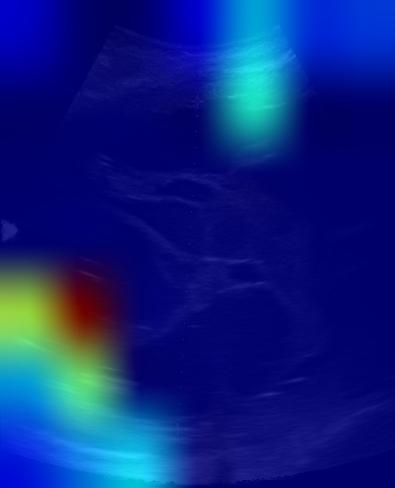

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif76.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00019816], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00019816], shape=(1,), dtype=float32)


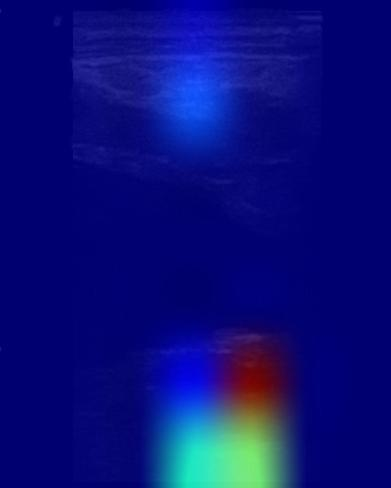

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif77.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.0435945e-07], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.0435945e-07], shape=(1,), dtype=float32)


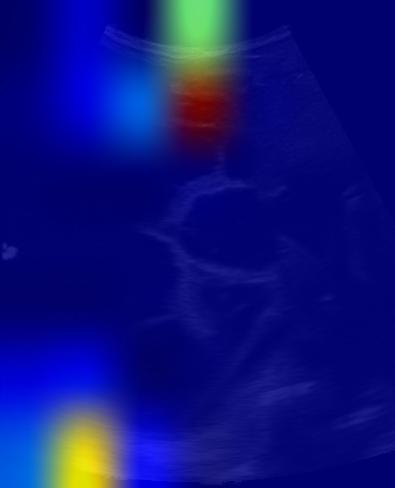

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif40.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.5094034e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.5094034e-06], shape=(1,), dtype=float32)


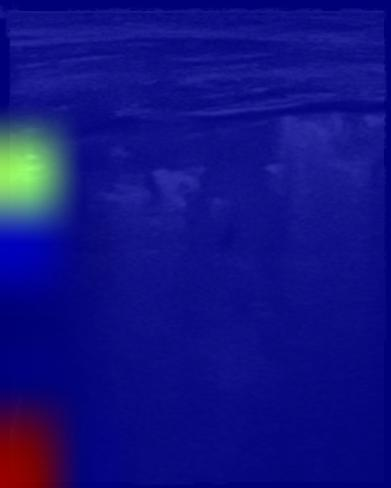

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff45.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([3.8144972e-07], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([3.8144972e-07], shape=(1,), dtype=float32)


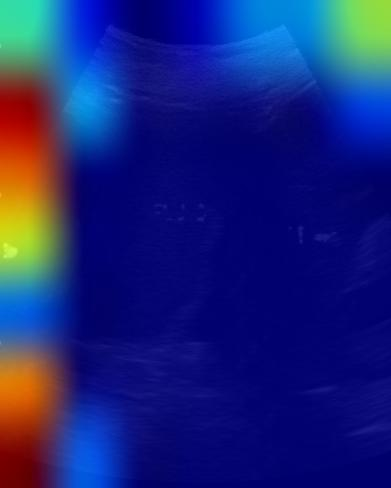

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif15.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([3.669276e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([3.669276e-05], shape=(1,), dtype=float32)


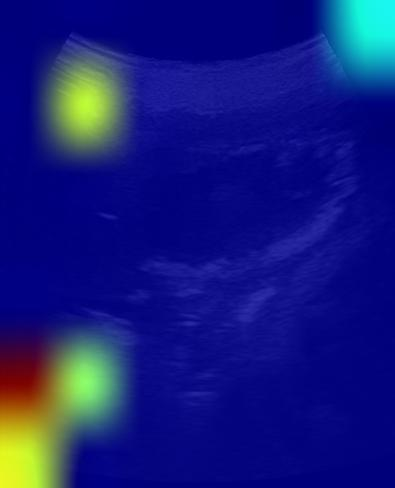

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif100.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9996901], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9996901], shape=(1,), dtype=float32)


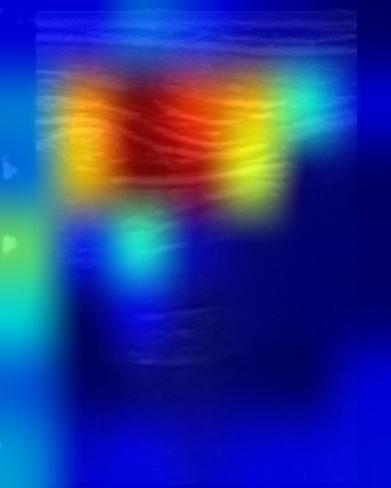

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif53.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.6471434e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.6471434e-06], shape=(1,), dtype=float32)


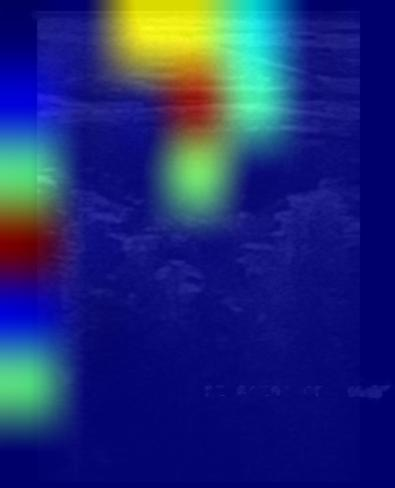

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff18.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.1663056e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.1663056e-05], shape=(1,), dtype=float32)


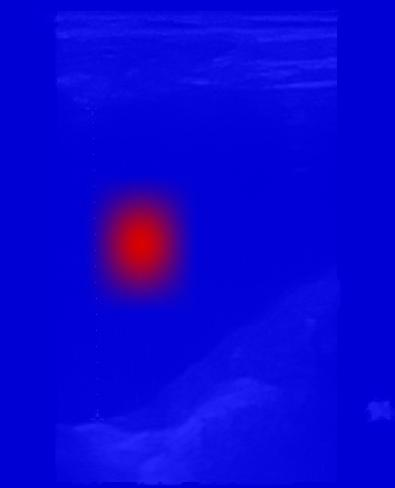

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif110.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00016053], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00016053], shape=(1,), dtype=float32)


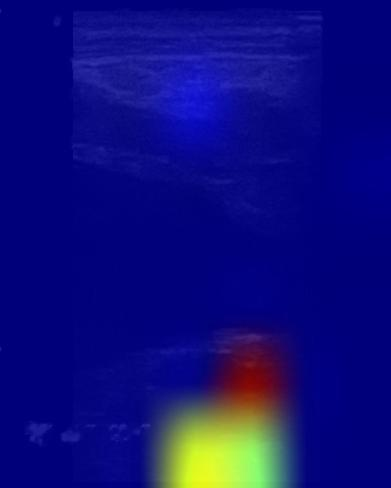

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif75.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([4.5929384e-13], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([4.5929384e-13], shape=(1,), dtype=float32)


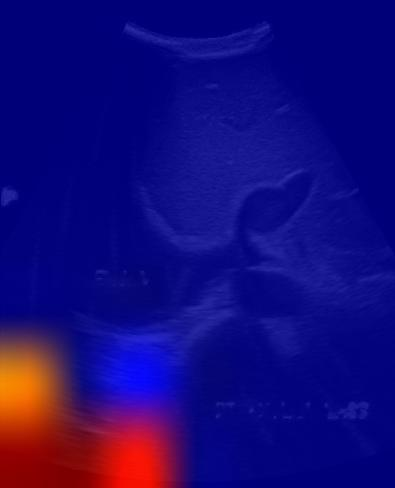

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff80.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00143551], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00143551], shape=(1,), dtype=float32)


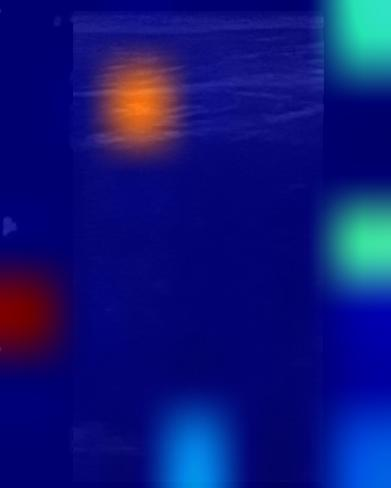

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff23.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.177769e-08], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.177769e-08], shape=(1,), dtype=float32)


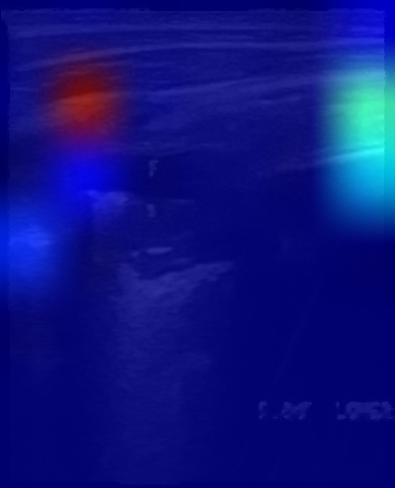

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff38.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([4.5811794e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([4.5811794e-06], shape=(1,), dtype=float32)


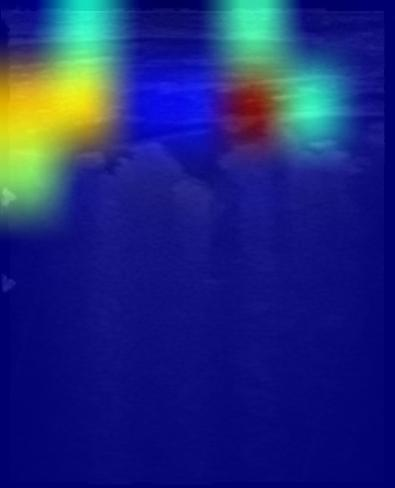

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff40.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.1518684e-09], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.1518684e-09], shape=(1,), dtype=float32)


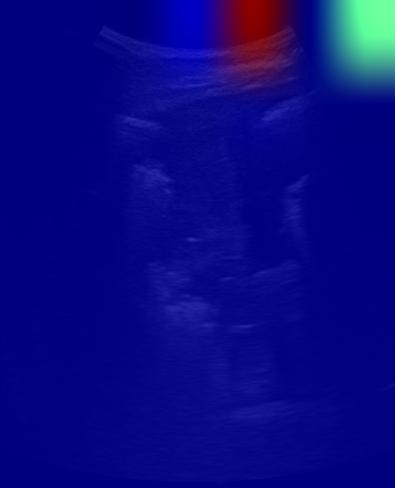

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff10.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.1015433e-07], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.1015433e-07], shape=(1,), dtype=float32)


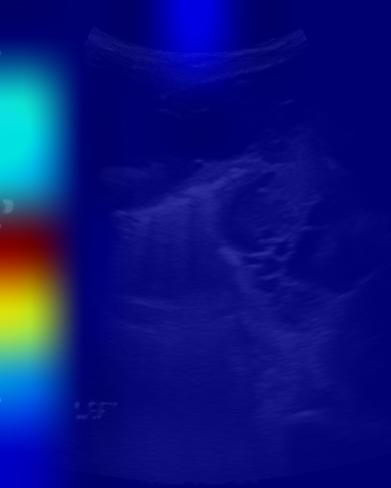

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif67.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00061575], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00061575], shape=(1,), dtype=float32)


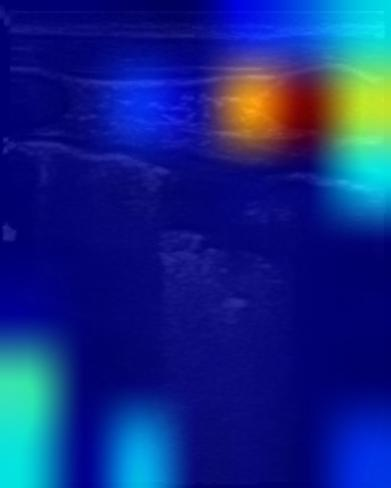

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff105.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([4.8641926e-09], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([4.8641926e-09], shape=(1,), dtype=float32)


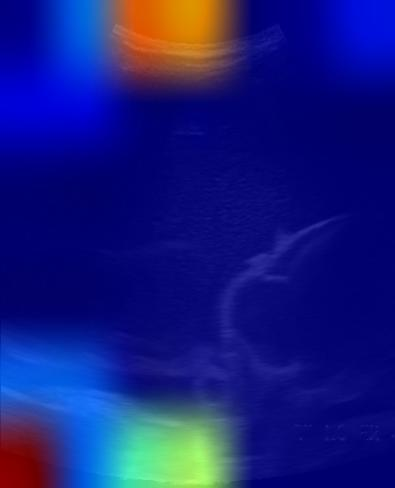

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif30.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.3057466e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.3057466e-05], shape=(1,), dtype=float32)


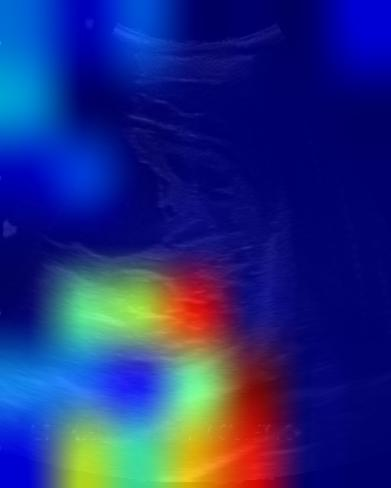

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff83.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.999892], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.999892], shape=(1,), dtype=float32)


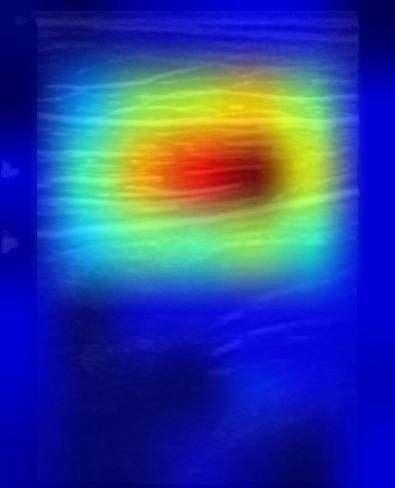

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif46.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([5.4256616e-10], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([5.4256616e-10], shape=(1,), dtype=float32)


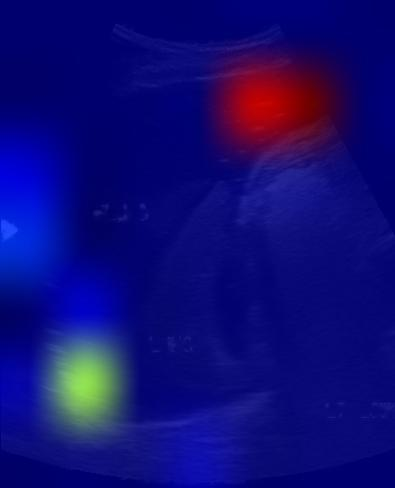

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif16.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([3.791549e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([3.791549e-05], shape=(1,), dtype=float32)


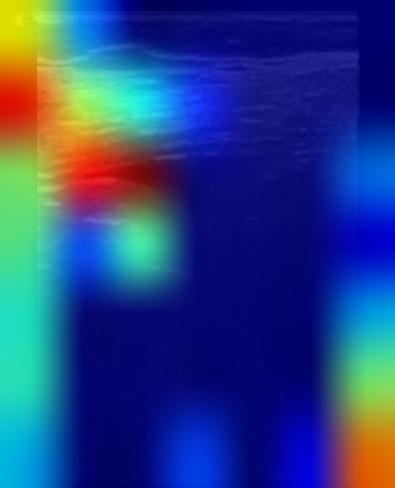

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff6.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([7.4278836e-07], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([7.4278836e-07], shape=(1,), dtype=float32)


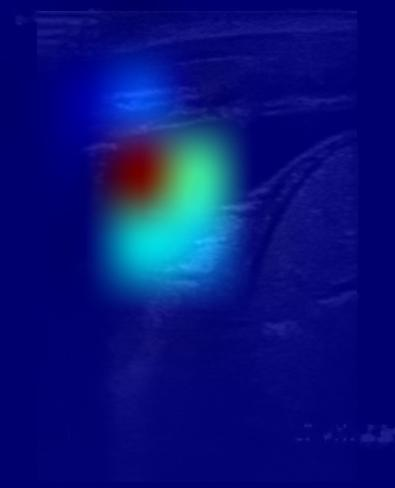

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff26.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00103087], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00103087], shape=(1,), dtype=float32)


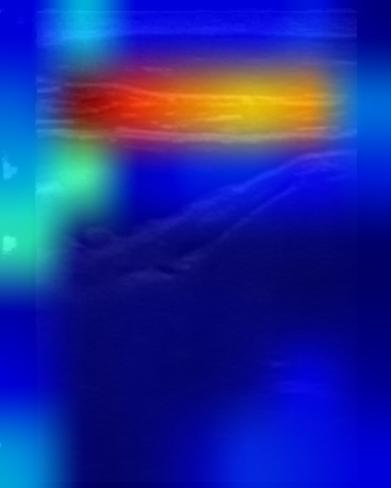

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff29.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.5387881e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.5387881e-05], shape=(1,), dtype=float32)


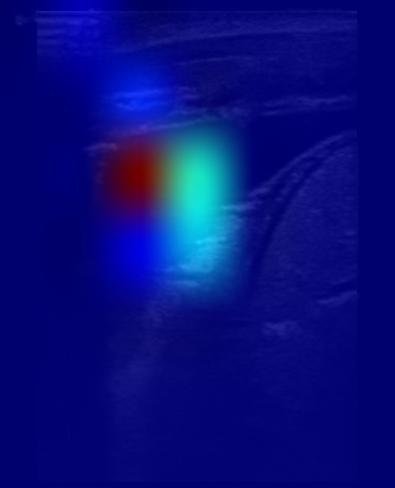

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff24.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00057776], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00057776], shape=(1,), dtype=float32)


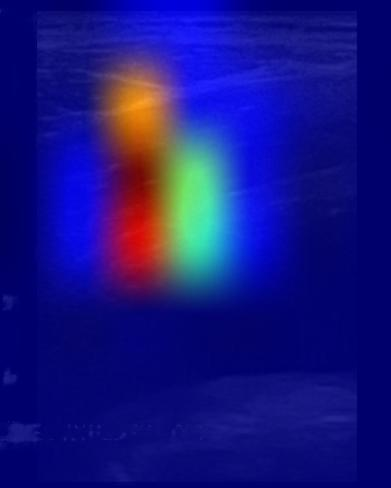

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif107.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([9.946234e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([9.946234e-06], shape=(1,), dtype=float32)


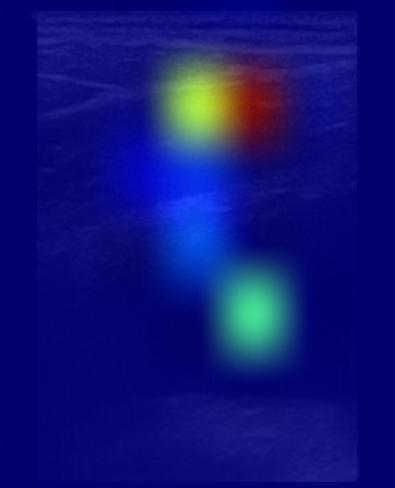

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif108.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00019816], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00019816], shape=(1,), dtype=float32)


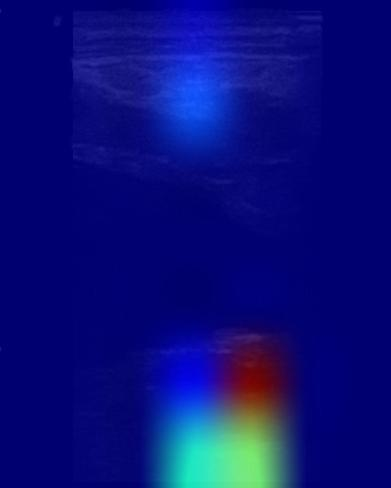

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif81.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([5.179731e-10], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([5.179731e-10], shape=(1,), dtype=float32)


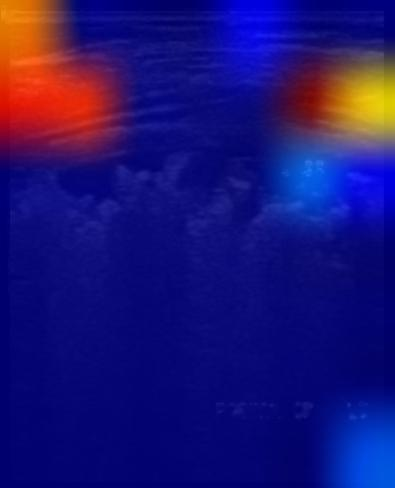

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif88.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([8.17825e-08], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([8.17825e-08], shape=(1,), dtype=float32)


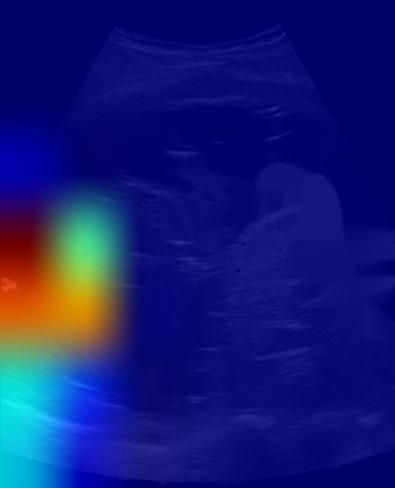

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif78.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00051868], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00051868], shape=(1,), dtype=float32)


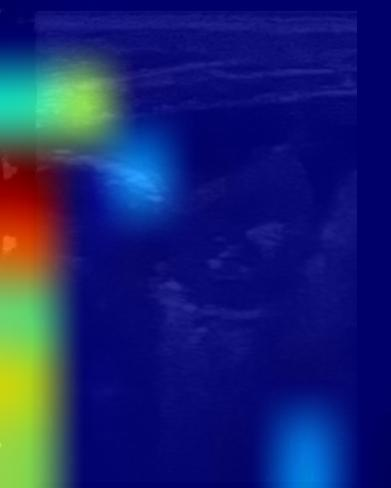

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff71.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.02751722], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.02751722], shape=(1,), dtype=float32)


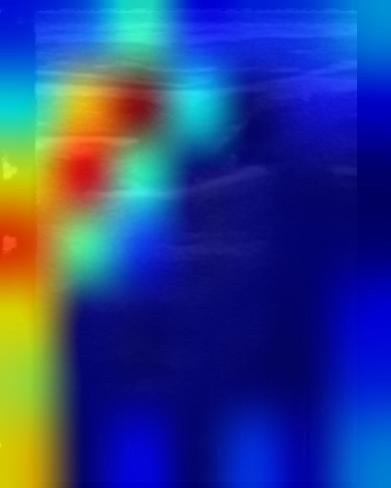

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff65.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.0530798e-08], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.0530798e-08], shape=(1,), dtype=float32)


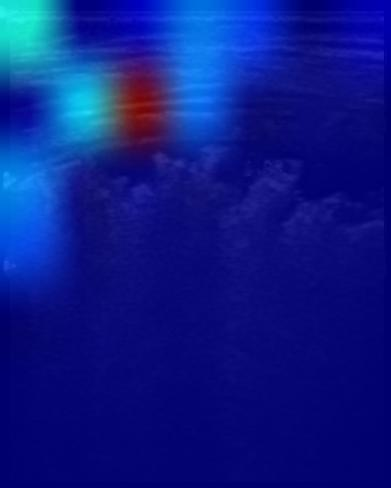

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif89.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.2179242e-10], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.2179242e-10], shape=(1,), dtype=float32)


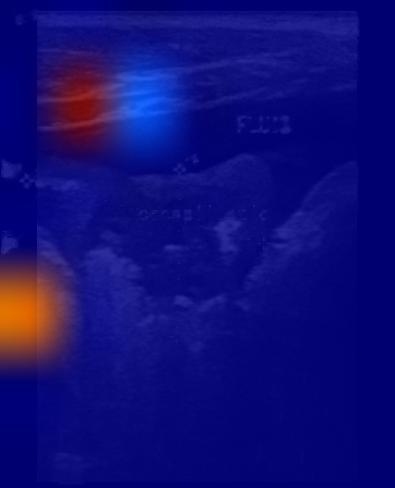

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff68.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.3330265e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.3330265e-06], shape=(1,), dtype=float32)


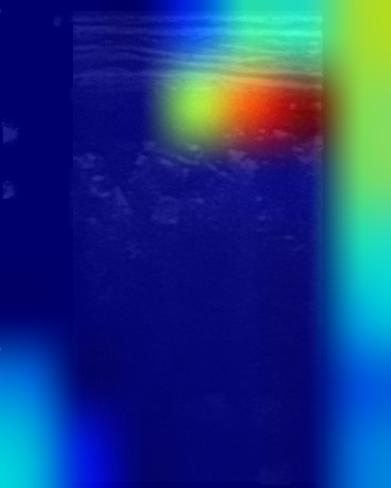

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff15.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00034696], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00034696], shape=(1,), dtype=float32)


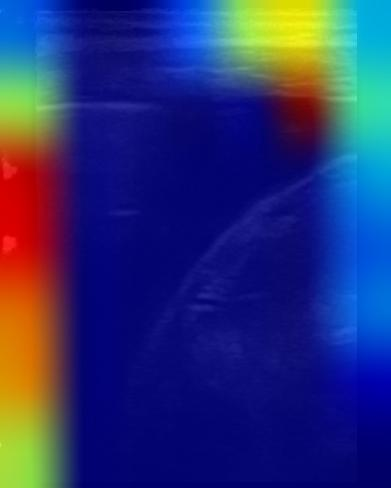

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif25.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.0435945e-07], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.0435945e-07], shape=(1,), dtype=float32)


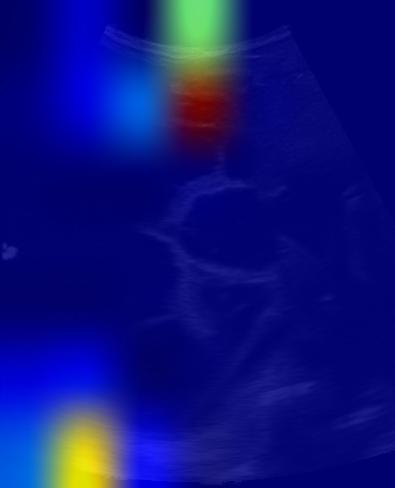

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif38.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00099562], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00099562], shape=(1,), dtype=float32)


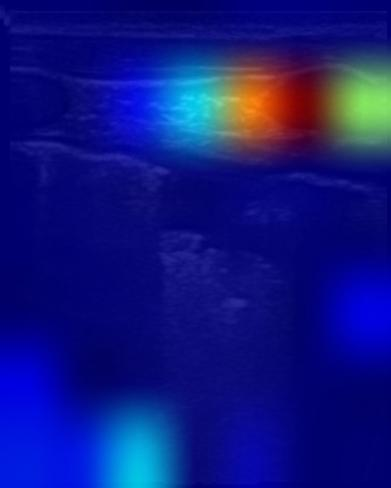

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff109.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00015188], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00015188], shape=(1,), dtype=float32)


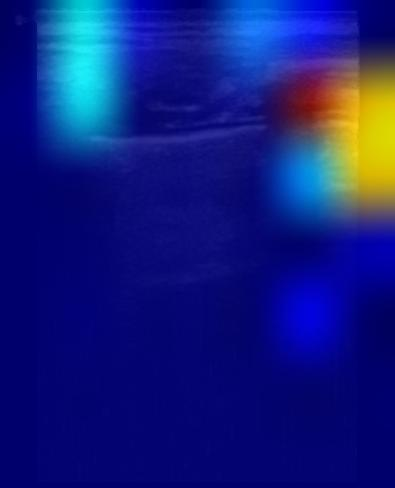

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff50.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([3.848384e-07], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([3.848384e-07], shape=(1,), dtype=float32)


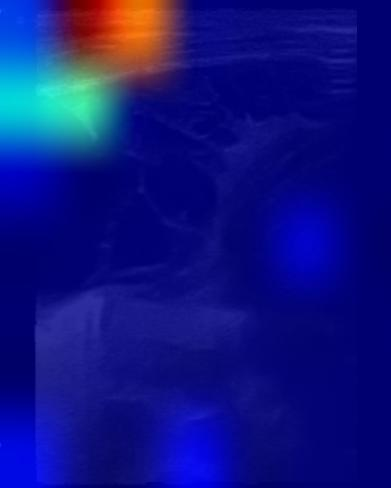

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif69.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([4.2103147e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([4.2103147e-05], shape=(1,), dtype=float32)


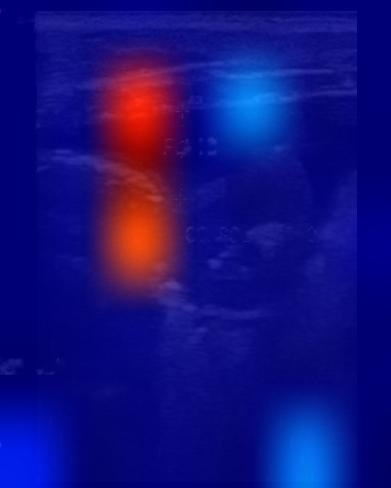

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff73.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([7.239249e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([7.239249e-05], shape=(1,), dtype=float32)


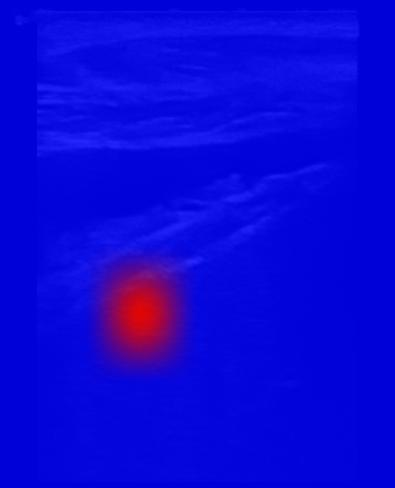

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff28.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.01136837], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.01136837], shape=(1,), dtype=float32)


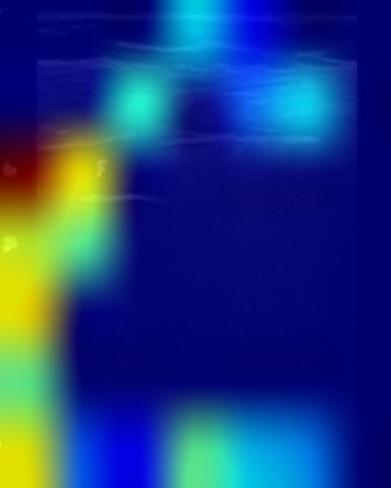

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff5.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.9672214e-08], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.9672214e-08], shape=(1,), dtype=float32)


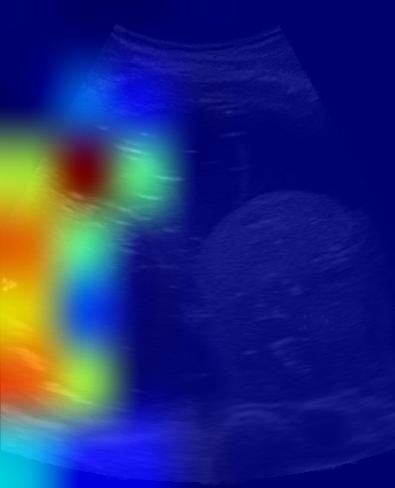

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif74.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.1226717e-15], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.1226717e-15], shape=(1,), dtype=float32)


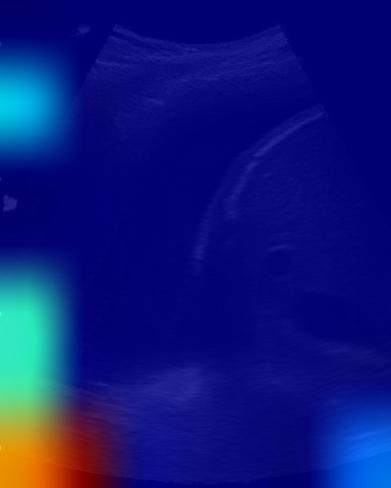

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff89.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([3.2663131e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([3.2663131e-06], shape=(1,), dtype=float32)


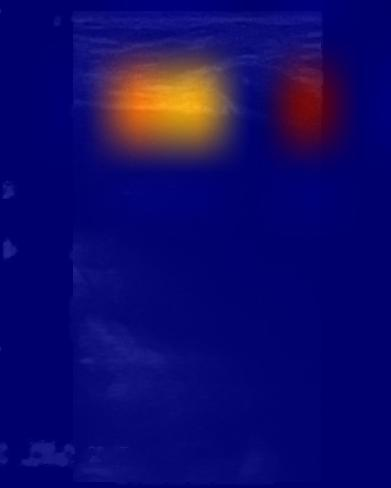

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif19.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00015188], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00015188], shape=(1,), dtype=float32)


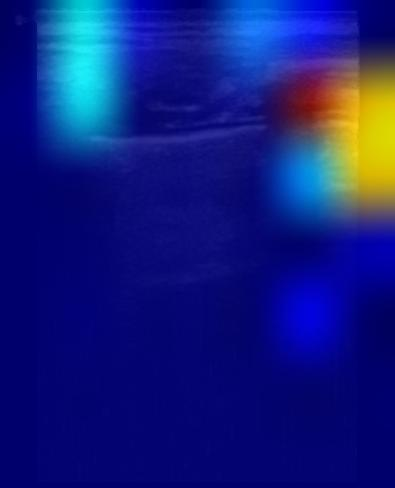

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff46.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00492275], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00492275], shape=(1,), dtype=float32)


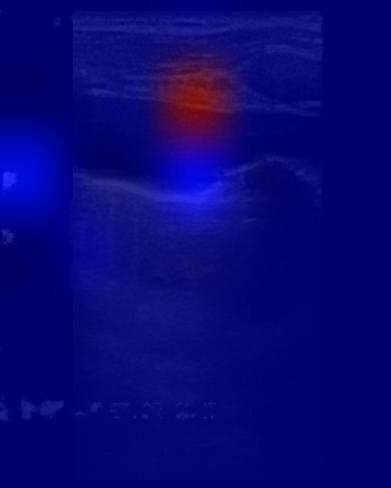

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff9.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00025325], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00025325], shape=(1,), dtype=float32)


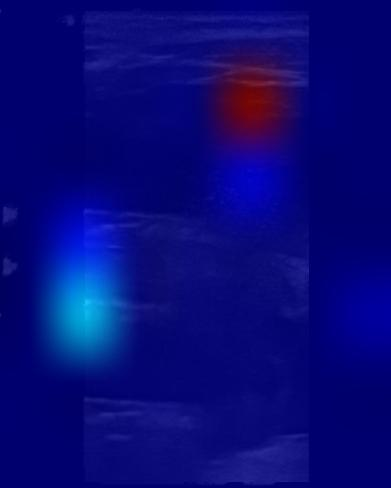

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif29.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00064226], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00064226], shape=(1,), dtype=float32)


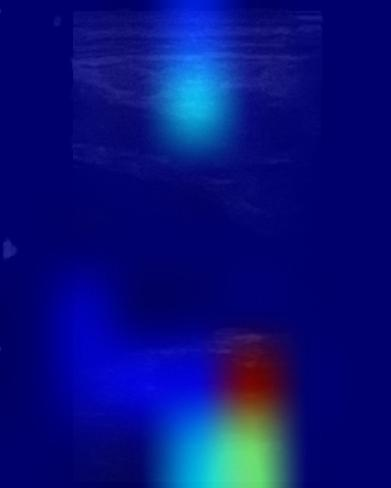

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif73.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([3.8972797e-08], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([3.8972797e-08], shape=(1,), dtype=float32)


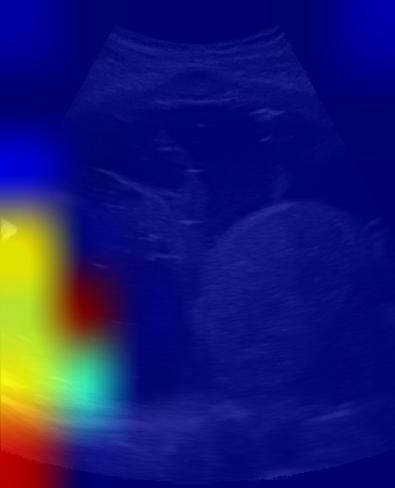

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif80.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([3.6148779e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([3.6148779e-06], shape=(1,), dtype=float32)


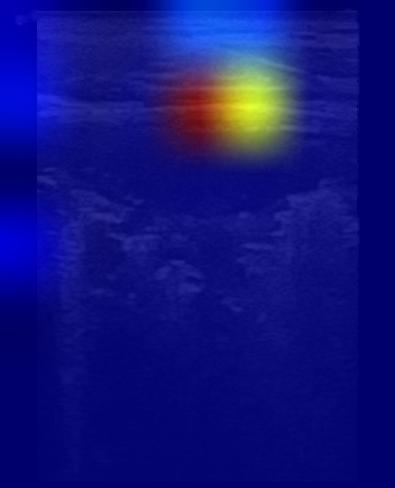

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff14.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([3.848384e-07], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([3.848384e-07], shape=(1,), dtype=float32)


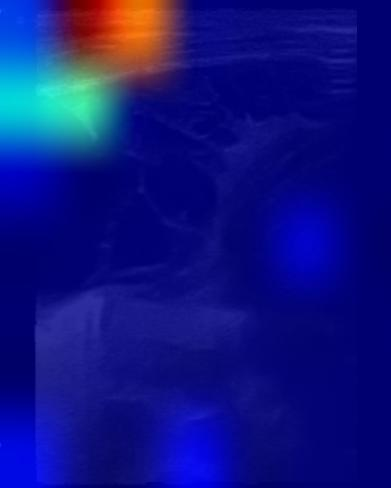

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif59.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00123439], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00123439], shape=(1,), dtype=float32)


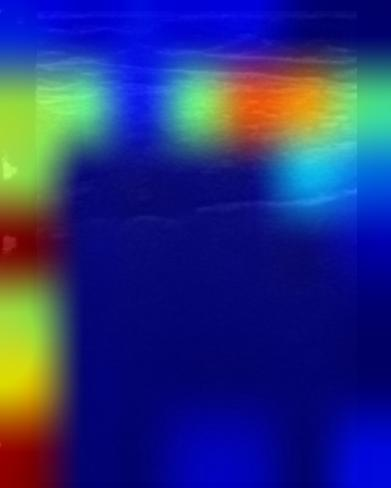

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff7.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00011122], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00011122], shape=(1,), dtype=float32)


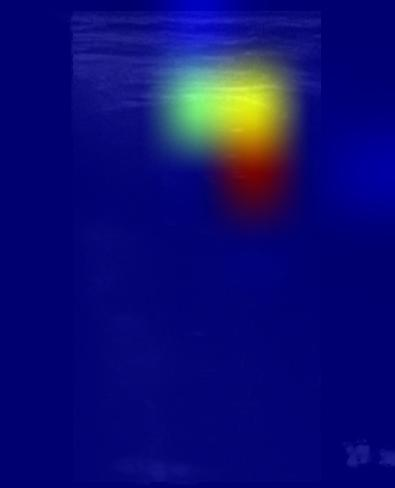

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif18.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([7.657767e-08], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([7.657767e-08], shape=(1,), dtype=float32)


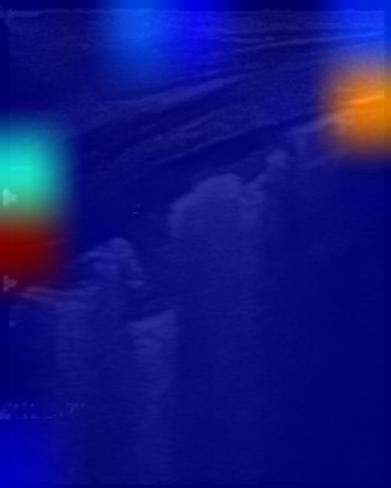

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff39.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00228992], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00228992], shape=(1,), dtype=float32)


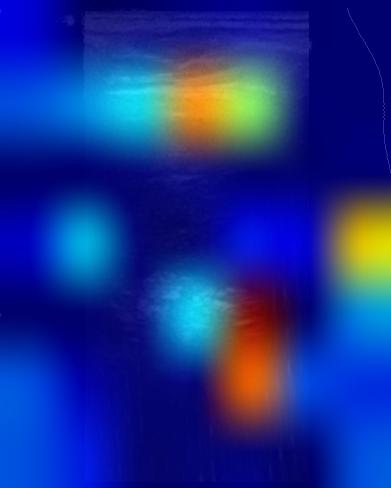

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif13.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.7864531e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.7864531e-05], shape=(1,), dtype=float32)


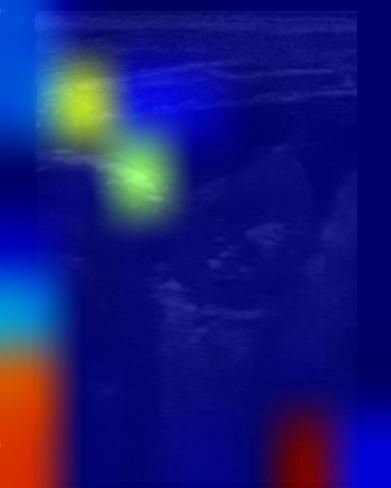

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff67.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.059345e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.059345e-06], shape=(1,), dtype=float32)


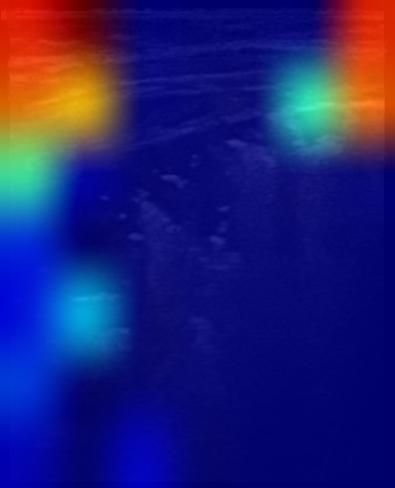

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif84.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00048657], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00048657], shape=(1,), dtype=float32)


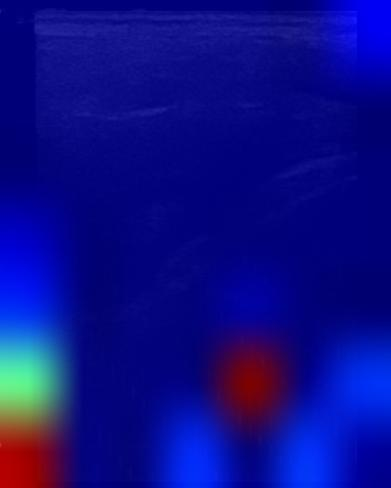

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif95.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.684561e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.684561e-05], shape=(1,), dtype=float32)


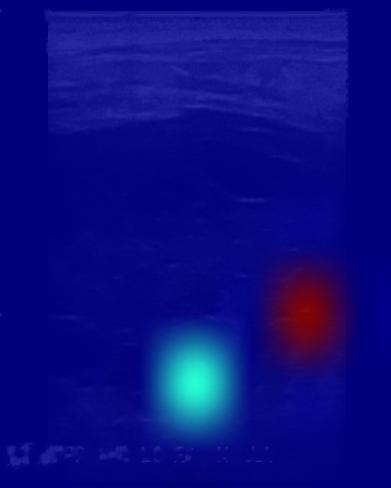

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff75.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.0812381e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.0812381e-05], shape=(1,), dtype=float32)


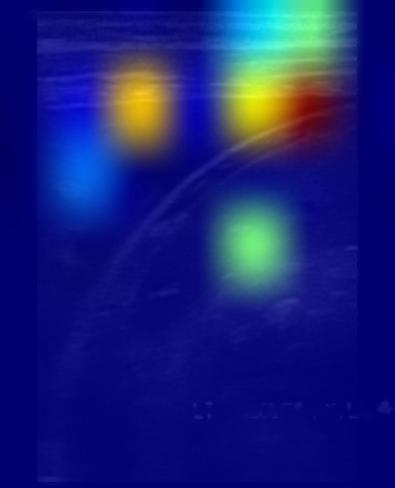

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif34.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([9.946234e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([9.946234e-06], shape=(1,), dtype=float32)


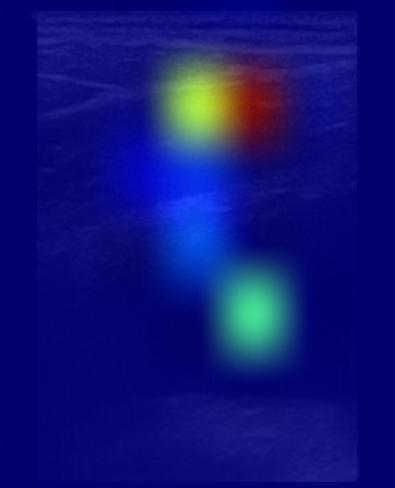

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif106.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.1631946e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.1631946e-05], shape=(1,), dtype=float32)


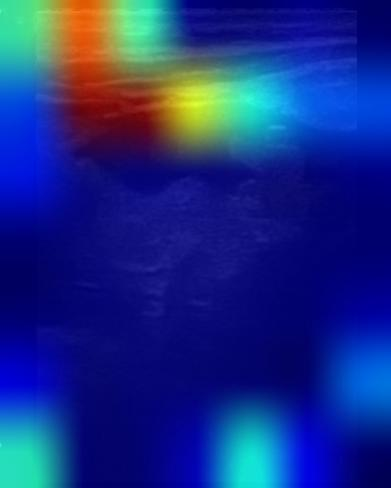

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif23.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00015188], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00015188], shape=(1,), dtype=float32)


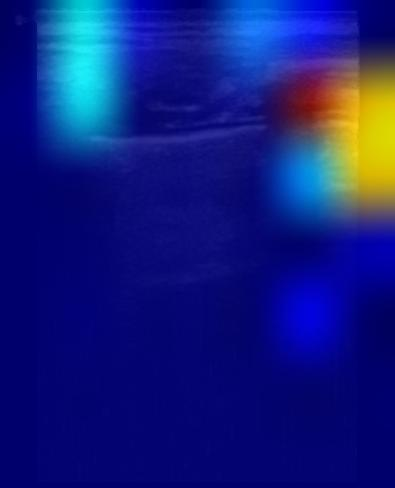

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff58.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00831662], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00831662], shape=(1,), dtype=float32)


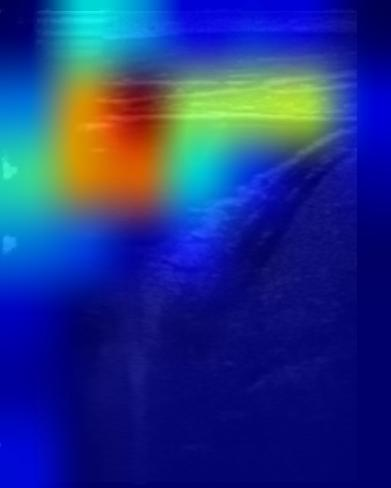

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff25.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([9.1708185e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([9.1708185e-05], shape=(1,), dtype=float32)


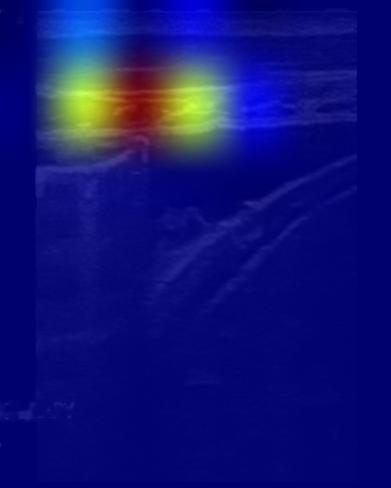

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff31.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([5.79687e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([5.79687e-05], shape=(1,), dtype=float32)


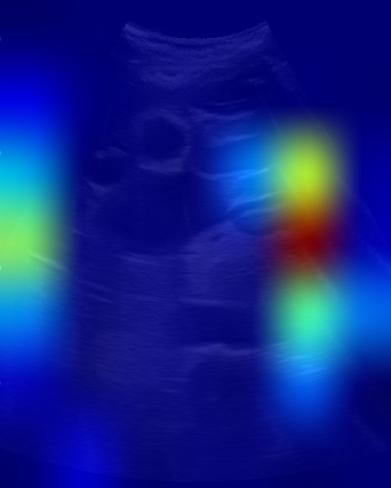

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff79.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([3.848384e-07], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([3.848384e-07], shape=(1,), dtype=float32)


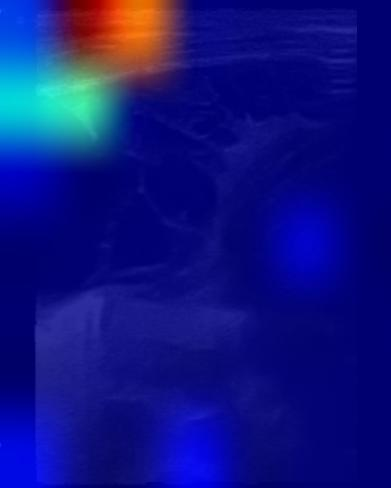

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif63.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00210592], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00210592], shape=(1,), dtype=float32)


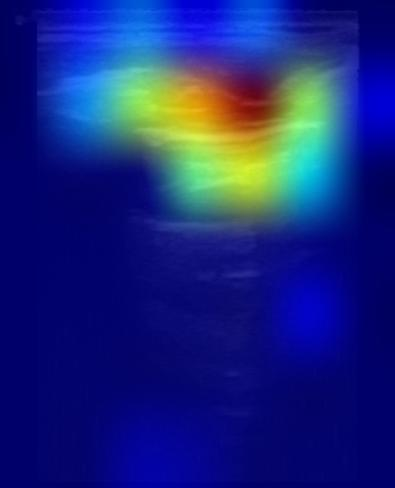

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff64.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00048454], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00048454], shape=(1,), dtype=float32)


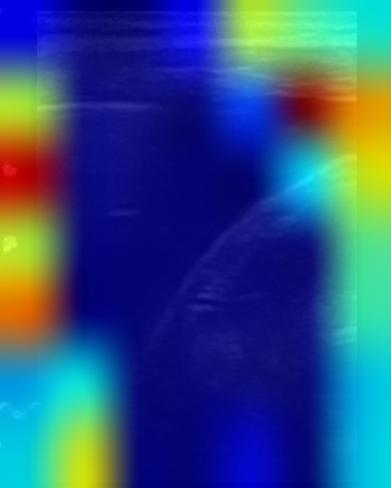

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif35.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00030173], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00030173], shape=(1,), dtype=float32)


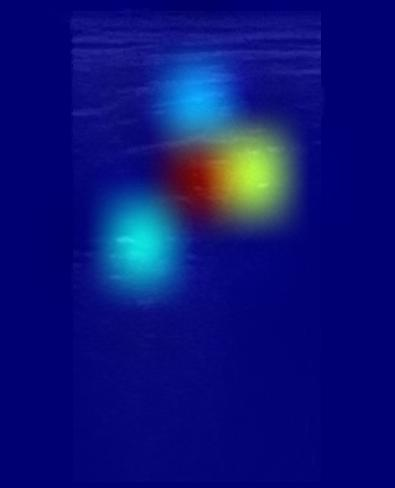

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff16.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.8609376e-07], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.8609376e-07], shape=(1,), dtype=float32)


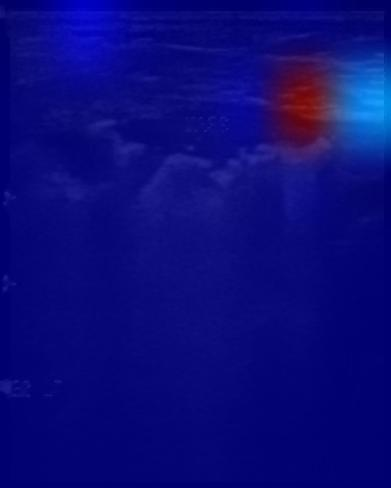

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif83.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00022973], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00022973], shape=(1,), dtype=float32)


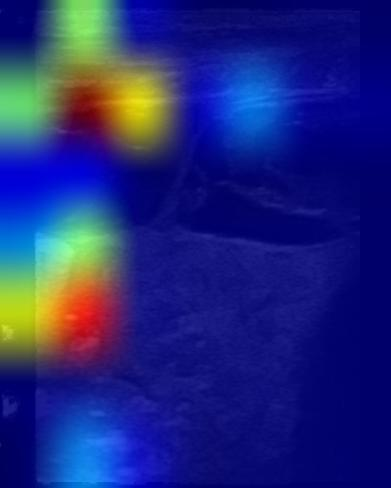

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif65.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00013003], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00013003], shape=(1,), dtype=float32)


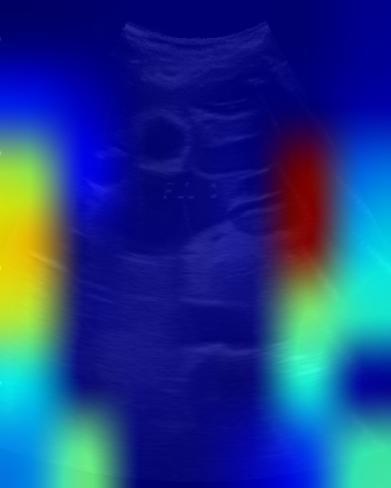

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff81.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.05419127], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.05419127], shape=(1,), dtype=float32)


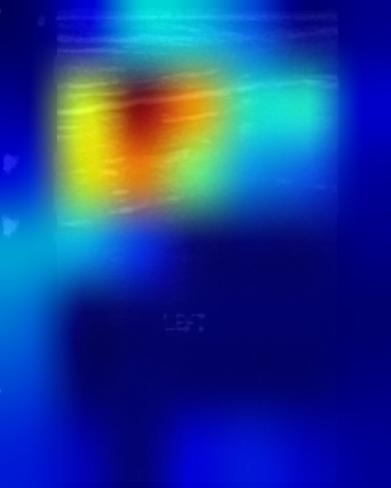

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff103.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00067534], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00067534], shape=(1,), dtype=float32)


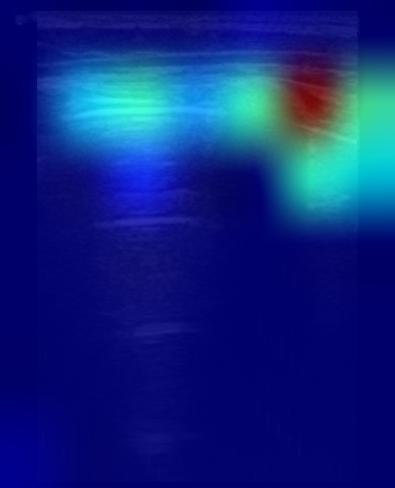

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif90.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([9.749439e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([9.749439e-06], shape=(1,), dtype=float32)


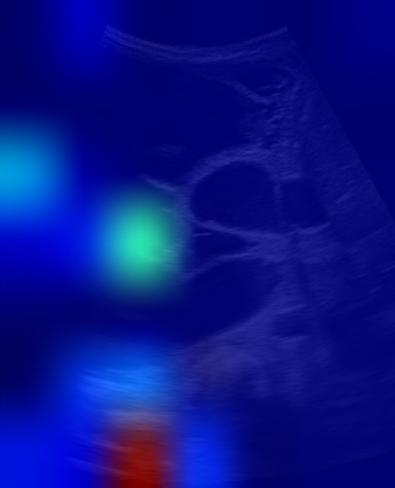

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif42.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.3482036e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.3482036e-05], shape=(1,), dtype=float32)


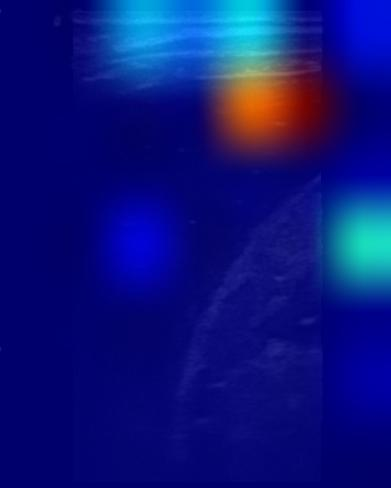

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif21.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.5757856e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.5757856e-06], shape=(1,), dtype=float32)


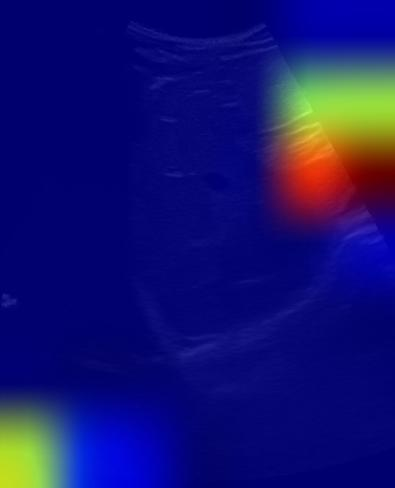

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff56.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([3.6442518e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([3.6442518e-05], shape=(1,), dtype=float32)


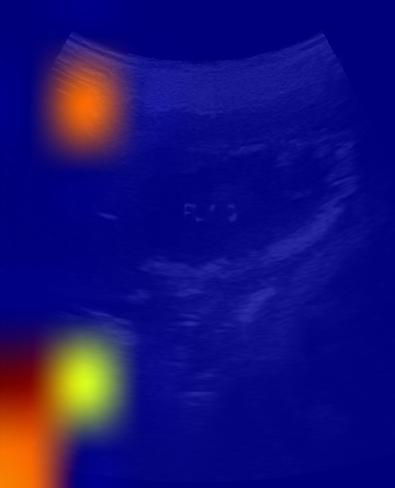

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif96.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.8014435e-10], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.8014435e-10], shape=(1,), dtype=float32)


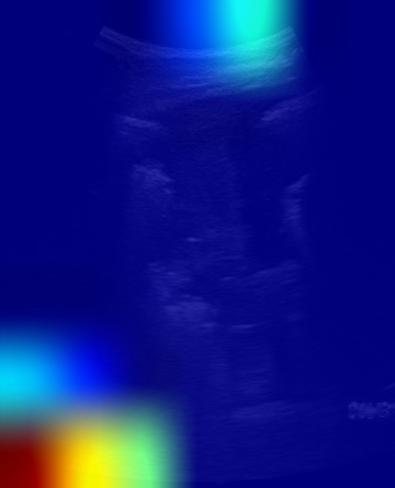

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff12.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9899048], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9899048], shape=(1,), dtype=float32)


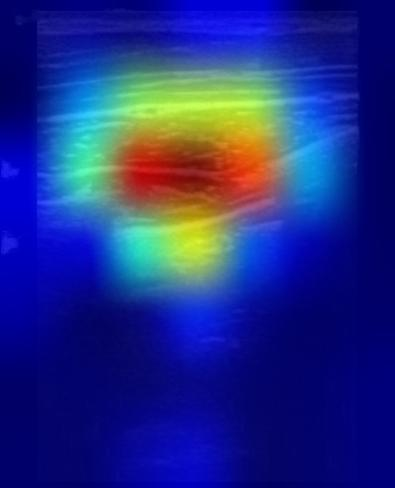

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif50.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.133497e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.133497e-05], shape=(1,), dtype=float32)


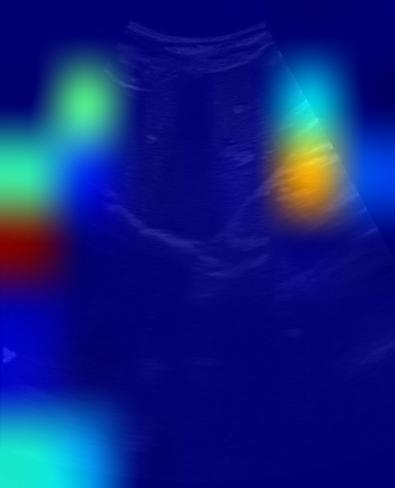

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff60.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.4125374e-09], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.4125374e-09], shape=(1,), dtype=float32)


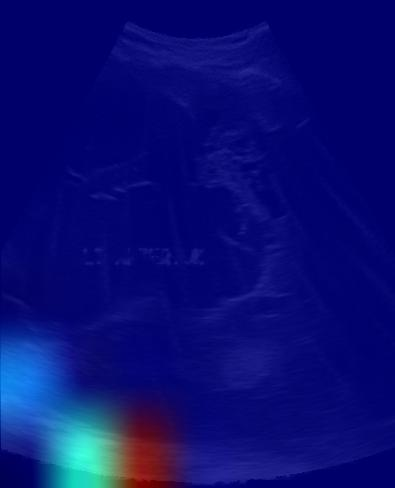

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff84.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00024587], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00024587], shape=(1,), dtype=float32)


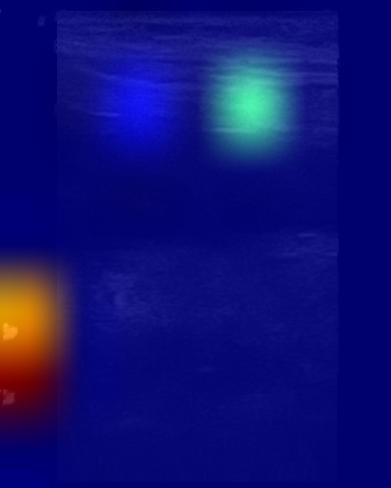

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff99.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9990882], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9990882], shape=(1,), dtype=float32)


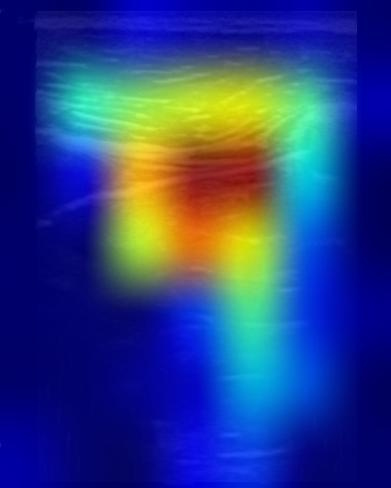

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif51.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00030392], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00030392], shape=(1,), dtype=float32)


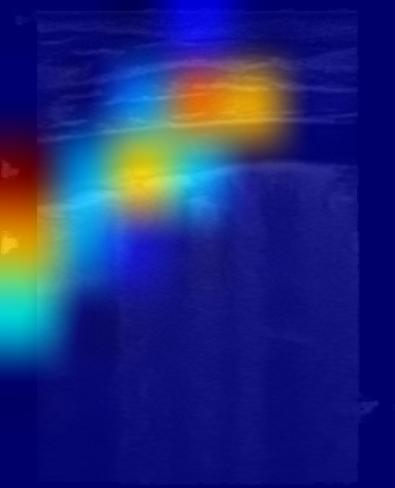

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff30.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9990882], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9990882], shape=(1,), dtype=float32)


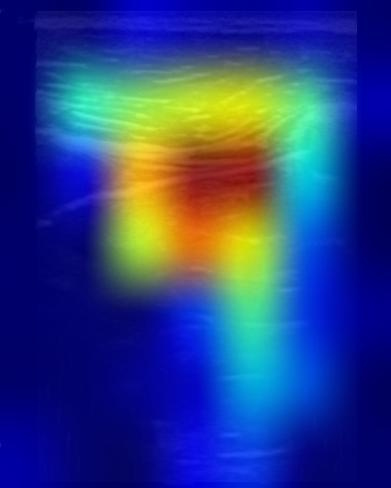

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif47.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.0267548e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.0267548e-06], shape=(1,), dtype=float32)


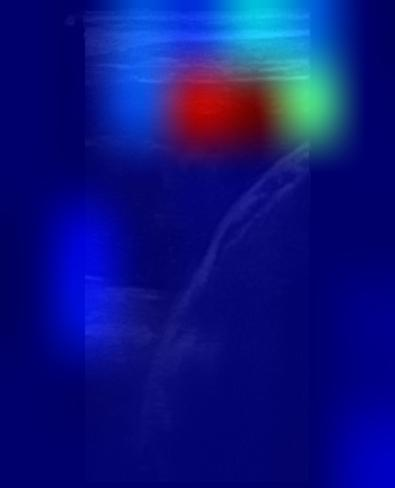

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif28.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([9.920741e-16], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([9.920741e-16], shape=(1,), dtype=float32)


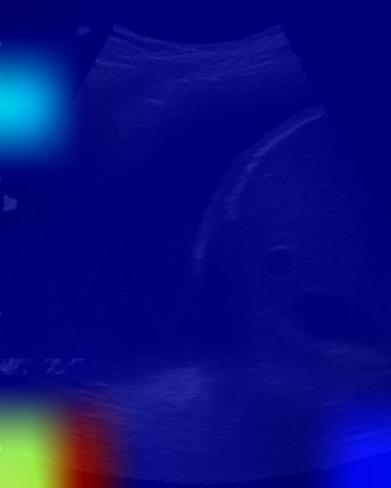

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff101.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9990882], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9990882], shape=(1,), dtype=float32)


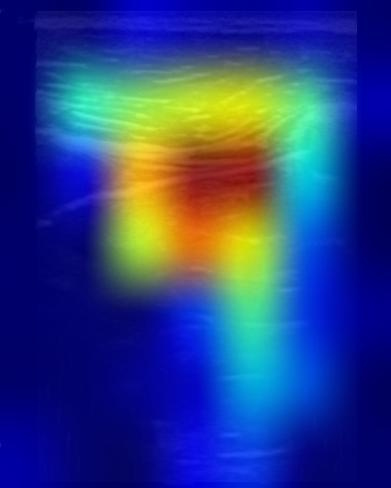

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif49.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.0090904], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.0090904], shape=(1,), dtype=float32)


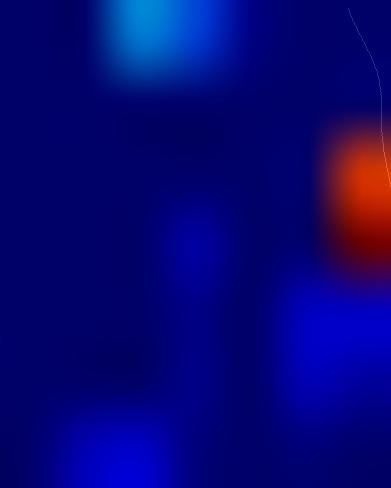

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff61.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.02244902], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.02244902], shape=(1,), dtype=float32)


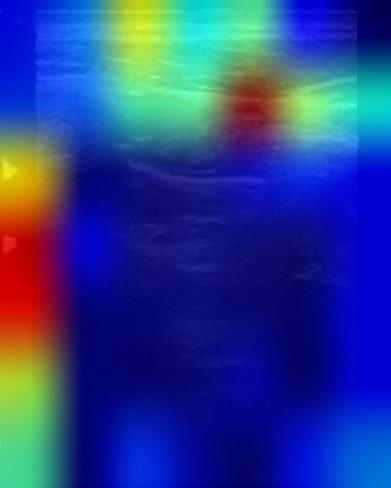

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff47.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([3.8950868e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([3.8950868e-05], shape=(1,), dtype=float32)


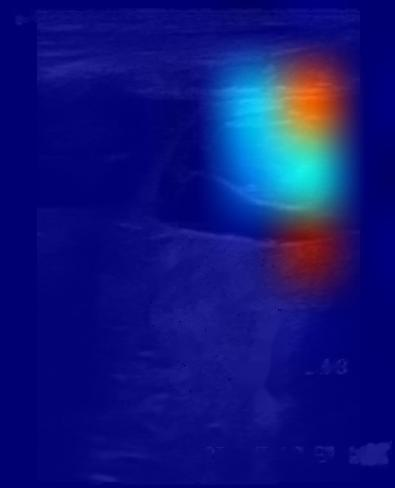

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif60.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00020096], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00020096], shape=(1,), dtype=float32)


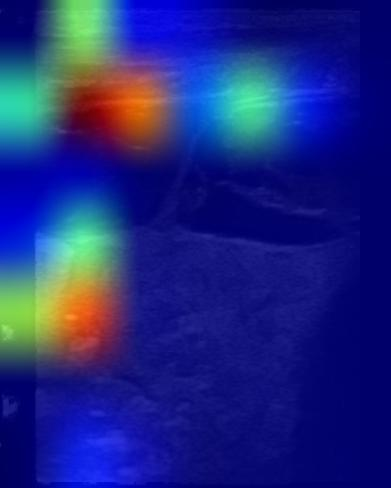

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif61.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00023908], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00023908], shape=(1,), dtype=float32)


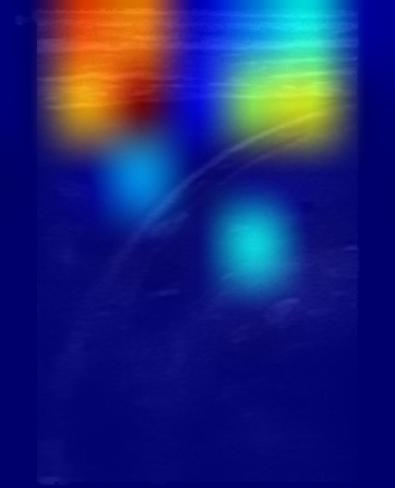

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif24.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([5.2903165e-08], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([5.2903165e-08], shape=(1,), dtype=float32)


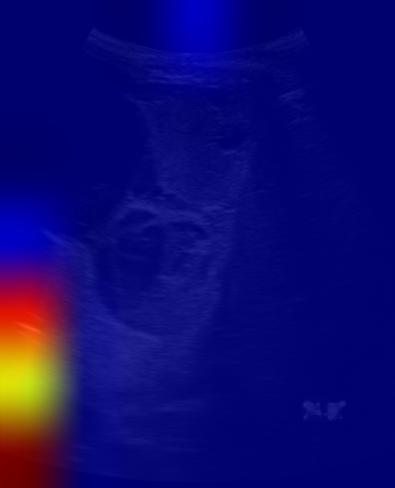

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif66.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([4.6266166e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([4.6266166e-05], shape=(1,), dtype=float32)


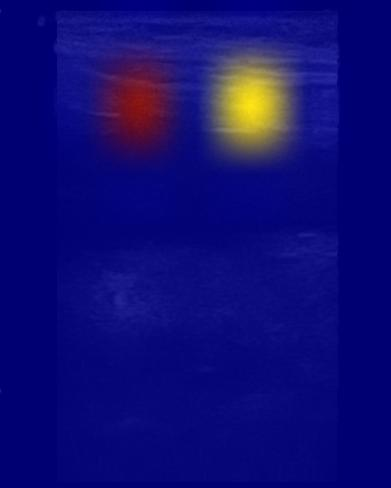

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff93.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00054896], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00054896], shape=(1,), dtype=float32)


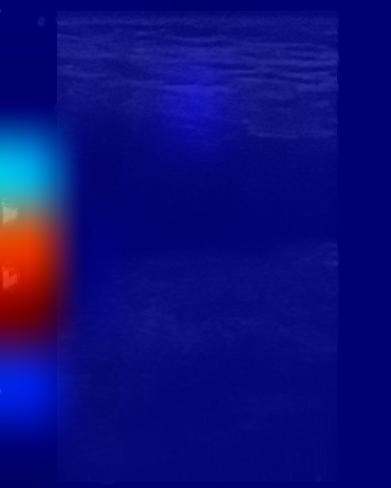

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff97.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.099241e-10], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.099241e-10], shape=(1,), dtype=float32)


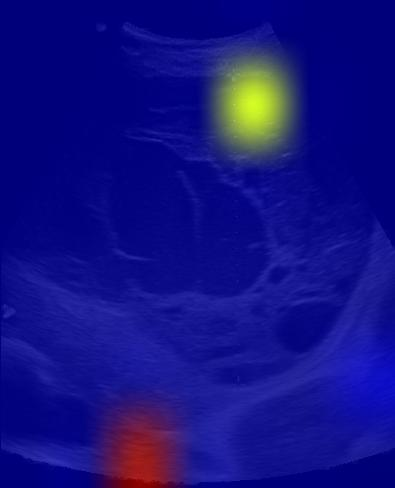

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff74.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.0655998e-10], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.0655998e-10], shape=(1,), dtype=float32)


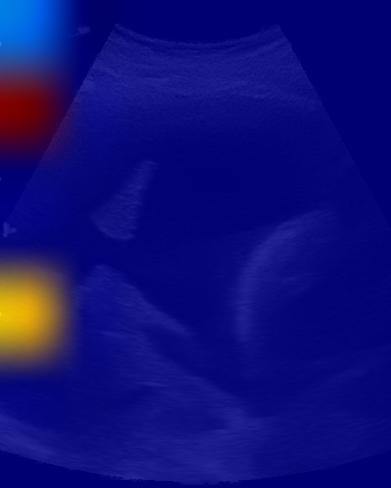

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif5.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([5.2011654e-07], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([5.2011654e-07], shape=(1,), dtype=float32)


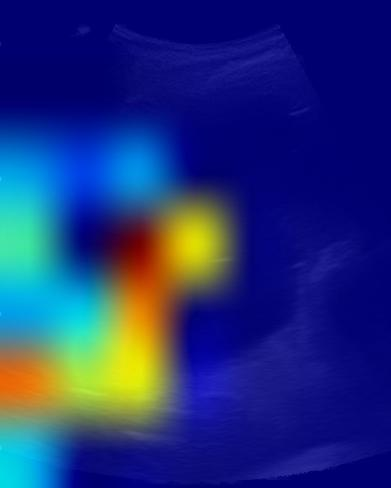

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff91.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.0002604], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.0002604], shape=(1,), dtype=float32)


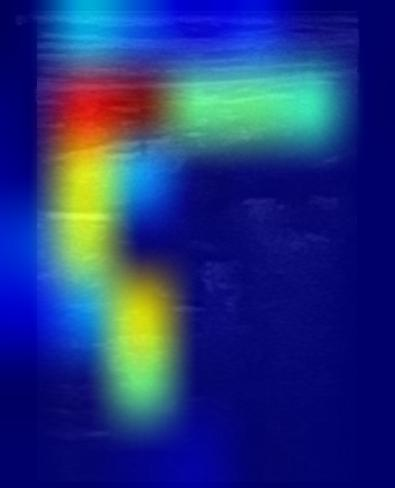

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff86.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00045163], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00045163], shape=(1,), dtype=float32)


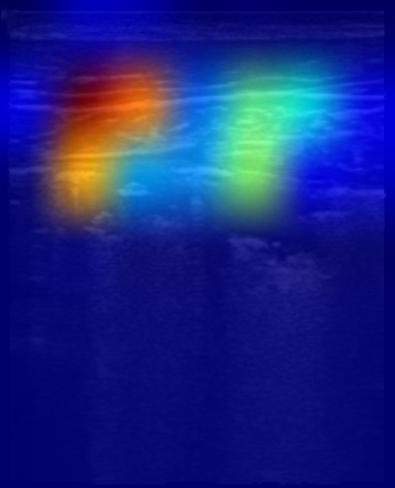

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff104.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00040934], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00040934], shape=(1,), dtype=float32)


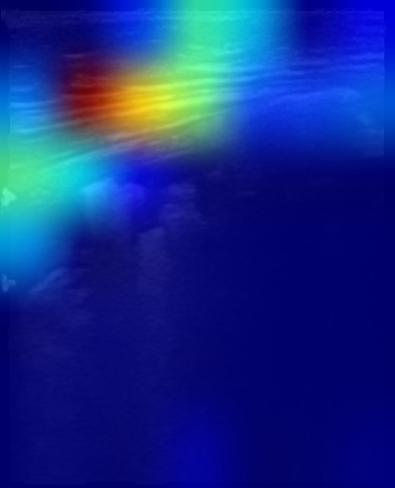

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif86.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00042092], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00042092], shape=(1,), dtype=float32)


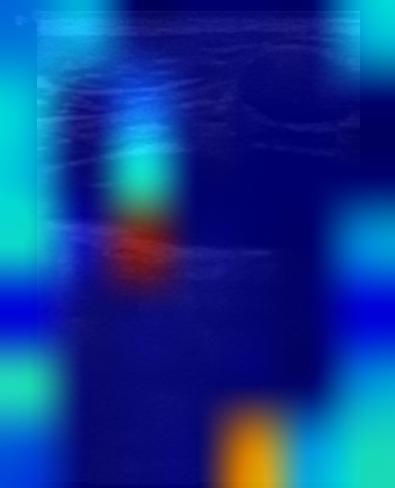

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff22.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00404588], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00404588], shape=(1,), dtype=float32)


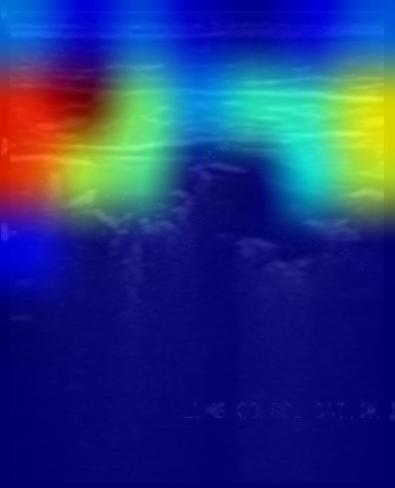

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff110.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([3.881227e-08], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([3.881227e-08], shape=(1,), dtype=float32)


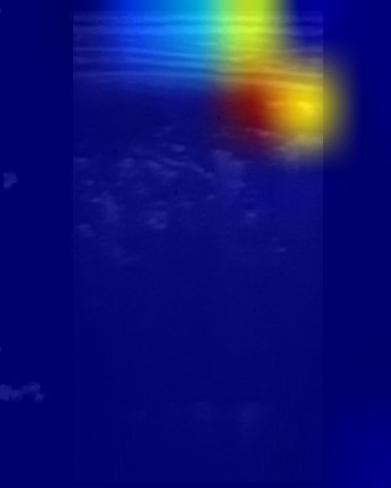

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff19.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.17196737], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.17196737], shape=(1,), dtype=float32)


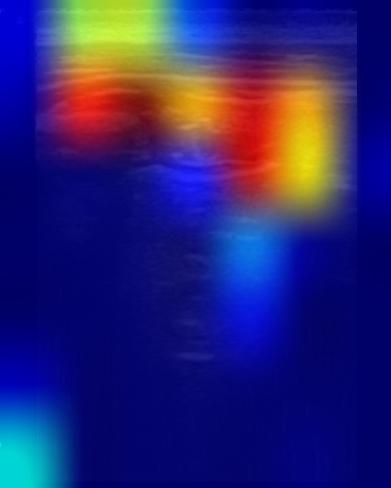

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff55.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.4472598e-07], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.4472598e-07], shape=(1,), dtype=float32)


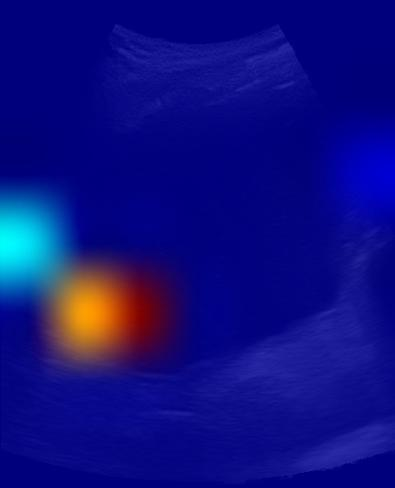

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff98.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.5094034e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.5094034e-06], shape=(1,), dtype=float32)


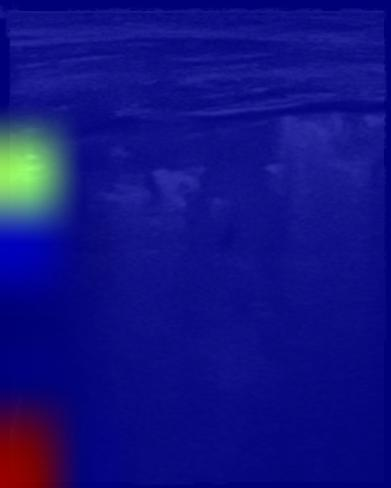

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff41.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00494116], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00494116], shape=(1,), dtype=float32)


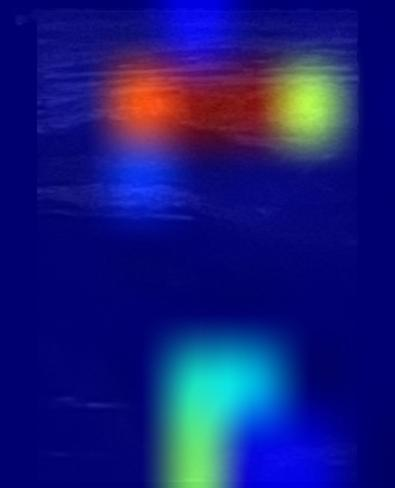

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif72.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00010259], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00010259], shape=(1,), dtype=float32)


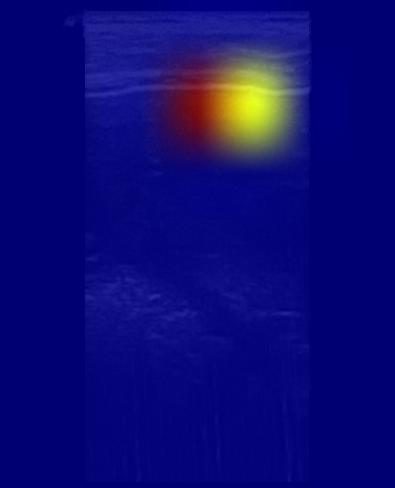

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif8.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([7.472071e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([7.472071e-05], shape=(1,), dtype=float32)


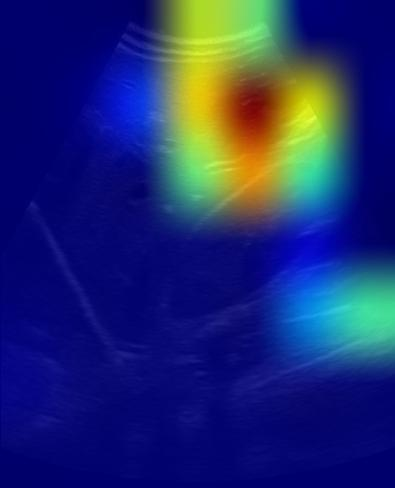

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff48.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.9616654e-07], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.9616654e-07], shape=(1,), dtype=float32)


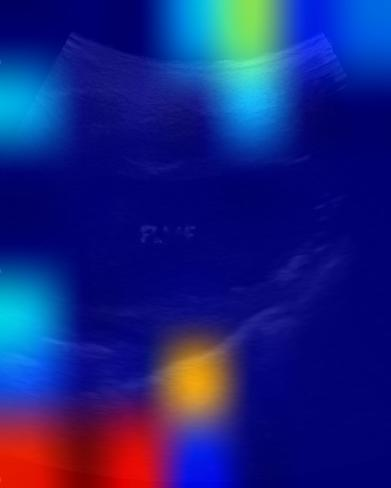

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif103.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00045911], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00045911], shape=(1,), dtype=float32)


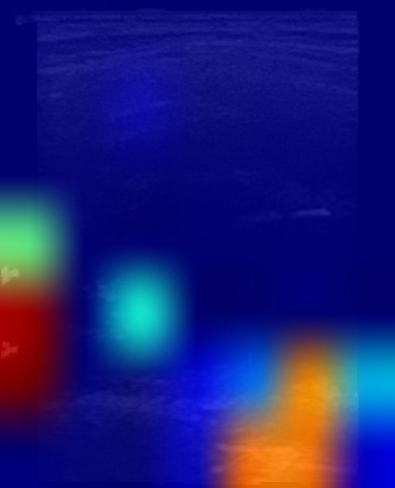

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif94.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.6364154e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.6364154e-05], shape=(1,), dtype=float32)


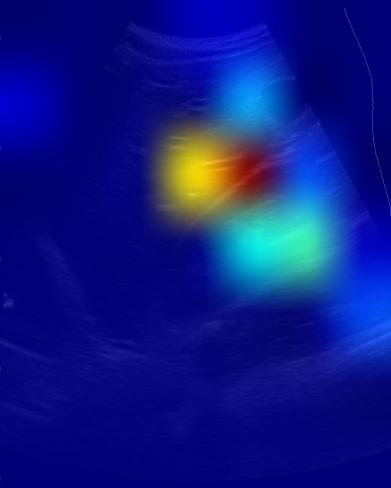

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff49.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.8105558e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.8105558e-06], shape=(1,), dtype=float32)


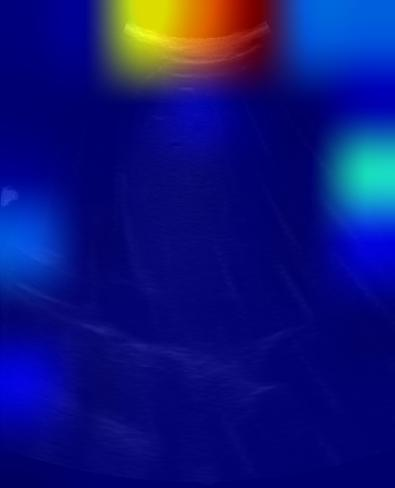

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff78.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.0010963], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.0010963], shape=(1,), dtype=float32)


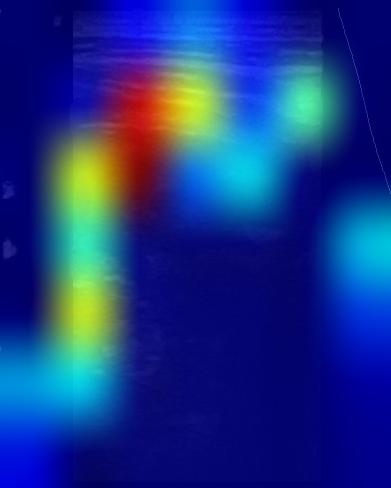

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff17.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9990882], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9990882], shape=(1,), dtype=float32)


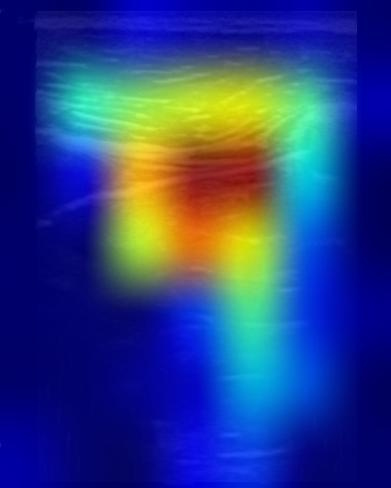

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif55.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([8.884581e-10], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([8.884581e-10], shape=(1,), dtype=float32)


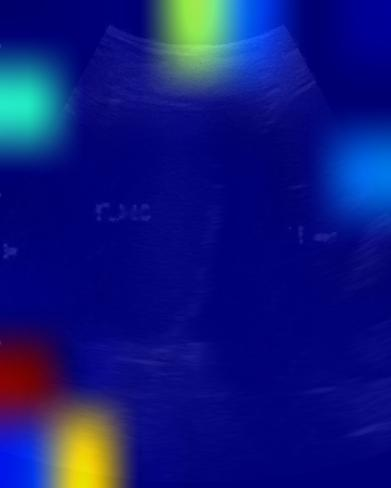

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif11.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.6226173e-07], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.6226173e-07], shape=(1,), dtype=float32)


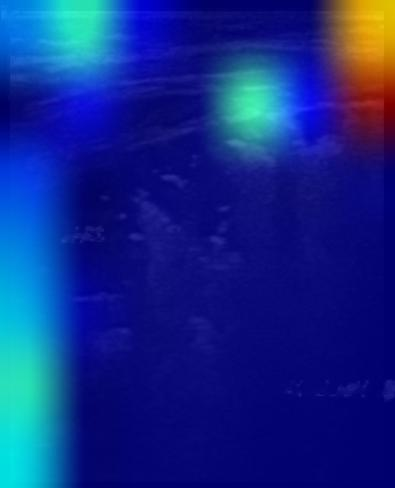

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif82.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00210592], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00210592], shape=(1,), dtype=float32)


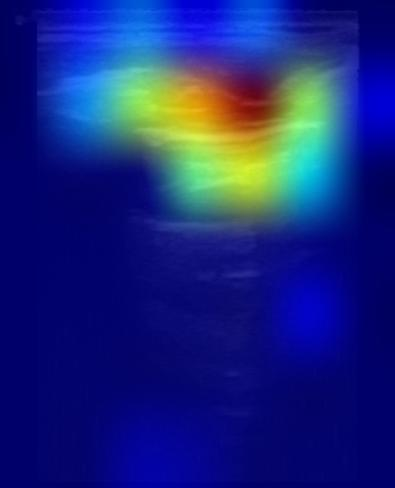

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff52.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.1612262e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.1612262e-06], shape=(1,), dtype=float32)


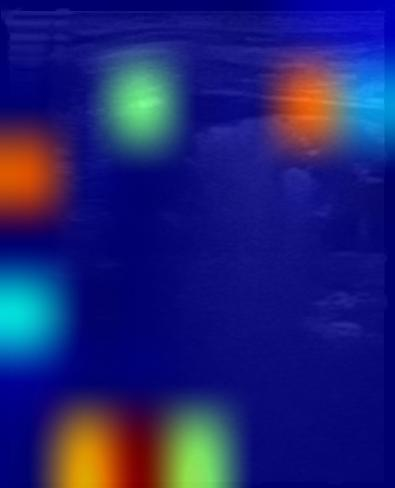

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff32.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.04714527], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.04714527], shape=(1,), dtype=float32)


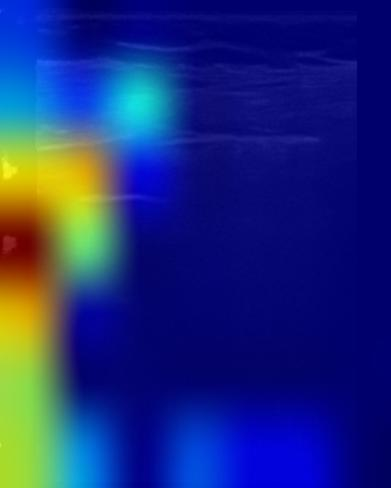

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff1.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00039768], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00039768], shape=(1,), dtype=float32)


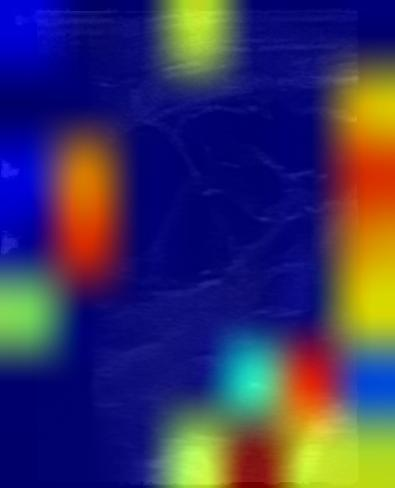

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif58.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00040307], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00040307], shape=(1,), dtype=float32)


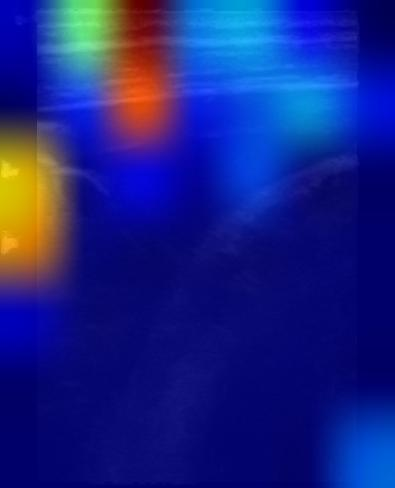

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif22.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.98172534], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.98172534], shape=(1,), dtype=float32)


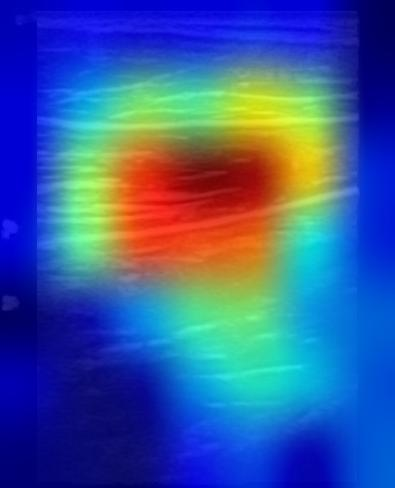

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif54.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.8622013e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.8622013e-05], shape=(1,), dtype=float32)


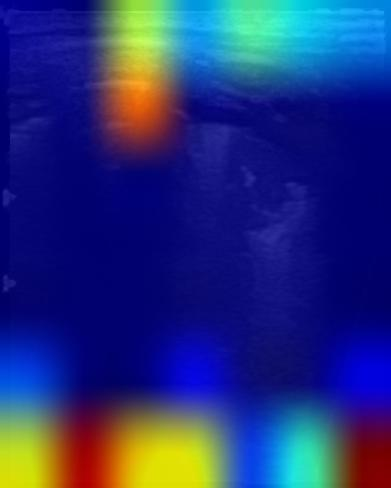

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff33.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([3.7091655e-10], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([3.7091655e-10], shape=(1,), dtype=float32)


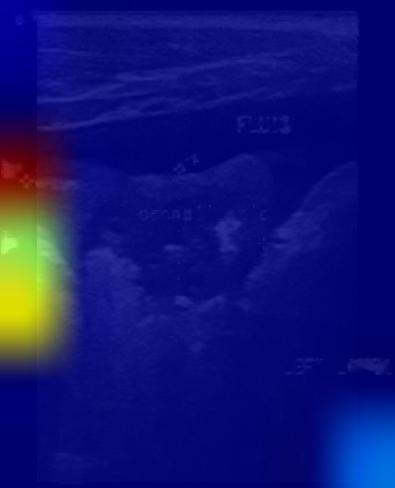

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff72.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.6081829e-12], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.6081829e-12], shape=(1,), dtype=float32)


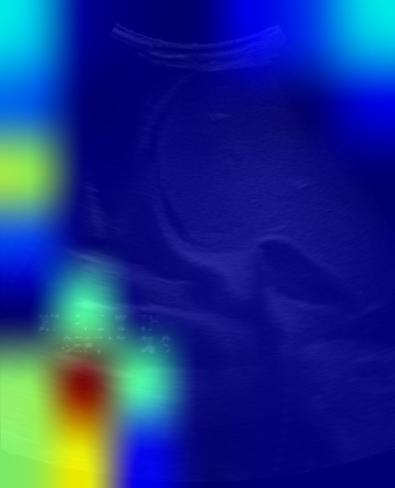

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff82.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([4.6266166e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([4.6266166e-05], shape=(1,), dtype=float32)


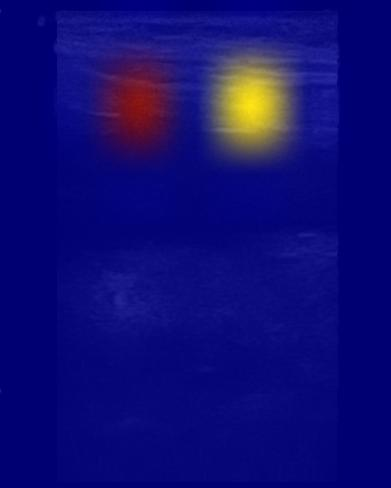

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff95.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.09891929], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.09891929], shape=(1,), dtype=float32)


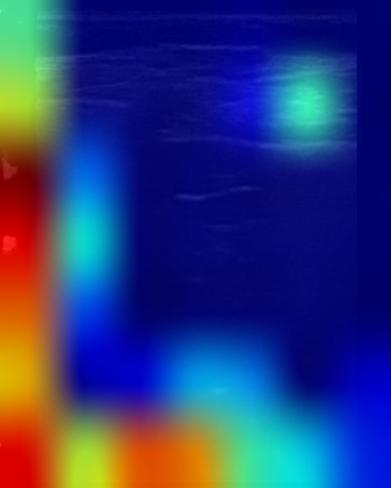

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff3.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([3.791549e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([3.791549e-05], shape=(1,), dtype=float32)


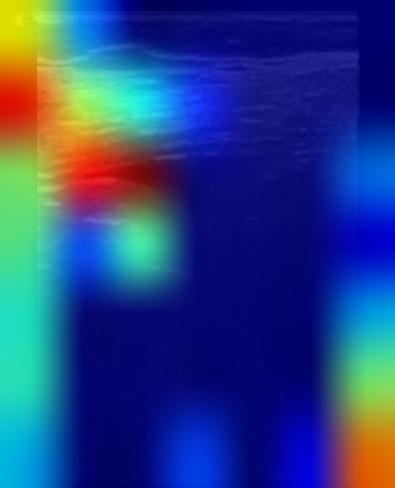

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff2.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([5.842325e-08], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([5.842325e-08], shape=(1,), dtype=float32)


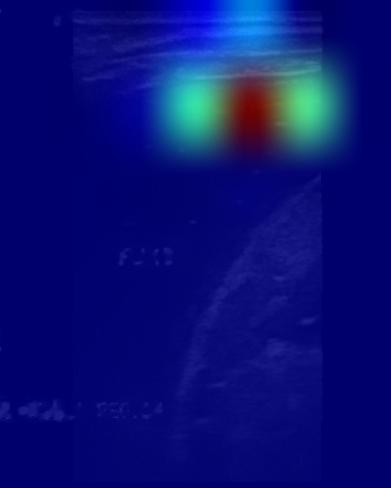

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif17.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.5648909e-09], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.5648909e-09], shape=(1,), dtype=float32)


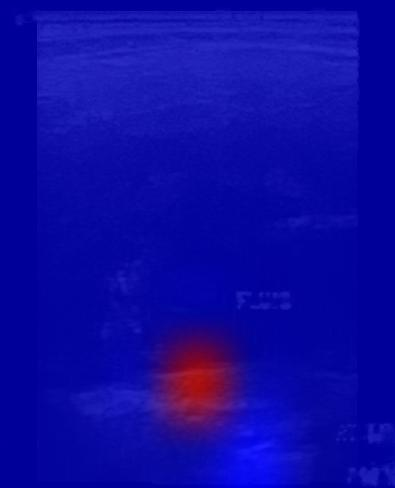

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif92.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.98172534], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.98172534], shape=(1,), dtype=float32)


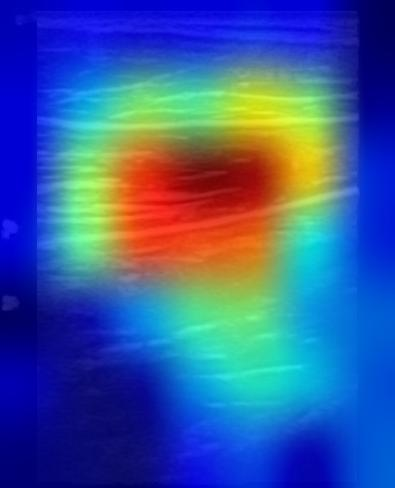

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif56.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.4076639e-09], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.4076639e-09], shape=(1,), dtype=float32)


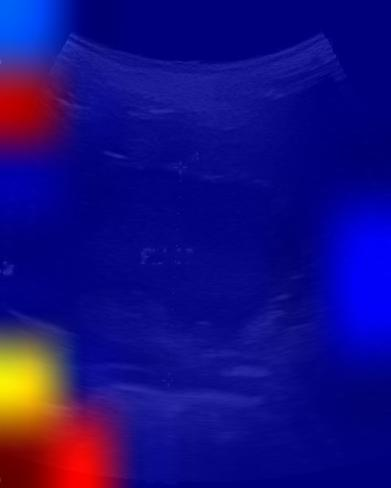

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif97.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.99160105], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.99160105], shape=(1,), dtype=float32)


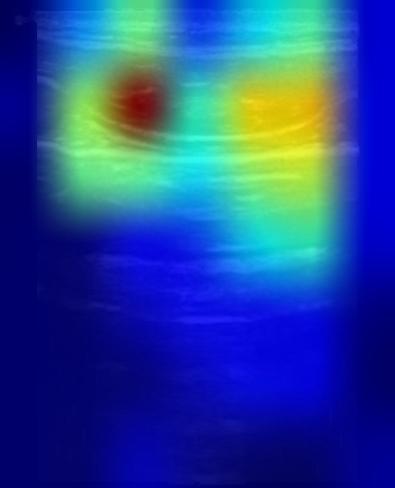

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif52.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([3.461329e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([3.461329e-06], shape=(1,), dtype=float32)


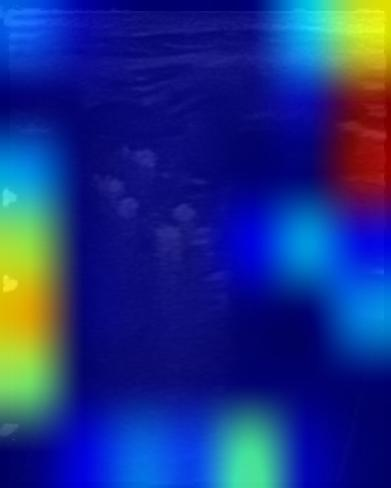

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff43.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([4.782613e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([4.782613e-06], shape=(1,), dtype=float32)


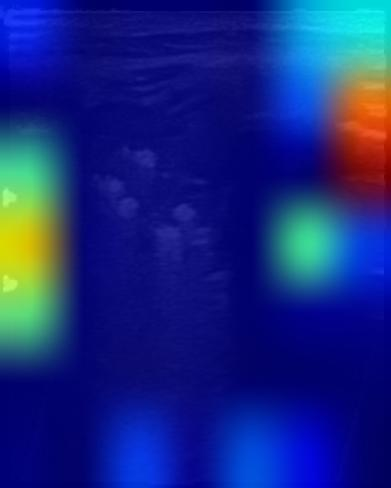

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff35.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00099562], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00099562], shape=(1,), dtype=float32)


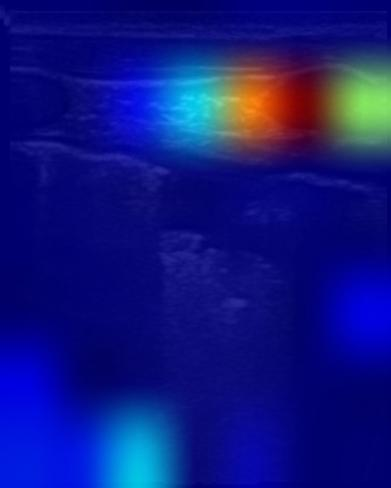

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff107.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([3.2527994e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([3.2527994e-05], shape=(1,), dtype=float32)


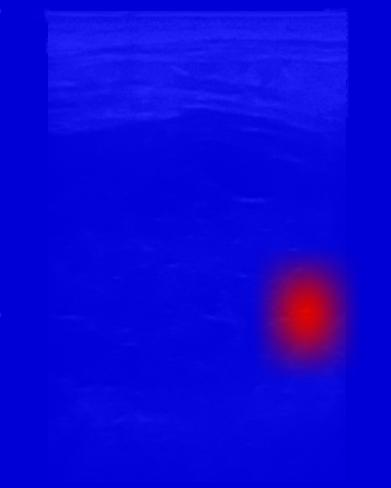

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff77.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([3.791549e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([3.791549e-05], shape=(1,), dtype=float32)


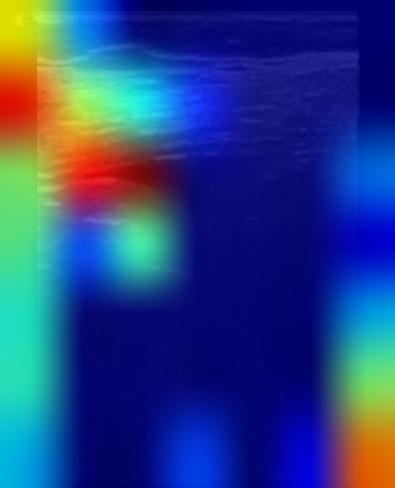

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff0.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.1297809e-09], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.1297809e-09], shape=(1,), dtype=float32)


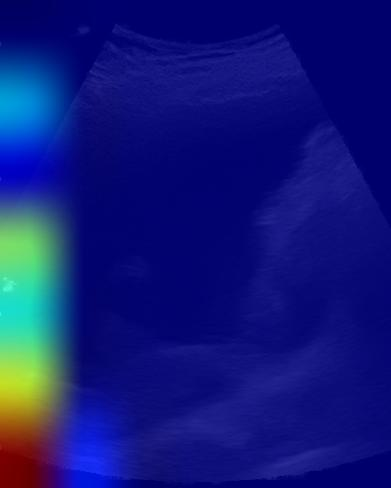

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif1.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([8.785402e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([8.785402e-06], shape=(1,), dtype=float32)


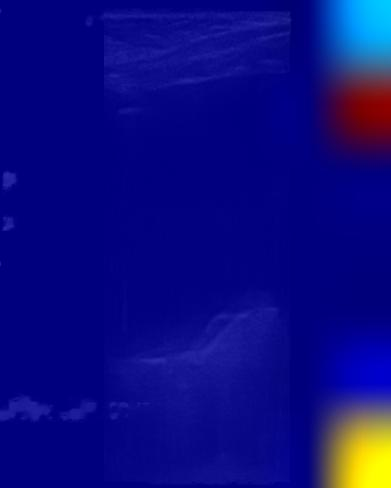

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif111.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.8434028e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.8434028e-05], shape=(1,), dtype=float32)


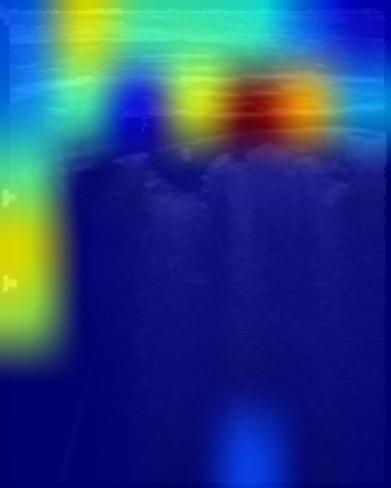

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff37.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([4.9775634e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([4.9775634e-05], shape=(1,), dtype=float32)


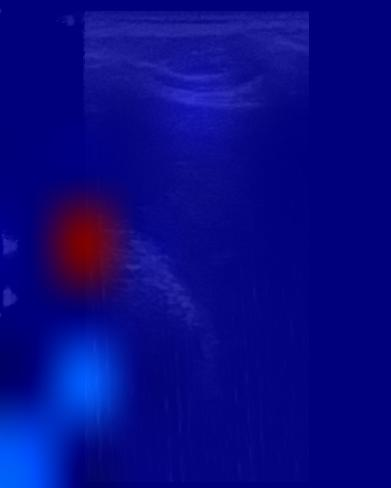

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif9.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.1210296e-09], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.1210296e-09], shape=(1,), dtype=float32)


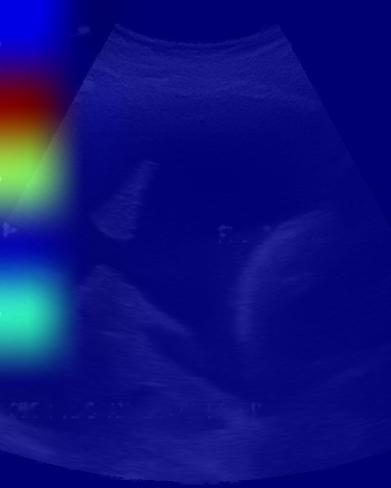

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif3.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.999892], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.999892], shape=(1,), dtype=float32)


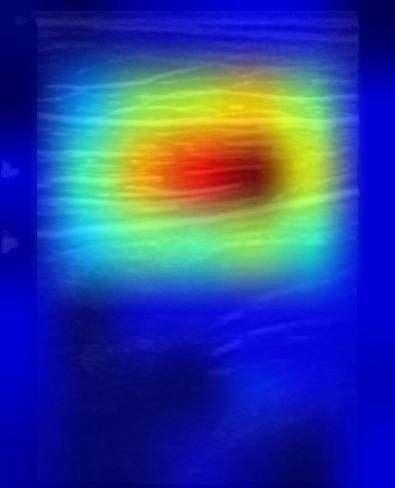

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif48.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00010389], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00010389], shape=(1,), dtype=float32)


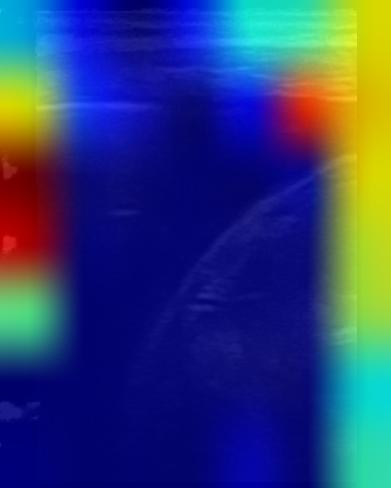

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif33.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.06062512], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.06062512], shape=(1,), dtype=float32)


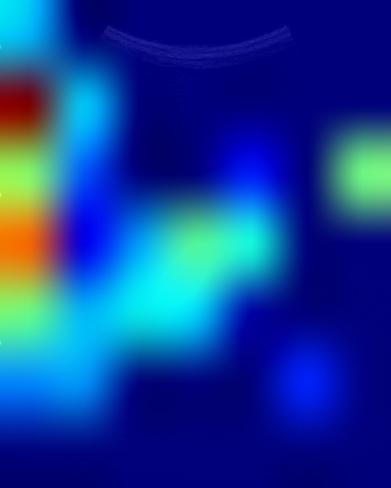

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif45.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.1612262e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.1612262e-06], shape=(1,), dtype=float32)


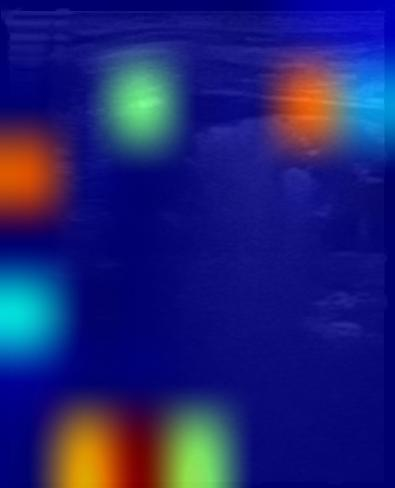

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff34.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([7.9415106e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([7.9415106e-05], shape=(1,), dtype=float32)


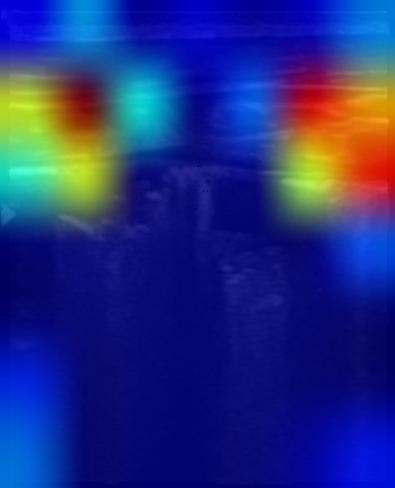

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff108.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00072352], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00072352], shape=(1,), dtype=float32)


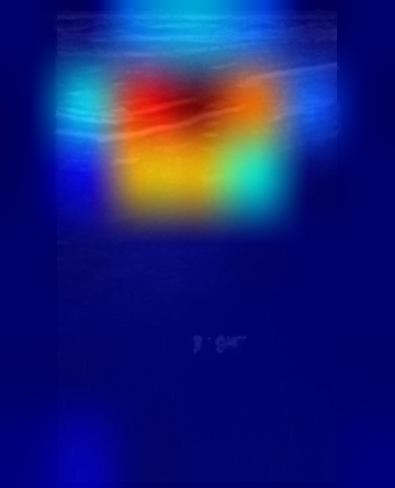

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff102.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.6883969e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.6883969e-05], shape=(1,), dtype=float32)


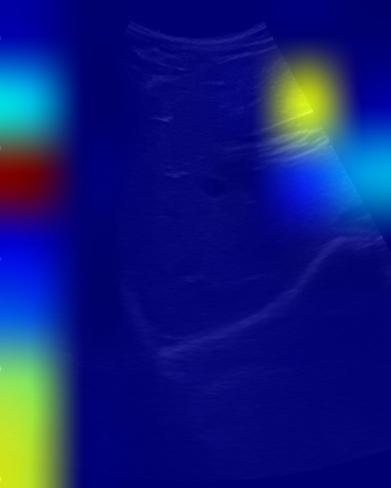

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff57.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00423335], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00423335], shape=(1,), dtype=float32)


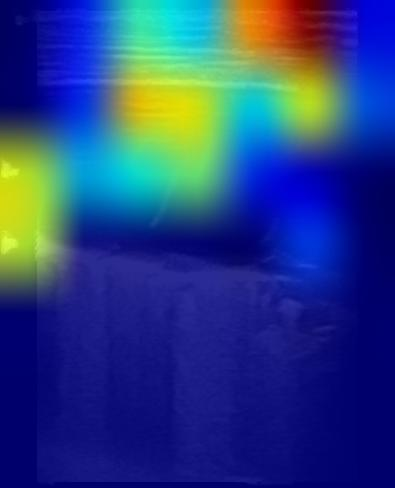

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif62.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([3.3627536e-09], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([3.3627536e-09], shape=(1,), dtype=float32)


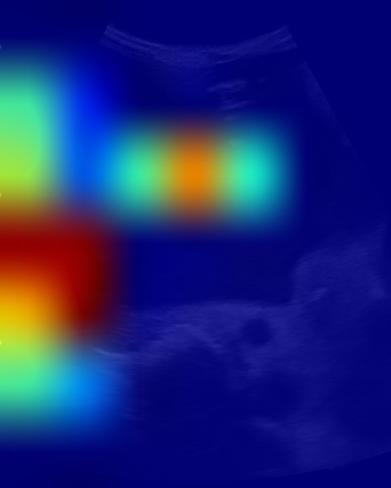

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif41.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.0003921], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.0003921], shape=(1,), dtype=float32)


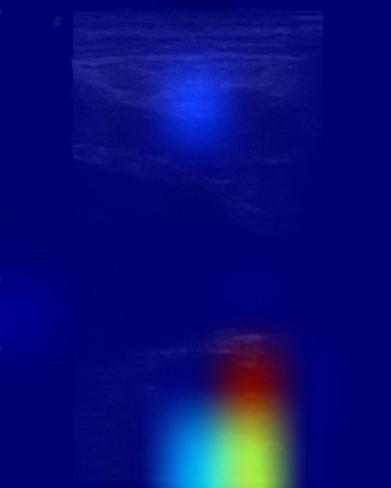

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif79.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9990882], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9990882], shape=(1,), dtype=float32)


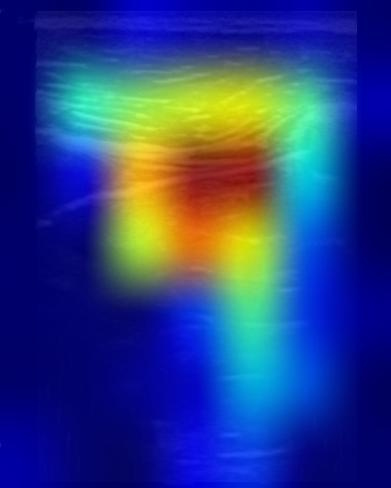

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif57.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.10298076], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.10298076], shape=(1,), dtype=float32)


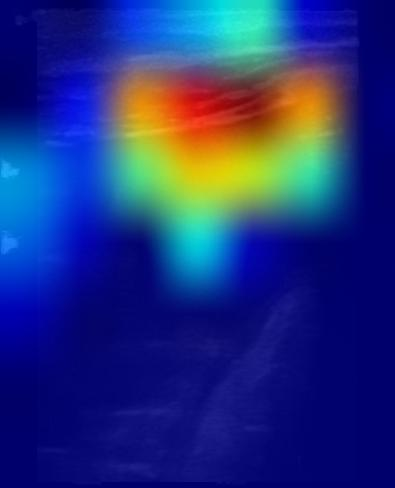

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif26.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.6206797e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.6206797e-05], shape=(1,), dtype=float32)


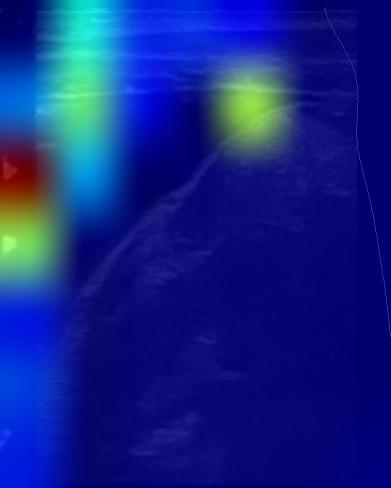

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff27.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.0052576e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.0052576e-05], shape=(1,), dtype=float32)


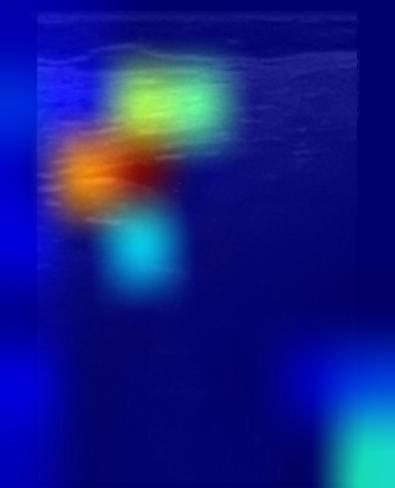

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff4.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.317889e-08], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.317889e-08], shape=(1,), dtype=float32)


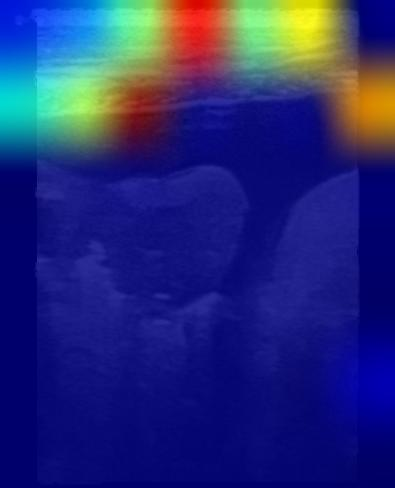

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff70.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.50247705], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.50247705], shape=(1,), dtype=float32)


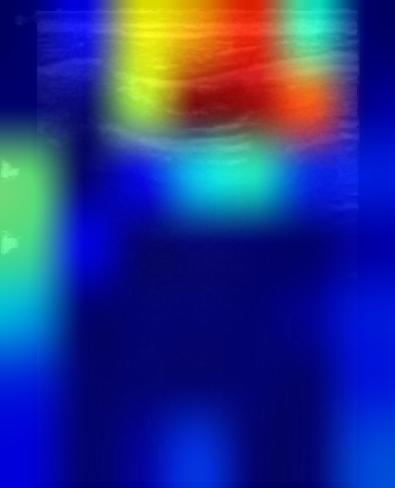

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff54.png
Prediction: Normal/ Not Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([3.2842604e-09], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([3.2842604e-09], shape=(1,), dtype=float32)


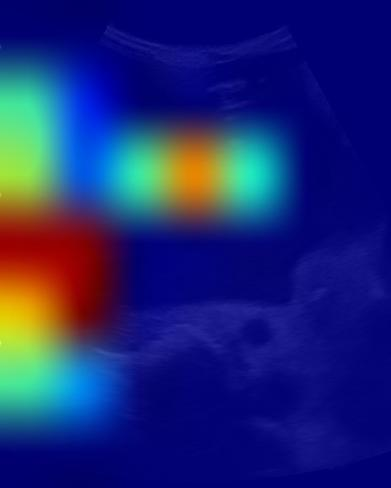

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif37.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00057776], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00057776], shape=(1,), dtype=float32)


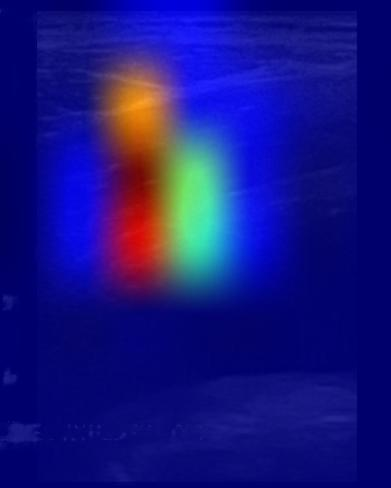

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif109.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([5.1333046e-07], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([5.1333046e-07], shape=(1,), dtype=float32)


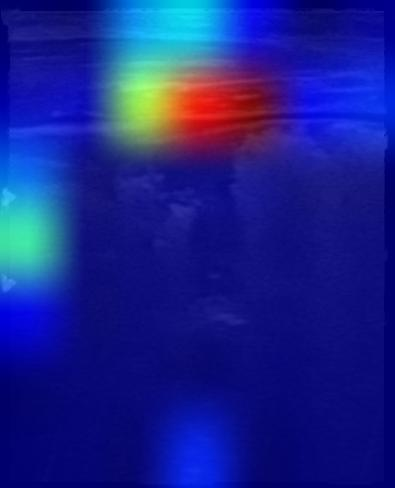

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff44.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([9.823279e-09], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([9.823279e-09], shape=(1,), dtype=float32)


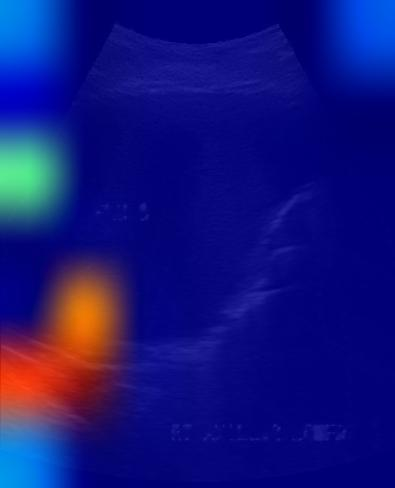

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif14.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00012076], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00012076], shape=(1,), dtype=float32)


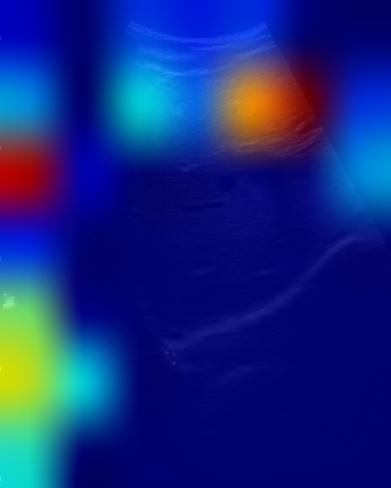

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff63.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00019816], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00019816], shape=(1,), dtype=float32)


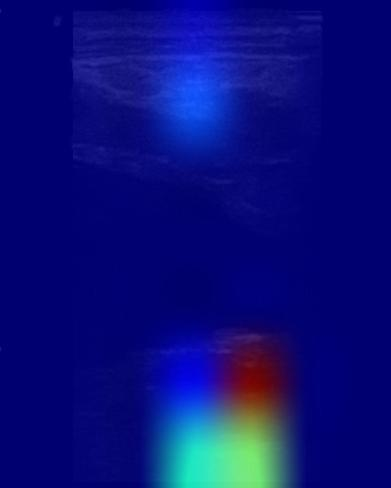

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif71.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.0835905e-08], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.0835905e-08], shape=(1,), dtype=float32)


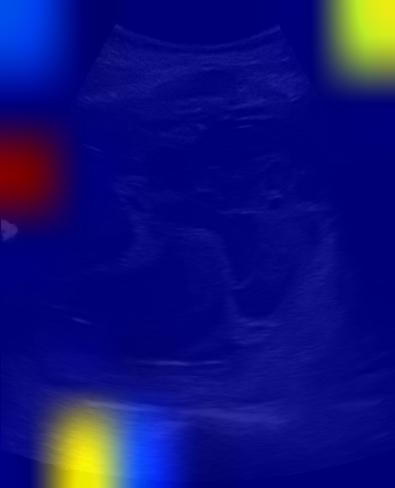

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif70.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([5.6363438e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([5.6363438e-06], shape=(1,), dtype=float32)


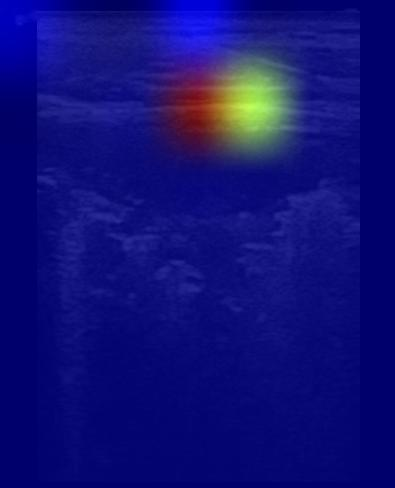

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff20.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([3.3627536e-09], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([3.3627536e-09], shape=(1,), dtype=float32)


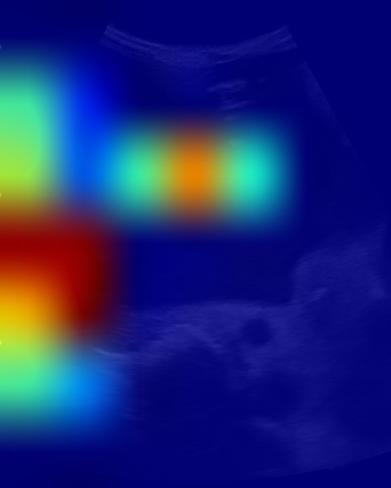

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif39.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.7836708e-09], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.7836708e-09], shape=(1,), dtype=float32)


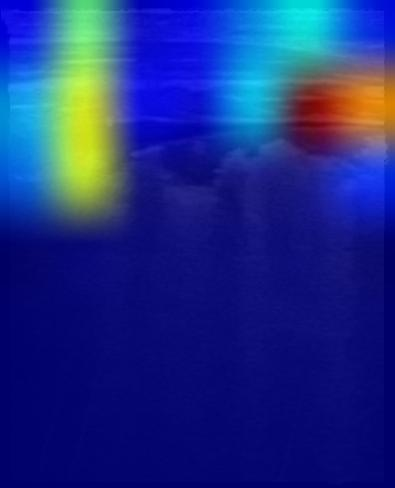

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff36.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.2582398e-07], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.2582398e-07], shape=(1,), dtype=float32)


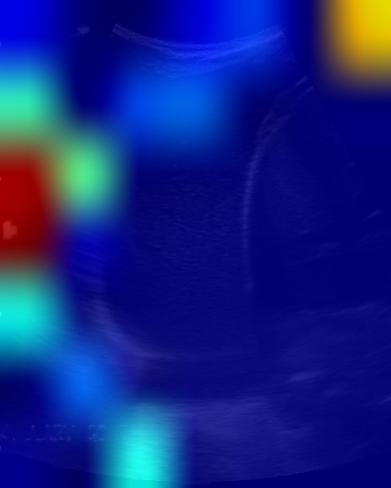

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif31.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.00073345], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.00073345], shape=(1,), dtype=float32)


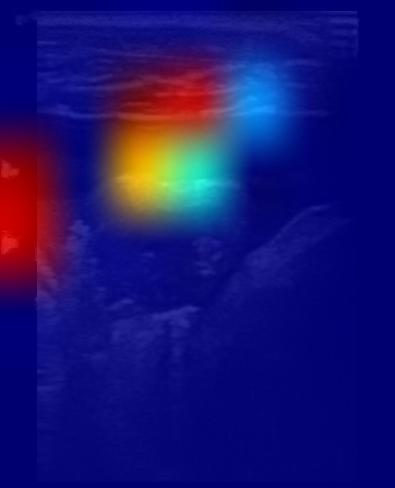

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff66.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([5.2865198e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([5.2865198e-05], shape=(1,), dtype=float32)


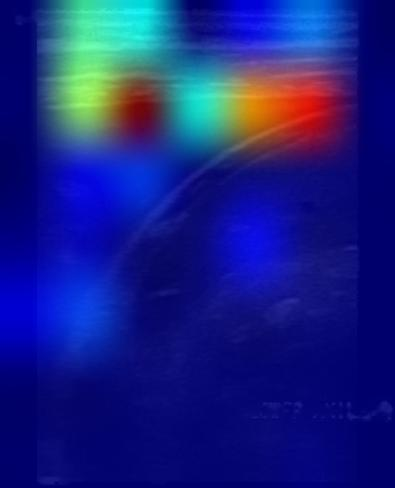

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif32.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.758375e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.758375e-06], shape=(1,), dtype=float32)


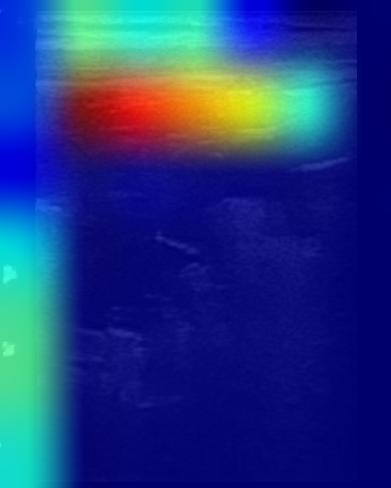

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff87.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.8444151e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.8444151e-06], shape=(1,), dtype=float32)


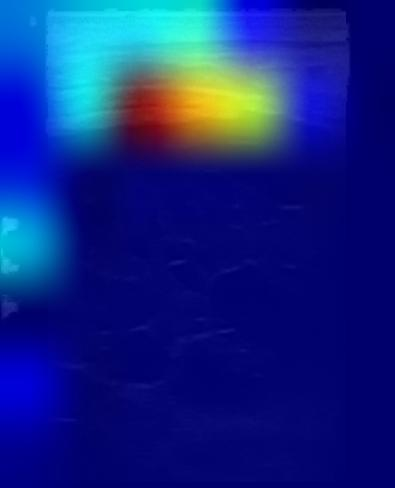

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff76.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([2.8011826e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([2.8011826e-05], shape=(1,), dtype=float32)


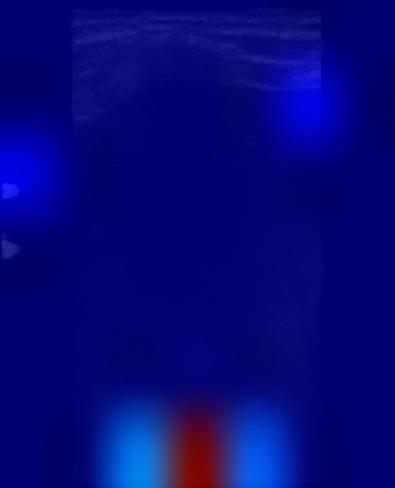

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eif20.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.9589653e-08], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.9589653e-08], shape=(1,), dtype=float32)


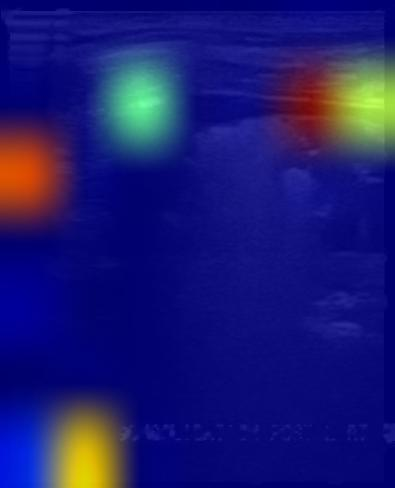

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff42.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([7.9415106e-05], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([7.9415106e-05], shape=(1,), dtype=float32)


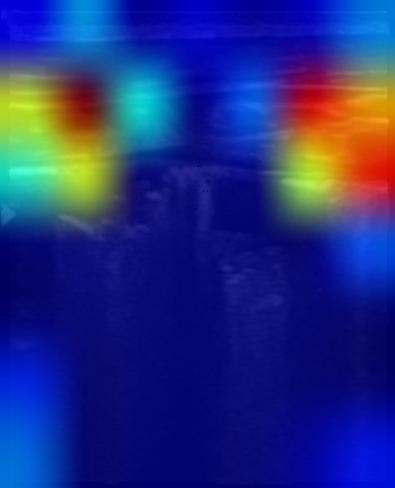

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff106.png
Prediction: Infected/ Sick
------------------
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([1.8488216e-06], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([1.8488216e-06], shape=(1,), dtype=float32)


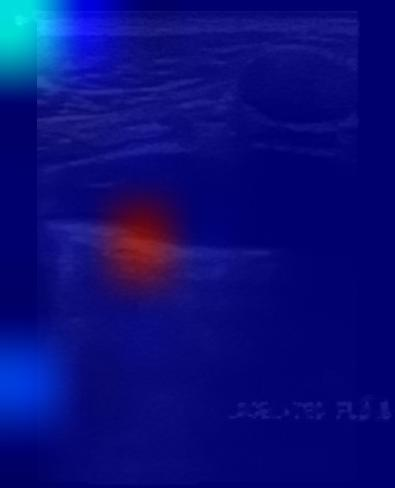

Image: /content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images/sick_eff8.png
Prediction: Infected/ Sick
------------------


In [ ]:
folder_path = "/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images"
image_size = (224, 224)

# Collect input images
input_images = []
predictions = []

for filename in os.listdir(folder_path):
    if filename.endswith(".png"):
        img_path = os.path.join(folder_path, filename)
        input = get_img_array(img_path, image_size)
        input_images.append((img_path, input))

        # Predictions on the current image
        pred = new_model.predict(input)
        prediction = pred > 0.5
        predictions.append(prediction)

        # Generate heatmaps and save them
for (img_path, input), prediction in zip(input_images, predictions):
    heatmap = make_gradcam_heatmap(input, new_model)
    save_and_display_gradcam(img_path, heatmap)

    # Determine if the image is true or false
    is_true = prediction[0][0]
    if is_true:
        label = "Normal/ Not Sick"
    else:
        label = "Infected/ Sick"

    print(f"Image: {img_path}")
    print(f"Prediction: {label}")
    print("------------------")

**LIME**

In [ ]:
import lime